In [1]:
#### import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/learning_filter/filtered_backgrounds/interm_normals_combiExprCohortLim2.0Across1.tsv/part-00000', sep = '\t', names=['k-mer', 'k-mer count'])


k-mer  k-mer count
0   TGRHDAFEI         7854
1   MNLSLYLGE         4402
2   CFSSLLAQD         1263
3   SDLPNPDTL         7870
4   VMKVENERY         7869
5   PRKLDFRSD         5638
6   VRRAVNDER         7721
7   QREGIYYIV          622
8   SLRLECSGA         5285
9   THRTDDNIQ         6194
10  AQAGVQWHD         3918
11  SYYKETLSV         7870
12  STPSPIPNT         7673
13  ETSSTHPLQ          657
14  LVTETLQQA         7681
15  QMFSGTFWA          757
16  SDILKMSLM         7858
17  AAQAGVQWH         3918
18  SLQPPPPRF         3918
19  GEVEEMDTL         7816
20  LTSPVTSIS         7850
21  LVSNSLSQG         6254
22  KWGLNMEYC         7853
23  ETSPTIIYQ         7682
24  TQILAQFPK         7632
25  LAQFPKQHQ         7632
26  HVIASRRQD         7612
27  SLLAQDLLK         1263
28  SFQHIDSVY          116
29  CSINIYKRM           75
30  AHRSGWSAV         5285
31  KETRKNSSC         5638
32  HPCQHLLLP         1491
33  LGSGDPPAS         5285
34  KTLGLLPNL           56
35  GLHGRCIFN          231
36  SSCLRKKTL           56
37  TVAQEVVFC            7
38  AGTIQTVPT            2
39  AGYSSVCYS         1686
40  DPARRADLE            1
41  KTQVLIKPK         7600
42  LKETEPHYV          370
43  VFIDAEDLA            1
44  TVYVKILSL           97
45  KTITVPVII            8
46  TVAQVKEKL            2
47  CWNSQPVVH            3

In [24]:
df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/learning_filter/filtered_backgrounds/interm_normals_combiExprCohortLim2.0Across1.tsv/part-00000', sep = '\t', names=['k-mer', 'k-mer count'])
df.index = np.arange(1,len(df)+1) #k-mer count - recurrence of each 9-mer
df

k-mer  k-mer count
1   TGRHDAFEI         7854
2   MNLSLYLGE         4402
3   CFSSLLAQD         1263
4   SDLPNPDTL         7870
5   VMKVENERY         7869
6   PRKLDFRSD         5638
7   VRRAVNDER         7721
8   QREGIYYIV          622
9   SLRLECSGA         5285
10  THRTDDNIQ         6194
11  AQAGVQWHD         3918
12  SYYKETLSV         7870
13  STPSPIPNT         7673
14  ETSSTHPLQ          657
15  LVTETLQQA         7681
16  QMFSGTFWA          757
17  SDILKMSLM         7858
18  AAQAGVQWH         3918
19  SLQPPPPRF         3918
20  GEVEEMDTL         7816
21  LTSPVTSIS         7850
22  LVSNSLSQG         6254
23  KWGLNMEYC         7853
24  ETSPTIIYQ         7682
25  TQILAQFPK         7632
26  LAQFPKQHQ         7632
27  HVIASRRQD         7612
28  SLLAQDLLK         1263
29  SFQHIDSVY          116
30  CSINIYKRM           75
31  AHRSGWSAV         5285
32  KETRKNSSC         5638
33  HPCQHLLLP         1491
34  LGSGDPPAS         5285
35  KTLGLLPNL           56
36  GLHGRCIFN          231
37  SSCLRKKTL           56
38  TVAQEVVFC            7
39  AGTIQTVPT            2
40  AGYSSVCYS         1686
41  DPARRADLE            1
42  KTQVLIKPK         7600
43  LKETEPHYV          370
44  VFIDAEDLA            1
45  TVYVKILSL           97
46  KTITVPVII            8
47  TVAQVKEKL            2
48  CWNSQPVVH            3

In [12]:
df.shape

(48, 2)

In [13]:
print(df.max())

k-mer          VRRAVNDER
k-mer count         7870
dtype: object


In [14]:
print(df.min())

k-mer          AAQAGVQWH
k-mer count            1
dtype: object


In [8]:
print(df.median())

k-mer count    4160.0
dtype: float64


/tmp/ipykernel_3671692/4259369830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


In [5]:
df["k-mer count"] #k-mer count - recurrence of each 9-mer in sample

1     7854
2     4402
3     1263
4     7870
5     7869
6     5638
7     7721
8      622
9     5285
10    6194
11    3918
12    7870
13    7673
14     657
15    7681
16     757
17    7858
18    3918
19    3918
20    7816
21    7850
22    6254
23    7853
24    7682
25    7632
26    7632
27    7612
28    1263
29     116
30      75
31    5285
32    5638
33    1491
34    5285
35      56
36     231
37      56
38       7
39       2
40    1686
41       1
42    7600
43     370
44       1
45      97
46       8
47       2
48       3
Name: k-mer count, dtype: int64

# Matplotlib Histograms

In [ ]:
#A histogram is a graph showing frequency distributions.

#It is a graph showing the number of observations within each given interval.

''' 
* density: bool, default: False

If True, draw and return a probability density: each bin will display the bin's raw count divided by the total 
number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the 
histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
If stacked is also True, the sum of the histograms is normalized to 1.

If False, the result will contain the number of samples in each bin. 

If True, the result is the value of the 
probability density function at the bin, normalized such that the integral over the range is 1. 
Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen; it is not 
a probability mass function.


* histtype {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'

The type of histogram to draw.
'bar' is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side.
'barstacked' is a bar-type histogram where multiple data are stacked on top of each other.
'step' generates a lineplot that is by default unfilled.
'stepfilled' generates a lineplot that is by default filled.


* alpha:

hist(x, alpha=n) with x as a data set and n as an integer between 0 and 1 specifying the transparency 
of each histogram.

* bins:

The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data 
fall into that range. Width of each bin is = (max value of data – min value of data) / total number of bins.
The default value of the number of bins to be created in a histogram is 10. However, we can change the size of bins using the parameter bins in matplotlib.pyplot.hist(). 

We can pass an integer in bins stating how many bins/towers to be created in the histogram and the width of each 
bin is then changed accordingly.

'''

# Histogram for interm-normals samples combiExprCohortLim2.0Across1(part -00000:


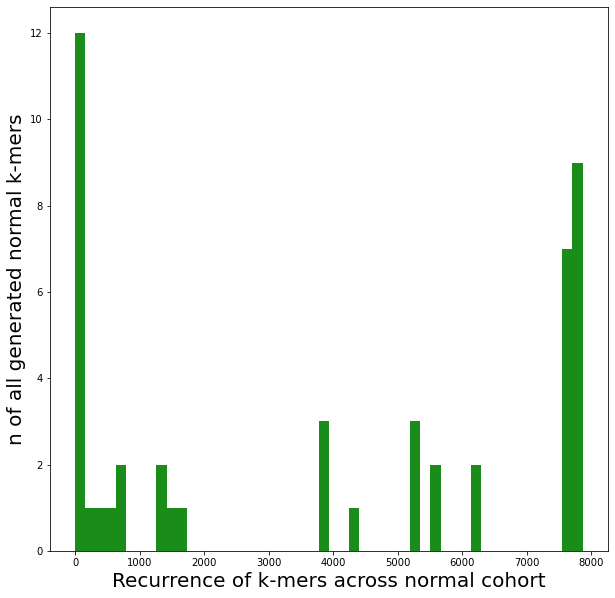

In [27]:
#plt.hist(df[])
plt.figure(figsize=(10,10))
plt.hist(df["k-mer count"], density=False, histtype='barstacked', facecolor='g', alpha=0.9, bins =50)
plt.xlabel("Recurrence of k-mers across normal cohort")
plt.ylabel("n of all generated normal k-mers")

#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.show()

In [28]:
df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/learning_filter/TCGA_Breast/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/DATA_TEST_22.06.2022_Task5_Run#13_a_interm_cancer/interm_cancer_ref_combiExprCohortLim0.0Across1ExceptTCGABHA18V01A11RA12D07all.tsv/part-00000', sep = '\t', names=['k-mer', 'k-mer count'])
df.index = np.arange(1,len(df)+1)
df

k-mer  k-mer count
1    AGYSSVCYS          446
2    KTQVLIKPK         1064
3    TVYVKILSL           22
4    SQSSQEHLE           41
5    SSQSSQDSQ         1064
..         ...          ...
986  KVISGVLKE          213
987  CLRKKTLGL           28
988  FVLFRIPGT            1
989  QGQEGAGLH           79
990  LRKKTLGLL           28

[990 rows x 2 columns]

In [29]:
df.shape

(990, 2)

In [10]:
print(df.min())

k-mer          AAQAGVQWH
k-mer count            1
dtype: object


# Histogram for interm-cancer samples ref_combiExprCohortLim0.0Across1ExceptTCGABHA18V01A11RA12D07all.tsv(part-00000):


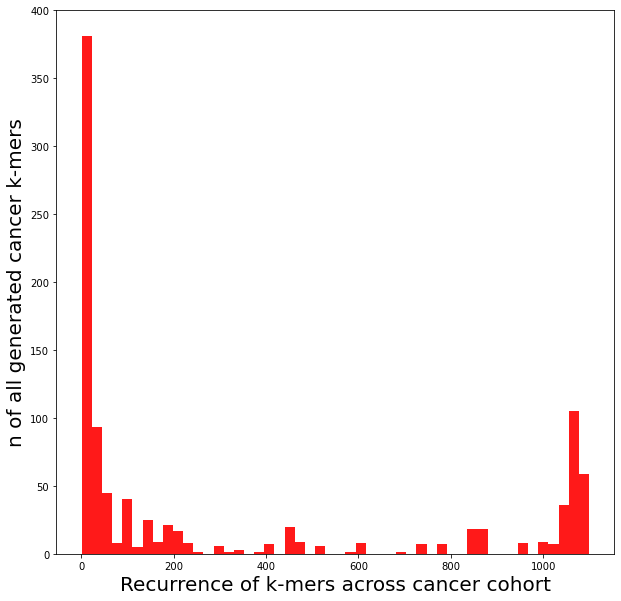

In [30]:
plt.figure(figsize=(10,10))
plt.hist(df["k-mer count"], density=False, histtype='stepfilled', facecolor='r', alpha=0.9, bins=50) #density
#Check basics of probabilities and statistics  distribution density probability of an event
#True- probability distribution
plt.xlabel("Recurrence of k-mers across cancer cohort") 
plt.ylabel("n of all generated cancer k-mers")
#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.show()

# Understanding Boxplots
https://builtin.com/data-science/boxplot


In [ ]:
'''
Boxplots are graphs that tell you how your data’s values are spread out.
boxplot is a standardized way of displaying the distribution of data based on a five number summary 
(“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). Here’s an example.
Boxplots can tell you about your outliers and what their values are. It can also tell you if your data is 
symmetrical, how tightly your data is grouped and if and how your data is skewed.

For some distributions/data sets, you will find that you need more information than the measures of central 
tendency (median, mean and mode). You need to have information on the variability or dispersion of the data. 
A boxplot is a graph that gives you a good indication of how the values in the data are spread out. 
Although boxplots may seem primitive in comparison to a histogram or density plot, they have the advantage of 
taking up less space, which is useful when comparing distributions between many groups or data sets.

Median (Q2/50th percentile): The middle value of the data set

First Quartile (Q1/25th percentile): The middle number between the smallest number (not the “minimum”) and the median of the data set

Third Quartile (Q3/75th percentile): The middle value between the median and the highest value (not the “maximum”) of the dataset

Interquartile Range (IQR): 25th to the 75th percentile

Whiskers (shown in blue)

Outliers (shown as green circles)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

'''

https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots_0.jpg

# Box plot for interm-normals samples combiExprCohortLim2.0Across1(part -00000: (minimum 2 reads across 1 or more samples, 7854 samples that have expression more than 2 reads)

In [41]:
df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/learning_filter/filtered_backgrounds/interm_normals_combiExprCohortLim2.0Across1.tsv/part-00000', sep = '\t', names=['All generated normal k-mers', 'Recurrence of k-mers across normal cohort'])
df.index = np.arange(1,len(df)+1)
df.head()

All generated normal k-mers  Recurrence of k-mers across normal cohort
1                   TGRHDAFEI                                       7854
2                   MNLSLYLGE                                       4402
3                   CFSSLLAQD                                       1263
4                   SDLPNPDTL                                       7870
5                   VMKVENERY                                       7869

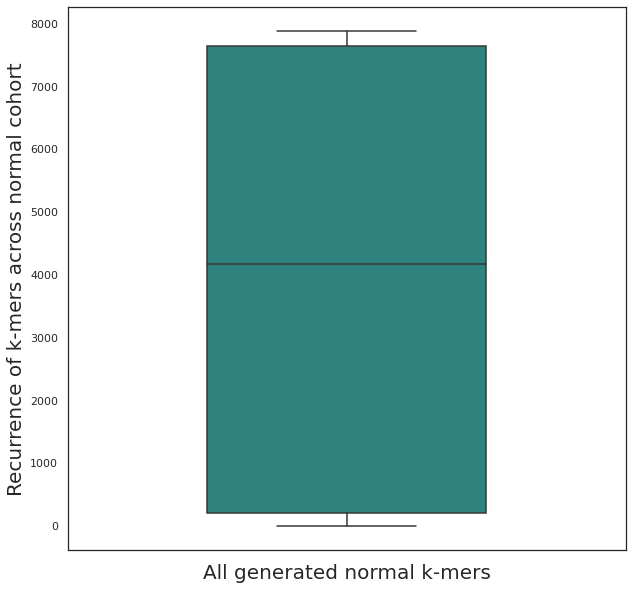

In [42]:
#Box plots:
'''Boxplots can be used to:

    Identify outliers or anomalous data points
    To determine if our data is skewed
    To understand the spread/range of the data'''

#Plotting using seaborn library:
plt.figure(figsize=(10,10))
sns.boxplot(data = df, y = 'Recurrence of k-mers across normal cohort', palette = 'viridis', width=0.5) 
plt.ylabel('Recurrence of k-mers across normal cohort')# Recurrence across filtered_backgrounds /(normal cohorts/samples) of k-mers
plt.xlabel('All generated normal k-mers')
#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.show()

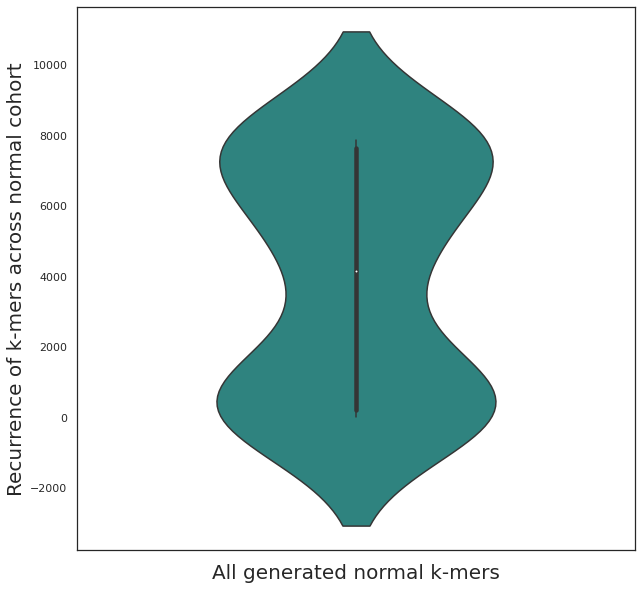

In [43]:
#Violin plots:
''' A violin plot is a hybrid of a box plot and a kernel density plot, 
which shows peaks in the data. It is used to visualize the distribution of numerical data. 
Unlike a box plot that can only show summary statistics, 
violin plots depict summary statistics and the density of each variable.'''

#Plotting violinplot using seaborn library:
plt.figure(figsize=(10,10))
sns.violinplot(data = df, y = 'Recurrence of k-mers across normal cohort', palette = 'viridis', width=0.5) 
plt.ylabel('Recurrence of k-mers across normal cohort') 
plt.xlabel('All generated normal k-mers') # My plot big around 8000 and 0 I have a very high number of k-mers of reccurence of 8000 and 0
#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.show()

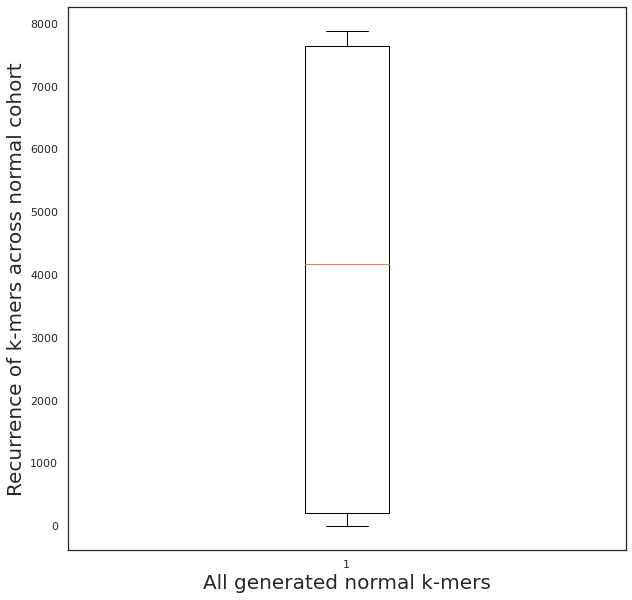

In [44]:
#Plotting using matplotlib library:
#Using matplotlib to make a boxplot
plt.figure(figsize=(10,10))
plt.boxplot(x=df['Recurrence of k-mers across normal cohort'], vert=True); #vert=False - for horizontal plot.
plt.ylabel('Recurrence of k-mers across normal cohort')
plt.xlabel('All generated normal k-mers')
#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

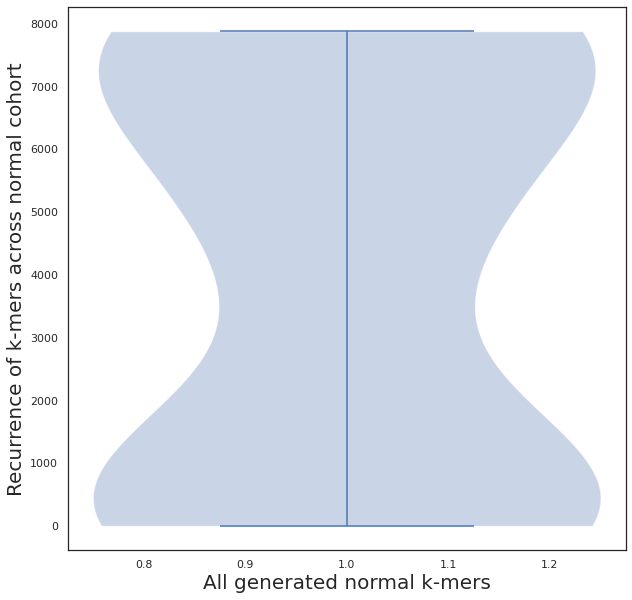

In [45]:
#Plotting violinplot matplotlib library:
#violinplot(dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, quantiles=None, points=100,
#bw_method=None, *, data=None)
plt.figure(figsize=(10,10))
plt.violinplot(df['Recurrence of k-mers across normal cohort'], vert=True, widths=0.5);
plt.ylabel('Recurrence of k-mers across normal cohort')
plt.xlabel('All generated normal k-mers')
#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

In [15]:
df

All generated normal k-mers  Recurrence of k-mers across normal cohort
1                    TGRHDAFEI                                       7854
2                    MNLSLYLGE                                       4402
3                    CFSSLLAQD                                       1263
4                    SDLPNPDTL                                       7870
5                    VMKVENERY                                       7869
6                    PRKLDFRSD                                       5638
7                    VRRAVNDER                                       7721
8                    QREGIYYIV                                        622
9                    SLRLECSGA                                       5285
10                   THRTDDNIQ                                       6194
11                   AQAGVQWHD                                       3918
12                   SYYKETLSV                                       7870
13                   STPSPIPNT                                       7673
14                   ETSSTHPLQ                                        657
15                   LVTETLQQA                                       7681
16                   QMFSGTFWA                                        757
17                   SDILKMSLM                                       7858
18                   AAQAGVQWH                                       3918
19                   SLQPPPPRF                                       3918
20                   GEVEEMDTL                                       7816
21                   LTSPVTSIS                                       7850
22                   LVSNSLSQG                                       6254
23                   KWGLNMEYC                                       7853
24                   ETSPTIIYQ                                       7682
25                   TQILAQFPK                                       7632
26                   LAQFPKQHQ                                       7632
27                   HVIASRRQD                                       7612
28                   SLLAQDLLK                                       1263
29                   SFQHIDSVY                                        116
30                   CSINIYKRM                                         75
31                   AHRSGWSAV                                       5285
32                   KETRKNSSC                                       5638
33                   HPCQHLLLP                                       1491
34                   LGSGDPPAS                                       5285
35                   KTLGLLPNL                                         56
36                   GLHGRCIFN                                        231
37                   SSCLRKKTL                                         56
38                   TVAQEVVFC                                          7
39                   AGTIQTVPT                                          2
40                   AGYSSVCYS                                       1686
41                   DPARRADLE                                          1
42                   KTQVLIKPK                                       7600
43                   LKETEPHYV                                        370
44                   VFIDAEDLA                                          1
45                   TVYVKILSL                                         97
46                   KTITVPVII                                          8
47                   TVAQVKEKL                                          2
48                   CWNSQPVVH                                          3

# Box plot for interm-cancer samples ref_combiExprCohortLim0.0Across1ExceptTCGABHA18V01A11RA12D07all.tsv(part-00000):

In [15]:
df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/learning_filter/TCGA_Breast/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/DATA_TEST_22.06.2022_Task5_Run#13_a_interm_cancer/interm_cancer_ref_combiExprCohortLim0.0Across1ExceptTCGABHA18V01A11RA12D07all.tsv/part-00000', sep = '\t', names=['All generated cancer k-mers', 'Recurrence of k-mers across cancer cohort'])
df.head()

All generated cancer k-mers  Recurrence of k-mers across cancer cohort
0                   AGYSSVCYS                                        446
1                   KTQVLIKPK                                       1064
2                   TVYVKILSL                                         22
3                   SQSSQEHLE                                         41
4                   SSQSSQDSQ                                       1064

In [16]:
print(df.min())

All generated cancer k-mers                  AAGGAANYN
Recurrence of k-mers across cancer cohort            1
dtype: object


In [17]:
print(df.max())

All generated cancer k-mers                  YVKSVSCSD
Recurrence of k-mers across cancer cohort         1099
dtype: object


In [18]:
print(df.median())

Recurrence of k-mers across cancer cohort    51.0
dtype: float64


/tmp/ipykernel_3671692/4259369830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


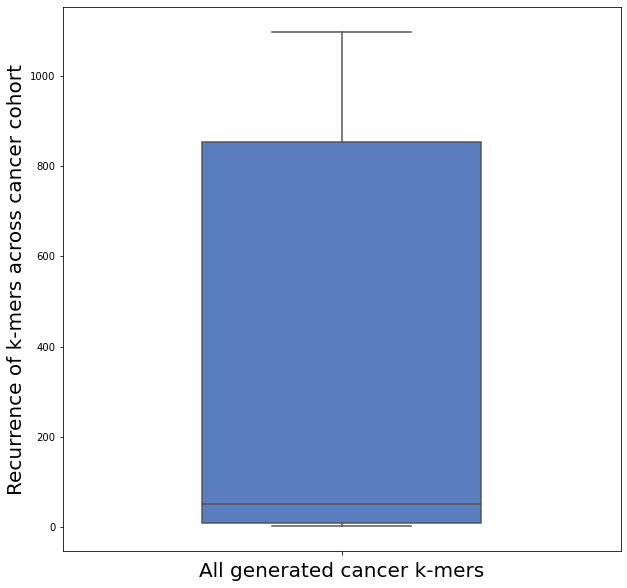

In [7]:
#Plotting box plot using seaborn library:
plt.figure(figsize=(10,10))
sns.boxplot(data = df, y = 'Recurrence of k-mers across cancer cohort', palette = 'muted', width=0.5) 
plt.ylabel('Recurrence of k-mers across cancer cohort') #Recurrence across filtered_foregrounds /(normal samples) of k-mers
plt.xlabel('All generated cancer k-mers')
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.show()


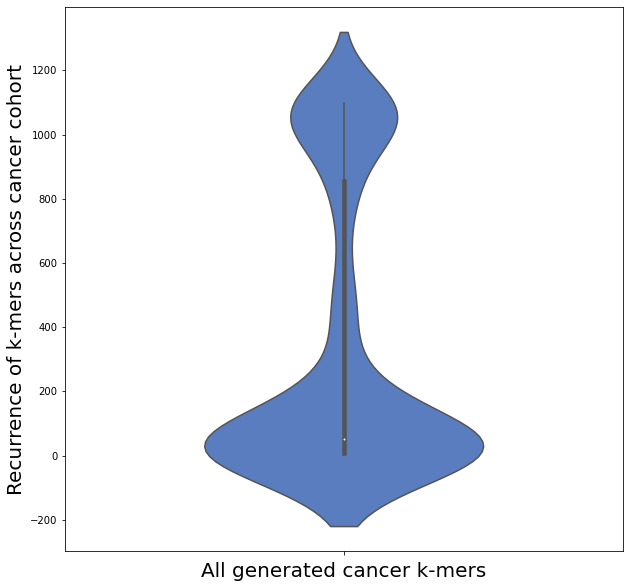

In [8]:
#Plotting violin plot using seaborn library:
plt.figure(figsize=(10,10))
sns.violinplot(data = df, y = 'Recurrence of k-mers across cancer cohort', palette = 'muted', width=0.5) 
plt.ylabel('Recurrence of k-mers across cancer cohort')
plt.xlabel('All generated cancer k-mers')
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.show()

Text(0.5, 0, 'All generated cancer k-mers')

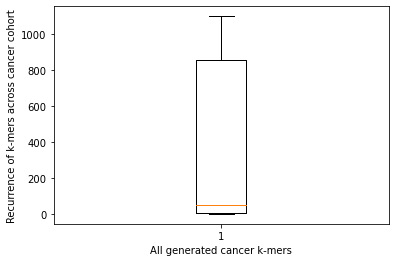

In [19]:
#Plotting box plot using matplotlib library:
plt.boxplot(x=df['Recurrence of k-mers across cancer cohort'], vert=True);
plt.ylabel('Recurrence of k-mers across cancer cohort')
plt.xlabel('All generated cancer k-mers')

Text(0.5, 0, 'All generated cancer k-mers')

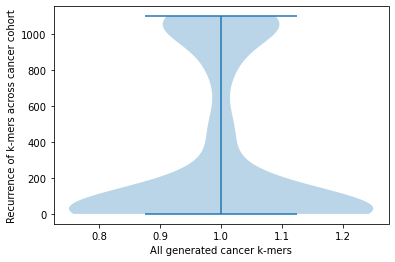

In [20]:
#Plotting violin plot using matplotlib library:
plt.violinplot(df['Recurrence of k-mers across cancer cohort'], vert=True);
plt.ylabel('Recurrence of k-mers across cancer cohort')
plt.xlabel('All generated cancer k-mers')

# Concatenation in Pandas

In [ ]:
'''
Use pandas.concat() to concatenate/merge two or multiple pandas DataFrames across rows or columns. 
When you concat() two pandas DataFrames on rows, it creates a new Dataframe containing all rows of two DataFrames 
basically it does append one DataFrame with another. When you use concat() on columns it performs the join 
operation.

pandas concat() Key Points

By default concat() method performs append operation meaning, it appends each DataFrame at the end of the another 
DataFrame and creates a single DataFrame
When you use concat() to join two DataFrames, it supports only inner and outer joins and by default it performs 
outer join.
Using concat you can join or append multiple pandas DataFrames

'''

https://miro.medium.com/max/1400/1*0wu6DunCzPC4o9FIyRTW4w.png

# Merging in Pandas

In [ ]:
'''
“Merging” two datasets is the process of bringing two datasets together into one, and aligning the rows from each 
based on common attributes or columns. The words “merge” and “join” are used relatively interchangeably in Pandas 
and other languages.
'''

https://miro.medium.com/max/1400/1*-uSHoxrzM57syqnKnms2iA.png

# Difference between Concatenation and Merging in Pandas

In [ ]:
'''
Concat function concatenates dataframes along rows or columns. We can think of it as stacking up multiple 
dataframes. Merge combines dataframes based on values in shared columns. Merge function offers more flexibility 
compared to concat function because it allows combinations based on a condition.

'''


In [2]:
import glob
import pandas as pd
#merged reccurence and expression in the output 
#Scatter plots
#panda merge will be used

#Expression data:(for normals and for cancer samples)
    #/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102
    #/filter_TCGA-A2-A0D2-01A-21R-A034-07.all/commit_d4aee54_GTEXcore
    #/G_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_SampleLim0.0CohortLim0.0Across10_FiltNormalsGtexcoreCohortlim3.0Across10_FiltUniprot.tsv
    #/part-00000-ff44ef83-8d6d-4992-8585-46eac2dae2dd-c000.csv
    
#Reccurence data(for normals):/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/filtered_backgrounds/commit_d4aee54_GTEXcore/interm_normals_combiExprCohortLim0.0Across1.tsv    
#combiExprCohortLim0.0Across1-
#- this means that the expression limit required in the intermediate file is >0. This is the most “general” file. Others can request an expression of 3 or 10
#And at best try loading all the “parts.csv” in a single table as in:
#Check difference between merge and concatenate in pandas. Here what we want to do is concatenate. 
#Because the part dataframe are the same columns, different kmers, which need to be put “on top of each other
#You can do a concatenation “on the fly” with the code I gave you:

#Code:

'''
Code 1 
all_files  = [ ]
for file in ..
df = read_csv(..)
all_files.append(df)



Code 2
path = f"{home}/Documents/code/coiled/coiled-datasets/data/fish/"
all_files = glob.glob(path + "/**/*.csv")
all_files_df = []
for f in all_files:
    all_files_df.append(pd.read_csv(f))
df = pd.concat(all_files_df)

#Fills all_files_df = [] with panda dataframes so that you have a list of panda dataframes ->  
that are later concatenated.

#home in this case is a variable
like
home=‘any_path_thatyou_want’
and f”{home}/additional_stuff”
gives
‘any_path_thatyou_want/additional_stuff’





You need to replace it accordingly yes

Please read about glob.glob function

glob.glob works with * in paths (wildcards)


Code 3(more advanced)
path = f"{home}/Documents/code/coiled/coiled-datasets/data/fish/"
all_files = glob.glob(path + "/**/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))

#The (pd.read_csv(f) for f in all_files) , 
is called a list comprehension  this is the same as having the for loop, but “horizontal”
'''


#Concat reccurence data for normals:

all_files = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/filtered_backgrounds/commit_d4aee54_GTEXcore/interm_normals_combiExprCohortLim0.0Across1.tsv/part*')
all_files_df = []
for f in all_files:
    all_files_df.append(pd.read_csv(f,names=['All generated normal k-mers', 'Recurrence of k-mers across normal cohort'],delimiter='\t'))
df_A = pd.concat(all_files_df, axis = 0 ) #It tells which direction to take for concatenating                      

In [3]:
df_A

All generated normal k-mers  Recurrence of k-mers across normal cohort
0                        AAAAAAAEV                                       7833
1                        AAAAAAALV                                       7188
2                        AAAAAAAQG                                       7871
3                        AAAAAATVM                                       7835
4                        AAAAAEEPL                                       3439
...                            ...                                        ...
374070                   YYYIHHGID                                       3403
374071                   YYYKLKNNT                                       7664
374072                   YYYMGVDAV                                       5269
374073                   YYYRPARQV                                        128
374074                   YYYYLFHWY                                         41

[37467858 rows x 2 columns]

In [7]:
fname = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-A2-A0D2-01A-21R-A034-07.all/commit_d4aee54_GTEXcore/G_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_SampleLim0.0CohortLim0.0Across10_FiltNormalsGtexcoreCohortlim3.0Across10_FiltUniprot.tsv/part-00000-ff44ef83-8d6d-4992-8585-46eac2dae2dd-c000.csv'
df_B = pd.read_csv(fname,sep='\t',names=['All generated normal k-mers', 'Expression', 'kmer_IL_eq'])
df_B = df_B.loc[1:].reset_index().drop('index', axis = 1)
df_B

All generated normal k-mers Expression kmer_IL_eq
0                       AAGDDENHN      531.0  AAGDDENHN
1                       AAMGIKSCA     3324.0  AAMGLKSCA
2                       AAPGQHLQA       38.0  AAPGQHLQA
3                       AGNIWILSV       25.0  AGNLWLLSV
4                       AGPDWIIAI       29.0  AGPDWLLAL
...                           ...        ...        ...
22142                   WTYVATQVM      867.0  WTYVATQVM
22143                   YELKMILYP        6.0  YELKMLLYP
22144                   YFVHPCQQK        1.0  YFVHPCQQK
22145                   YKDPSNLDV      122.0  YKDPSNLDV
22146                   YQVITGGPP      367.0  YQVLTGGPP

[22147 rows x 3 columns]

In [8]:
df_B.dtypes

All generated normal k-mers    object
Expression                     object
kmer_IL_eq                     object
dtype: object

In [9]:
df_B['Expression'] = df_B['Expression'].astype(float)

In [10]:
df = pd.merge(df_A, df_B,  how='inner', on=['All generated normal k-mers'])


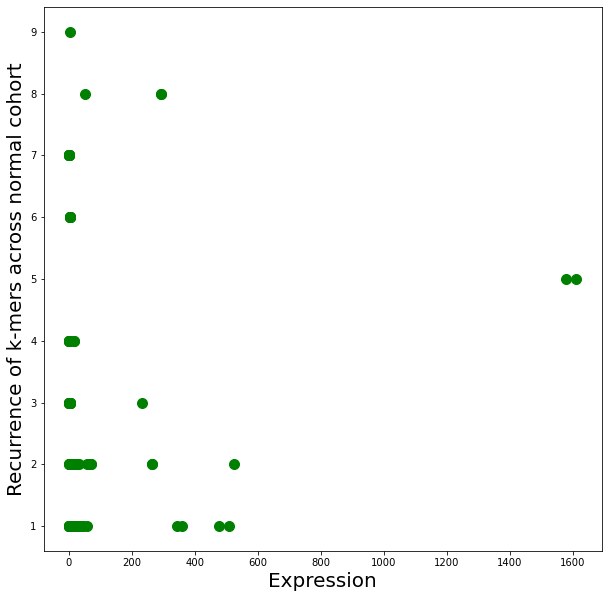

In [11]:
#Building scatter plot for normals:

import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
#df = df.loc[df['Expression'] <= number, :]
plt.rcParams["figure.figsize"] = (10, 10)
#pandas method. tru  to use all matplotlib for plots:
df.plot.scatter(x='Expression',y='Recurrence of k-mers across normal cohort', s = 100, c = 'green')
#fontsize for writing axis legends bigger
#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

In [9]:
#Concat reccurence data for cancer samples:
all_files = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-A2-A0D2-01A-21R-A034-07.all/commit_d4aee54_a_interm_cancer/interm_cancer_ref_combiExprCohortLim0.0Across1ExceptTCGAA2A0D201A21RA03407all.tsv/part*')
all_files_df = []
for f in all_files:
    all_files_df.append(pd.read_csv(f,names=['All generated cancer k-mers', 'Recurrence of k-mers across cancer cohort'],delimiter='\t'))
df_A = pd.concat(all_files_df, axis = 0 ) 

In [10]:
df_A

All generated cancer k-mers  Recurrence of k-mers across cancer cohort
0                       TCPSSQEPA                                          1
1                       ATSLAAVVT                                          8
2                       ALAGGCECD                                         18
3                       AGGCECDNA                                         18
4                       PDDFKGYGE                                         17
...                           ...                                        ...
51694                   EVKDEKDDM                                       1101
51695                   RVRHIEHNE                                          1
51696                   PAVREKARS                                        104
51697                   ETHFRVAVS                                         65
51698                   VPGHGGIIN                                         32

[5161362 rows x 2 columns]

In [11]:
fname = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-A2-A0D2-01A-21R-A034-07.all/commit_d4aee54_GTEXcore/G_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_SampleLim0.0CohortLim0.0Across10_FiltNormalsGtexcoreCohortlim3.0Across10_FiltUniprot.tsv/part-00000-ff44ef83-8d6d-4992-8585-46eac2dae2dd-c000.csv'
df_B = pd.read_csv(fname,sep='\t',names=['All generated cancer k-mers', 'Expression', 'kmer_IL_eq'])
df_B = df_B.loc[1:].reset_index().drop('index', axis = 1)
df_B.head()

All generated cancer k-mers Expression kmer_IL_eq
0                   AAGDDENHN      531.0  AAGDDENHN
1                   AAMGIKSCA     3324.0  AAMGLKSCA
2                   AAPGQHLQA       38.0  AAPGQHLQA
3                   AGNIWILSV       25.0  AGNLWLLSV
4                   AGPDWIIAI       29.0  AGPDWLLAL

In [12]:
df_B.dtypes

All generated cancer k-mers    object
Expression                     object
kmer_IL_eq                     object
dtype: object

In [13]:
df_B['Expression'] = df_B['Expression'].astype(float)

In [14]:
df = pd.merge(df_A, df_B,  how='inner', on=['All generated cancer k-mers'])

In [23]:
#df = df.loc[df['Expression'] <= 30, :]

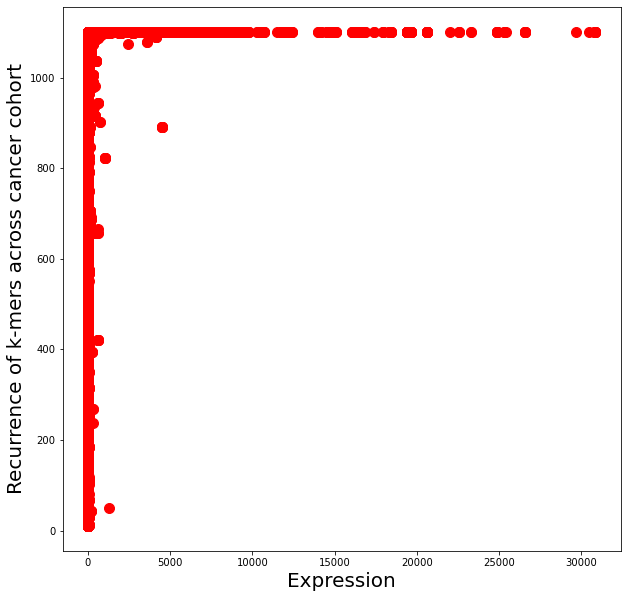

In [15]:
#Building scatter plot for cancer samples:

import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
plt.rcParams["figure.figsize"] = (10, 10)
df.plot.scatter(x='Expression',y='Recurrence of k-mers across cancer cohort', s = 100, c = 'red')
#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
#plt.savefig('njkb.bbjb;kjbkb')


Low is < 10 
Medium 10 < < 50
High > 50 reads 

In [47]:
# Difference between merge( ) and concat( ) in pandas

'''A very high level difference is that merge() is used to combine two (or more) dataframes on the basis of values of common columns(indexes can also be used, use left_index=True and/or right_index=True), 
and concat() is used to append one (or more) dataframes one below the other (or sideways, depending on whether the axis option is set to 0 or 1).

join() is used to merge 2 dataframes on the basis of the index; instead of using merge() with the option left_index=True we can use join().'''



#Merging two dataframes reccurence and expression of k-mers across normal cohort:

#Reccurence:
# /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/filtered_backgrounds/commit_d4aee54_GTEXcore/interm_normals_combiExprCohortLim0.0Across1.tsv

#Expression:
#/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102
#/filter_TCGA-A2-A0D2-01A-21R-A034-07.all/commit_d4aee54_GTEXcore
#/G_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_SampleLim0.0CohortLim0.0Across10_FiltNormalsGtexcoreCohortlim3.0Across10_FiltUniprot.tsv
#/part-00000-ff44ef83-8d6d-4992-8585-46eac2dae2dd-c000.csv


#Pandas merging:
'''
new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])



#Building scatter plot:
#Example

# Program to draw scatter plot using Dataframe.plot
# Import libraries
import pandas as pd
  
# Prepare data
data={'Name':['Dhanashri', 'Smita', 'Rutuja',
              'Sunita', 'Poonam', 'Srushti'],
      'Age':[ 20, 18, 27, 50, 12, 15]}
  
# Load data into DataFrame
df = pd.DataFrame(data = data);
  
# Draw a scatter plot and here size of dots determined by age of person
df.plot.scatter(x = 'Name', y = 'Age', s = 'Age', c = 'red');
'''

"\nnew_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])\n\n\n\n#Building scatter plot:\n#Example\n\n# Program to draw scatter plot using Dataframe.plot\n# Import libraries\nimport pandas as pd\n  \n# Prepare data\ndata={'Name':['Dhanashri', 'Smita', 'Rutuja',\n              'Sunita', 'Poonam', 'Srushti'],\n      'Age':[ 20, 18, 27, 50, 12, 15]}\n  \n# Load data into DataFrame\ndf = pd.DataFrame(data = data);\n  \n# Draw a scatter plot and here size of dots determined by age of person\ndf.plot.scatter(x = 'Name', y = 'Age', s = 'Age', c = 'red');\n"

In [1]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np
#os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/exp_427_kmers_plot2_fix-sample_filtered-spladder.csv.gz', compression = 'gzip', low_memory=False )
df

>pepID  jx_pos  between_codons  includes_5'  includes_3'  \
0            2    56.0             1.0          0.0          0.0   
1            2    57.0             1.0          0.0          0.0   
2            4    12.0             0.0          0.0          0.0   
3            5    12.0             0.0          0.0          1.0   
4            6    12.0             0.0          0.0          0.0   
...        ...     ...             ...          ...          ...   
913530  247875     NaN             NaN          NaN          NaN   
913531  247877     NaN             NaN          NaN          NaN   
913532  247879     NaN             NaN          NaN          NaN   
913533  247881     NaN             NaN          NaN          NaN   
913534  247883     NaN             NaN          NaN          NaN   

                      gene             jx_coord       kmer readFrameAnnotated  \
0       ENSG00000060339.14    68737048_68742427  AAAALQQHS                0.0   
1       ENSG00000060339.14    68742430_68742487  AAAALQQHS                0.0   
2       ENSG00000119333.11  128640690_128637027  AAADGVLSV                0.0   
3       ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   
4       ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   
...                    ...                  ...        ...                ...   
913530                 NaN                  NaN        NaN                NaN   
913531                 NaN                  NaN        NaN                NaN   
913532                 NaN                  NaN        NaN                NaN   
913533                 NaN                  NaN        NaN                NaN   
913534                 NaN                  NaN        NaN                NaN   

       junctionAnnotated  ... TCGAXXA89901A11RA36F07all  \
0                    0.0  ...                       6.0   
1                    0.0  ...                       6.0   
2                    1.0  ...                     156.0   
3                    1.0  ...                       2.0   
4                    1.0  ...                       2.0   
...                  ...  ...                       ...   
913530               NaN  ...                       NaN   
913531               NaN  ...                       NaN   
913532               NaN  ...                       NaN   
913533               NaN  ...                       NaN   
913534               NaN  ...                       NaN   

       TCGAXXA89A01A11RA36F07all TCGAZ7A8R501A42RA41B07all  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                          164.0                     112.0   
3                            1.0                       0.0   
4                            1.0                       0.0   
...                          ...                       ...   
913530                       NaN                       NaN   
913531                       NaN                       NaN   
913532                       NaN                       NaN   
913533                       NaN                       NaN   
913534                       NaN                       NaN   

        TCGAZ7A8R601A11RA41B07all  isCrossJunction junctionAnnotated_kmer  \
0                             3.0             True                    0.0   
1                             3.0             True                    0.0   
2                           651.0             True                    1.0   
3                             4.0             True                    1.0   
4                             4.0             True                    1.0   
...                           ...              ...                    ...   
913530                        NaN              NaN                    NaN   
913531                        NaN              NaN                    NaN   
913532                        NaN              NaN                    N

Mond 5th - Fr 16th of september introduction course 
Mond 19th - end Classes start on 20th 
(LP Come back on 19th but 19th at conference. 20th at the lab )
Only have until 4th without any classes 
Then you have either 
- reduction of work for the lab. You can not get 100% if you are taking classes 
- Or holidays. 15 days max. you need to choose on which days you need to take yuor holidays and on which you work 100% or another percetage. Check this with Patricia 


# Math recap 
vector mathematical (not Python)
Is one dimensional [1,2,3,4] or np.array([1,2,3,4])
matrix mathematical 
Is two dimensional [ [ 1,2,3,4], [ 1,2,3,4]] or np.array([1,2,3,4], [1,2,3,4]) -> 2 rows x 4 , pd.DataFrame(2,4)
[[ 1,2,3,4],
[ 1,2,3,4]]
More advanced tensors > 2d 

# Task 0
Understand well the plots that we did together - If you really have issues understanding a code part you can run it line by line 

# Task 1 
Multicategory plots 
Check whether the recurrence varies as a function of the genes
Y = recurrence (int), X = gene (cat)
Either boxplot or barplot 
Subset a number of genes start with 10 so that it does not crash 
- To subset: Usually SLICING is used df.loc[ (df[column] == group1) || (df[column] == group1), :] 
- Todo really know slicing in pandas super well
- Tu subset more efficiently for many groups (10): Need to set the group as an INDEX, subset based on index the groups that you want, then reset the index (google)

# Task 2 
Scatter plot + Correlation matrix (make the colors nice) 
Check whether the expression of two samples is correlated 
- First plot a SCATTER of the two expression vectors for the two samples 
- Google to find how to ploot a CORRELATION matrix + Google the definition of a correlation matrix 0 = not correlated, 1 very correlated, -1 correlated but inversly

# Task 3 
Continue similar multidimensional plots and choose other columns (include3', include5' etc)
For each column that you choose 
- Check what type float, str etc to know hoe you will plot it 
- If categories. Do n.unique() to see what unique categories there are 
- If it is a flot or an integer (many values) - plot a quick histogram to see how the values distribute. Here check google again to make sure that you understand the y and x axis on the histogram. 
- Build plots of your choices: scatter, boxplots with categories, try to make them readable 

# Task 4 
Take a power point, copy the plots on the power point and describe them to me. You don't need to write a lot just have your personal notes to be able to present. For example boxplot describe the quantiles. For a scatterplot describe the trends and groups. 

I will check if I can at least have a stupid python script and give you the srun (new bsub) command 

# On the new cluster 
- Connect biomed
- Jupyter with time 
- Connect to customapps 
- Go to the project2020_ohsu folder +  and do git pull + check that your notebooks are on the new cluster
- Try use tmux - remember this time you uhave control b as meta key and not control a 
- Tmux connect to session "tmux -t 0" if 0 is the name. If needed google and do a ten min tutorial on tmux with tmux attach, detach, tmux -t 0, open a new window, open a new pannel, close the windows, close the pannel

In [3]:
df.columns

Index(['>pepID', 'jx_pos', 'between_codons', 'includes_5'', 'includes_3'',
       'gene', 'jx_coord', 'kmer', 'readFrameAnnotated', 'junctionAnnotated',
       ...
       'TCGAXXA89901A11RA36F07all', 'TCGAXXA89A01A11RA36F07all',
       'TCGAZ7A8R501A42RA41B07all', 'TCGAZ7A8R601A11RA41B07all',
       'isCrossJunction', 'junctionAnnotated_kmer', 'readFrameAnnotated_kmer',
       'recurrence', 'spladder_GTEX_on_disk', 'strand_spladder'],
      dtype='object', length=1126)

In [4]:
df['TCGAXXA89901A11RA36F07all'].head()

0      6.0
1      6.0
2    156.0
3      2.0
4      2.0
Name: TCGAXXA89901A11RA36F07all, dtype: float64

In [5]:
df['junctionAnnotated_kmer'].head()
df['junctionAnnotated_kmer'].unique()

array([ 0.,  1., nan])

In [6]:
df['readFrameAnnotated_kmer'].head()
df['readFrameAnnotated_kmer'].unique()

array([ 0.,  1., nan])

In [7]:
df['spladder_GTEX_on_disk'].head()
df['spladder_GTEX_on_disk'].unique()

array([ 1., nan])

In [8]:
df['origin'].head()
df['origin'].unique()

array(['3exons_9mer', '2exons', nan, '3exons_9mer/2exons'], dtype=object)

In [9]:
df['percentile_rank'].head()

0    8.5
1    8.5
2    0.5
3    1.8
4    1.8
Name: percentile_rank, dtype: float64

In [10]:
df['affinity'].head()

0    17394.11
1    17394.11
2      115.36
3     5876.76
4     5876.76
Name: affinity, dtype: float64

In [11]:
df['recurrence'].head()

0     970.0
1     970.0
2    1100.0
3     972.0
4     972.0
Name: recurrence, dtype: float64

In [12]:
#list comprehension [ col for col in df.columns if 'TCGA' not in col]

In [13]:
#list comprehension [ col for col in df.columns if 'TCGA' not in col]

In [14]:
#normal for loop
results = [] 
for col in df.columns:
    if 'TCGA' not in col: 
        results.append(col)
        
        

In [15]:
print(results)

['>pepID', 'jx_pos', 'between_codons', "includes_5'", "includes_3'", 'gene', 'jx_coord', 'kmer', 'readFrameAnnotated', 'junctionAnnotated', 'origin', 'peptide', 'sample', 'percentile_rank', 'affinity', 'strand', 'GTEX_presence', 'index', 'isCrossJunction', 'junctionAnnotated_kmer', 'readFrameAnnotated_kmer', 'recurrence', 'spladder_GTEX_on_disk', 'strand_spladder']


In [16]:
df.dtypes


>pepID                       int64
jx_pos                     float64
between_codons             float64
includes_5'                float64
includes_3'                float64
                            ...   
junctionAnnotated_kmer     float64
readFrameAnnotated_kmer    float64
recurrence                 float64
spladder_GTEX_on_disk      float64
strand_spladder             object
Length: 1126, dtype: object

In [17]:
for col in df.columns:
    if 'TCGA' not in col:
        print(col)
        print(df[col].dtypes)
        

>pepID
int64
jx_pos
float64
between_codons
float64
includes_5'
float64
includes_3'
float64
gene
object
jx_coord
object
kmer
object
readFrameAnnotated
object
junctionAnnotated
object
origin
object
peptide
object
sample
object
percentile_rank
float64
affinity
float64
strand
object
GTEX_presence
float64
index
float64
isCrossJunction
object
junctionAnnotated_kmer
float64
readFrameAnnotated_kmer
float64
recurrence
float64
spladder_GTEX_on_disk
float64
strand_spladder
object


In [18]:
df['percentile_rank'].describe() # 25% quantiles google! 

count    286322.000000
mean         13.345418
std          12.012203
min           0.010000
25%           4.000000
50%          10.000000
75%          20.000000
max          80.000000
Name: percentile_rank, dtype: float64

In [19]:
df['affinity'].describe()

count    286322.000000
mean      17170.742263
std       10930.785282
min           2.080000
25%        7409.190000
50%       17590.560000
75%       26330.400000
max       44262.530000
Name: affinity, dtype: float64

(array([1.2756e+05, 6.6698e+04, 4.3689e+04, 2.5197e+04, 1.2924e+04,
        6.2660e+03, 2.7140e+03, 6.9700e+02, 5.2200e+02, 5.5000e+01]),
 array([1.0000e-02, 8.0090e+00, 1.6008e+01, 2.4007e+01, 3.2006e+01,
        4.0005e+01, 4.8004e+01, 5.6003e+01, 6.4002e+01, 7.2001e+01,
        8.0000e+01]),
 <BarContainer object of 10 artists>)

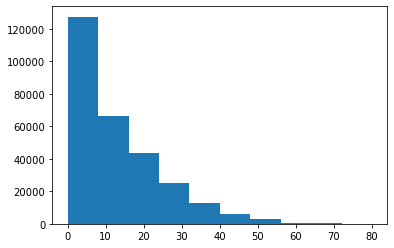

In [20]:
plt.hist(df['percentile_rank'])
#the data distribution. how to interpre histograms
#x axis percentile_ranks, y - the number of 

(array([15836.,  6402.,  5098.,  4098.,  3846.,  3596.,  3632.,  3130.,
         2766.,  3151.,  2934.,  3213.,  3104.,  2597.,  3013.,  2818.,
         2965.,  2698.,  2937.,  2696.,  2719.,  2829.,  3316.,  3323.,
         3273.,  3001.,  3120.,  3185.,  3088.,  2805.,  3294.,  2928.,
         3397.,  2896.,  3218.,  3170.,  3413.,  3411.,  3598.,  3581.,
         3066.,  3309.,  3522.,  3053.,  3684.,  3318.,  3223.,  3276.,
         3851.,  3974.,  3539.,  4022.,  4156.,  3441.,  3967.,  3960.,
         3851.,  3793.,  3910.,  3830.,  3662.,  3660.,  3798.,  3606.,
         3923.,  4003.,  3688.,  3316.,  3594.,  3198.,  3311.,  3347.,
         2986.,  2780.,  2300.,  2348.,  2237.,  1987.,  1809.,  1653.,
         1326.,  1158.,  1067.,   830.,   701.,   553.,   517.,   475.,
          451.,   395.,   198.,   168.,   179.,    97.,    39.,    46.,
           25.,    16.,    18.,    17.]),
 array([2.08000000e+00, 4.44684500e+02, 8.87289000e+02, 1.32989350e+03,
        1.77249800e+03

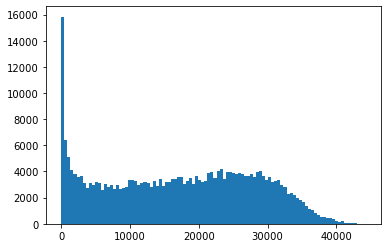

In [21]:
plt.hist(df['affinity'],bins = 100)


In [22]:
#df = df.loc[check if NOT NaN ] 
#Check for NaN under a single DataFrame column: 
df['percentile_rank'].isnull().values.any()


True

In [23]:
#Count the NaN under a single DataFrame column: 
df['percentile_rank'].isnull().sum()

627213

In [24]:
#Tipp use “isna” function in pandas:
df.isna() 

>pepID  jx_pos  between_codons  includes_5'  includes_3'   gene  \
0        False   False           False        False        False  False   
1        False   False           False        False        False  False   
2        False   False           False        False        False  False   
3        False   False           False        False        False  False   
4        False   False           False        False        False  False   
...        ...     ...             ...          ...          ...    ...   
913530   False    True            True         True         True   True   
913531   False    True            True         True         True   True   
913532   False    True            True         True         True   True   
913533   False    True            True         True         True   True   
913534   False    True            True         True         True   True   

        jx_coord   kmer  readFrameAnnotated  junctionAnnotated  ...  \
0          False  False               False              False  ...   
1          False  False               False              False  ...   
2          False  False               False              False  ...   
3          False  False               False              False  ...   
4          False  False               False              False  ...   
...          ...    ...                 ...                ...  ...   
913530      True   True                True               True  ...   
913531      True   True                True               True  ...   
913532      True   True                True               True  ...   
913533      True   True                True               True  ...   
913534      True   True                True               True  ...   

        TCGAXXA89901A11RA36F07all  TCGAXXA89A01A11RA36F07all  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
913530                       True                       True   
913531                       True                       True   
913532                       True                       True   
913533                       True                       True   
913534                       True                       True   

        TCGAZ7A8R501A42RA41B07all  TCGAZ7A8R601A11RA41B07all  isCrossJunction  \
0                           False                      False            False   
1                           False                      False            False   
2                           False                      False            False   
3                           False                      False            False   
4                           False                      False            False   
...                           ...                        ...              ...   
913530                       True                       True             True   
913531                       True                       True             True   
913532                       True                       True             True   
913533                       True                       True             True   
913534                       True                       True             True   

        junctionAnnotated_kmer  readFrameAnnotated_kmer  recurrence  \
0                        False                    False       False   
1                        False                    False       False   
2                        False                    False       False   
3                        False                    False       False   
4                        False                    False       False   
...                        ...                      ...         ...   
913530         

In [25]:
df.isna().any() #returns a boolean value for each column. 
#If there is at least one missing value in that column, the result is True.

>pepID                     False
jx_pos                      True
between_codons              True
includes_5'                 True
includes_3'                 True
                           ...  
junctionAnnotated_kmer      True
readFrameAnnotated_kmer     True
recurrence                  True
spladder_GTEX_on_disk       True
strand_spladder             True
Length: 1126, dtype: bool

In [26]:
df.isna().sum() #returns the number of missing values in each column.

>pepID                          0
jx_pos                     612901
between_codons             612901
includes_5'                612901
includes_3'                612901
                            ...  
junctionAnnotated_kmer     612901
readFrameAnnotated_kmer    612901
recurrence                 612901
spladder_GTEX_on_disk      675797
strand_spladder            675797
Length: 1126, dtype: int64

In [27]:
#Check for NaN under an entire DataFrame: 
df.isnull().values.any()

True

In [28]:
'''
Steps to replace NaN values with 0:
For one column using pandas: df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
For one column using numpy: df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)
For the whole DataFrame using pandas: df.fillna(0)
For the whole DataFrame using numpy: df.replace(np.nan, 0)
'''

"\nSteps to replace NaN values with 0:\nFor one column using pandas: df['DataFrame Column'] = df['DataFrame Column'].fillna(0)\nFor one column using numpy: df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)\nFor the whole DataFrame using pandas: df.fillna(0)\nFor the whole DataFrame using numpy: df.replace(np.nan, 0)\n"

In [ ]:
#df['percentile_rank'] = df['percentile_rank'].fillna(0)

In [29]:
#Check for NaN under a single DataFrame column: 
df['affinity'].isnull().values.any()

True

In [30]:
#df['affinity'] = df['affinity'].fillna(0)

In [31]:
df['affinity']

0         17394.11
1         17394.11
2           115.36
3          5876.76
4          5876.76
            ...   
913530         NaN
913531         NaN
913532         NaN
913533         NaN
913534         NaN
Name: affinity, Length: 913535, dtype: float64

In [32]:
#Gene of origin -> TODO  count the number of genes of origins. 
#First try using the “unique” function in pandas, then try using the “groupby” function in pandas

df['gene'].unique()

array(['ENSG00000060339.14', 'ENSG00000119333.11', 'ENSG00000011304.20',
       ..., 'ENSG00000008441.16', 'ENSG00000136381.13',
       'ENSG00000091436.17'], dtype=object)

In [33]:
#df['gene'] = df['gene'].replace(0, np.nan, inplace=True)

In [34]:
#count unique values in each column
#df.nunique()

#count unique values in each row
#df.nunique(axis=1)

df['gene'].nunique()

3383

In [35]:
#Pandas groupby is used for grouping the data according to the categories and apply a function to the categories. 
#It also helps to aggregate data efficiently. 
#Pandas dataframe. groupby() function is used to split the data into groups based on some criteria.
gk = df.groupby('gene')
gk.first()


>pepID  jx_pos  between_codons  includes_5'  includes_3'  \
gene                                                                           
ENSG00000000419.12   28857    36.0             0.0          0.0          1.0   
ENSG00000000457.14   32098    25.0             0.0          0.0          0.0   
ENSG00000001036.14   34614    69.0             1.0          0.0          0.0   
ENSG00000001461.17     481    21.0             0.0          0.0          0.0   
ENSG00000001497.16   36055    16.0             1.0          0.0          1.0   
...                    ...     ...             ...          ...          ...   
ENSG00000277258.5     7005    25.0             0.0          0.0          0.0   
ENSG00000277791.5    21595     3.0             0.0          0.0          1.0   
ENSG00000278053.5    10351    49.0             0.0          0.0          1.0   
ENSG00000278540.5    30412    10.0             0.0          0.0          1.0   
ENSG00000283526.1    37555    62.0             0.0          0.0          1.0   

                               jx_coord       kmer readFrameAnnotated  \
gene                                                                    
ENSG00000000419.12    50942030_50940955  IIRSDCFNS                  0   
ENSG00000000457.14  169866895_169864508  KFLLASRLV                0.0   
ENSG00000001036.14  143502354_143502122  KQLVETVDG                0.0   
ENSG00000001461.17    24460544_24464025  ACLHWGASL                0.0   
ENSG00000001497.16    65524563_65524261  KVLTQSHTK                0.0   
...                                 ...        ...                ...   
ENSG00000277258.5     38739837_38739682  CTRTVCKTC                0.0   
ENSG00000277791.5     38755990_38760430  GLALTTLSQ                0.0   
ENSG00000278053.5     37621126_37620948  DRSNWKSRE                0.0   
ENSG00000278540.5     37181200_37162050  ISQRCFGRL                  0   
ENSG00000283526.1   131556213_131558052  LLPRGPCST                0.0   

                   junctionAnnotated       origin  ...  \
gene                                               ...   
ENSG00000000419.12               0.0  3exons_9mer  ...   
ENSG00000000457.14               1.0  3exons_9mer  ...   
ENSG00000001036.14               1.0  3exons_9mer  ...   
ENSG00000001461.17               1.0       2exons  ...   
ENSG00000001497.16               0.0       2exons  ...   
...                              ...          ...  ...   
ENSG00000277258.5                0.0       2exons  ...   
ENSG00000277791.5                1.0       2exons  ...   
ENSG00000278053.5                1.0  3exons_9mer  ...   
ENSG00000278540.5                1.0       2exons  ...   
ENSG00000283526.1                1.0       2exons  ...   

                   TCGAXXA89901A11RA36F07all TCGAXXA89A01A11RA36F07all  \
gene                                                                     
ENSG00000000419.12                       0.0                       0.0   
ENSG00000000457.14                       0.0                       0.0   
ENSG00000001036.14                       0.0                       0.0   
ENSG00000001461.17                      50.0                      14.0   
ENSG00000001497.16                       8.0                      10.0   
...                                      ...                       ...   
ENSG00000277258.5                        0.0                       0.0   
ENSG00000277791.5                      462.0                     333.0   
ENSG00000278053.5                       70.0                      41.0   
ENSG00000278540.5                        0.0                       0.0   
ENSG00000283526.1                        3.0                       1.0   

                    TCGAZ7A8R501A42RA41B07all  TCGAZ7A8R601A11RA41B07all  \
gene                                                                       
ENSG00000000419.12                        0.0                        0.0   
ENSG00000000457.14                        0.0                        0.0   
ENSG000

In [36]:
df.groupby(['gene']).mean()

>pepID     jx_pos  between_codons  includes_5'  \
gene                                                                       
ENSG00000000419.12  42312.777778  36.688889        0.000000          0.0   
ENSG00000000457.14  26422.586207  27.241379        0.000000          0.0   
ENSG00000001036.14  53264.793103  58.965517        1.000000          0.0   
ENSG00000001461.17  32186.390374  21.342246        0.085561          0.0   
ENSG00000001497.16  58278.703390  27.025424        1.000000          0.0   
...                          ...        ...             ...          ...   
ENSG00000277258.5   49291.636364  27.727273        0.000000          0.0   
ENSG00000277791.5   52274.740113  34.932203        0.237288          0.0   
ENSG00000278053.5   43511.614035  29.578947        0.000000          0.0   
ENSG00000278540.5   45266.107143  10.000000        0.000000          0.0   
ENSG00000283526.1   52681.777778  62.000000        0.000000          0.0   

                    includes_3'  percentile_rank      affinity  GTEX_presence  \
gene                                                                            
ENSG00000000419.12     1.000000         6.425000   9936.970000       0.533333   
ENSG00000000457.14     0.000000         9.444828  13709.983448       0.551724   
ENSG00000001036.14     0.000000        27.103448  29399.113448       0.500000   
ENSG00000001461.17     0.887701        12.036898  16124.763369       0.962567   
ENSG00000001497.16     0.652542        10.971695  14185.517458       1.000000   
...                         ...              ...           ...            ...   
ENSG00000277258.5      0.000000        11.883077  17189.080000       0.772727   
ENSG00000277791.5      0.638418        11.833333  17342.638870       0.751412   
ENSG00000278053.5      1.000000        15.754386  22171.069825       1.000000   
ENSG00000278540.5      1.000000        11.315789  16801.236842       1.000000   
ENSG00000283526.1      1.000000        25.400000  25446.850000       1.000000   

                       index  TCGA3CAAAU01A11RA41B07all  ...  \
gene                                                     ...   
ENSG00000000419.12  2.222222                   0.000000  ...   
ENSG00000000457.14  1.517241                   1.448276  ...   
ENSG00000001036.14  0.448276                  54.689655  ...   
ENSG00000001461.17  3.625668                  45.721925  ...   
ENSG00000001497.16  4.474576                 168.372881  ...   
...                      ...                        ...  ...   
ENSG00000277258.5   6.409091                   1.545455  ...   
ENSG00000277791.5   6.824859                 195.271186  ...   
ENSG00000278053.5   3.421053                  72.000000  ...   
ENSG00000278540.5   2.392857                  25.428571  ...   
ENSG00000283526.1   1.777778                   2.000000  ...   

                    TCGAWTAB4101A11RA41B07all  TCGAWTAB4401A11RA41B07all  \
gene                                                                       
ENSG00000000419.12                   0.088889                   0.044444   
ENSG00000000457.14                   0.000000                   0.724138   
ENSG00000001036.14                  69.931034                  30.931034   
ENSG00000001461.17                  11.887701                   3.657754   
ENSG00000001497.16                  46.279661                  22.101695   
...                                       ...                        ...   
ENSG00000277258.5                    0.000000                   0.000000   
ENSG00000277791.5                  272.497175                 159.542373   
ENSG00000278053.5                   16.000000                   9.000000   
ENSG00000278540.5                    0.000000                   0.285714   
ENSG00000283526.1                    0.000000                   0.000000   

                    TCGAXXA89901A11RA36F07all  TCGAXXA89A01A11RA36F07all  \
gene                                                                       
ENSG00000

In [37]:
df['jx_coord'].unique()
#len(df['jx_coord'].unique())
len(df['jx_coord'].unique())
df['jx_coord'].unique().shape
#store in the new variable:
testarray = df['jx_coord'].unique()

In [38]:
df['jx_coord'].unique()
len(df['jx_coord'].unique())

9803

In [39]:
#len() method:
#The len() function returns the number of items in an object.
#Syntax: mylist = ["apple", "banana", "cherry"]
#x = len(mylist)
# When the object is a string, the len() function returns the number of characters in the string.

#shape() method:
#With the shape() method, comes the flexibility to obtain the dimensions of any Python object. 
#Yes, it returns a tuple value that indicates the dimensions of a Python object.
#Syntax: dataframe.shape
'''NumPy shape method

With NumPy data structure, we store data elements in the form of an array. When we associate the shape() method with the NumPy array, the dimensions of the array are represented in the form of a tuple.

Syntax:

array.shape
Copy
Example 01:

Here, we have created a NumPy array with no dimensions. Further, we have applied the shape() method on the array to get the dimensions of the created array.

import numpy as np

ar = np.array(0)

print(ar)
print("Shape of the array:")
print(ar.shape)'''

import numpy as np
x = np.array(['68737048_68742427', '68742430_68742487', '128640690_128637027',
       ..., '141053665_141045706', '78337817_78354765',
       '137051210_137049989'], dtype=object)
len(x)

7

In [40]:
df['jx_coord'].nunique()

9802

In [41]:
gk = df.groupby('jx_coord')
#gk.first()
#gk.count()
gk.mean() #mean value , median difference to learn
#documentation of groupby function

>pepID     jx_pos  between_codons  includes_5'  \
jx_coord                                                                    
100030375_100033304  30583.161290  42.000000             0.0          0.0   
100033316_100033364  36238.923077  47.000000             0.0          0.0   
1000469_997804       21378.153846  26.000000             1.0          0.0   
100073101_100084686  54587.363636  29.000000             0.0          0.0   
10008274_10015781    36692.600000  33.000000             1.0          0.0   
...                           ...        ...             ...          ...   
99971826_99971771    80312.358974  57.051282             0.0          0.0   
99971986_99971815    23435.800000  30.320000             1.0          0.0   
99975944_99968430    21766.333333  23.500000             0.0          0.0   
99975944_99972006    16207.591837  23.408163             0.0          0.0   
99985672_99985865    60469.800000  43.000000             0.0          0.0   

                     includes_3'  percentile_rank      affinity  \
jx_coord                                                          
100030375_100033304     1.000000        28.156129  25733.640645   
100033316_100033364     1.000000        27.340000  25032.346538   
1000469_997804          0.769231        19.807692  26889.505385   
100073101_100084686     1.000000              NaN           NaN   
10008274_10015781       0.000000         4.920000   5844.450000   
...                          ...              ...           ...   
99971826_99971771       1.000000         4.656410   9224.486410   
99971986_99971815       0.680000         2.740000   3334.652800   
99975944_99968430       0.666667        11.479167  16880.840833   
99975944_99972006       0.693878        17.234694  16855.457755   
99985672_99985865       0.000000        14.414000  21221.188000   

                     GTEX_presence      index  TCGA3CAAAU01A11RA41B07all  ...  \
jx_coord                                                                  ...   
100030375_100033304            1.0   2.129032                  21.774194  ...   
100033316_100033364            0.0   2.538462                   0.000000  ...   
1000469_997804                 1.0   0.461538                 113.076923  ...   
100073101_100084686            1.0  40.818182                   0.000000  ...   
10008274_10015781              1.0   0.000000                  54.000000  ...   
...                            ...        ...                        ...  ...   
99971826_99971771              0.0  26.128205                1924.615385  ...   
99971986_99971815              0.0   1.000000                   0.000000  ...   
99975944_99968430              1.0   6.500000                   1.375000  ...   
99975944_99972006              1.0   0.510204                1059.918367  ...   
99985672_99985865              1.0   2.000000                   0.000000  ...   

                     TCGAWTAB4101A11RA41B07all  TCGAWTAB4401A11RA41B07all  \
jx_coord                                                                    
100030375_100033304                   0.000000                   0.483871   
100033316_100033364                   0.000000                   0.000000   
1000469_997804                      106.615385                  59.769231   
100073101_100084686                   0.000000                   0.000000   
10008274_10015781                   187.000000                  74.000000   
...                                        ...                        ...   
99971826_99971771                   583.717949                 342.076923   
99971986_99971815                     0.000000                   0.000000   
99975944_99968430                     0.000000                   0.000000   
99975944_99972006                   170.448980                 112.653061   
99985672_99985865                     0.000000                   0.000000   

                     TCGAXXA89901A11RA36F07all  TCGAXXA89A01A11RA36F07all  \
jx_coord            

In [42]:
#Count the NaN under a single DataFrame column: 
df['TCGAXXA89901A11RA36F07all'].isnull().sum()
df['TCGAXXA89901A11RA36F07all'] = df['TCGAXXA89901A11RA36F07all'].fillna(0)

In [43]:
df['TCGAXXA89901A11RA36F07all']

0           6.0
1           6.0
2         156.0
3           2.0
4           2.0
          ...  
913530      0.0
913531      0.0
913532      0.0
913533      0.0
913534      0.0
Name: TCGAXXA89901A11RA36F07all, Length: 913535, dtype: float64

In [ ]:
#df[['percentile_rank', 'affinity']]. plot()
plt.rcParams["figure.figsize"] = (25, 25)
df.plot(x='percentile_rank', y='affinity', style='h', color='#FE3881', alpha=0.9) # points smaller or plot bigger. to make it readab;le
#Changing the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt. show()

In [1]:
plt.rcParams["figure.figsize"] = (20, 20)

#df.plot.scatter(x='percentile_rank',y='affinity', s = 10, c = 'red') #df/plt
#fig = plt.figure(figsize=(8, 6))
#plt.plot(x,y,)
#plt.title('Plot of sinx', fontsize=25)
#plt.xlabel('x', fontsize=20)
#plt.ylabel('sinx', fontsize=20)


NameError: name 'plt' is not defined

In [67]:
df.plot

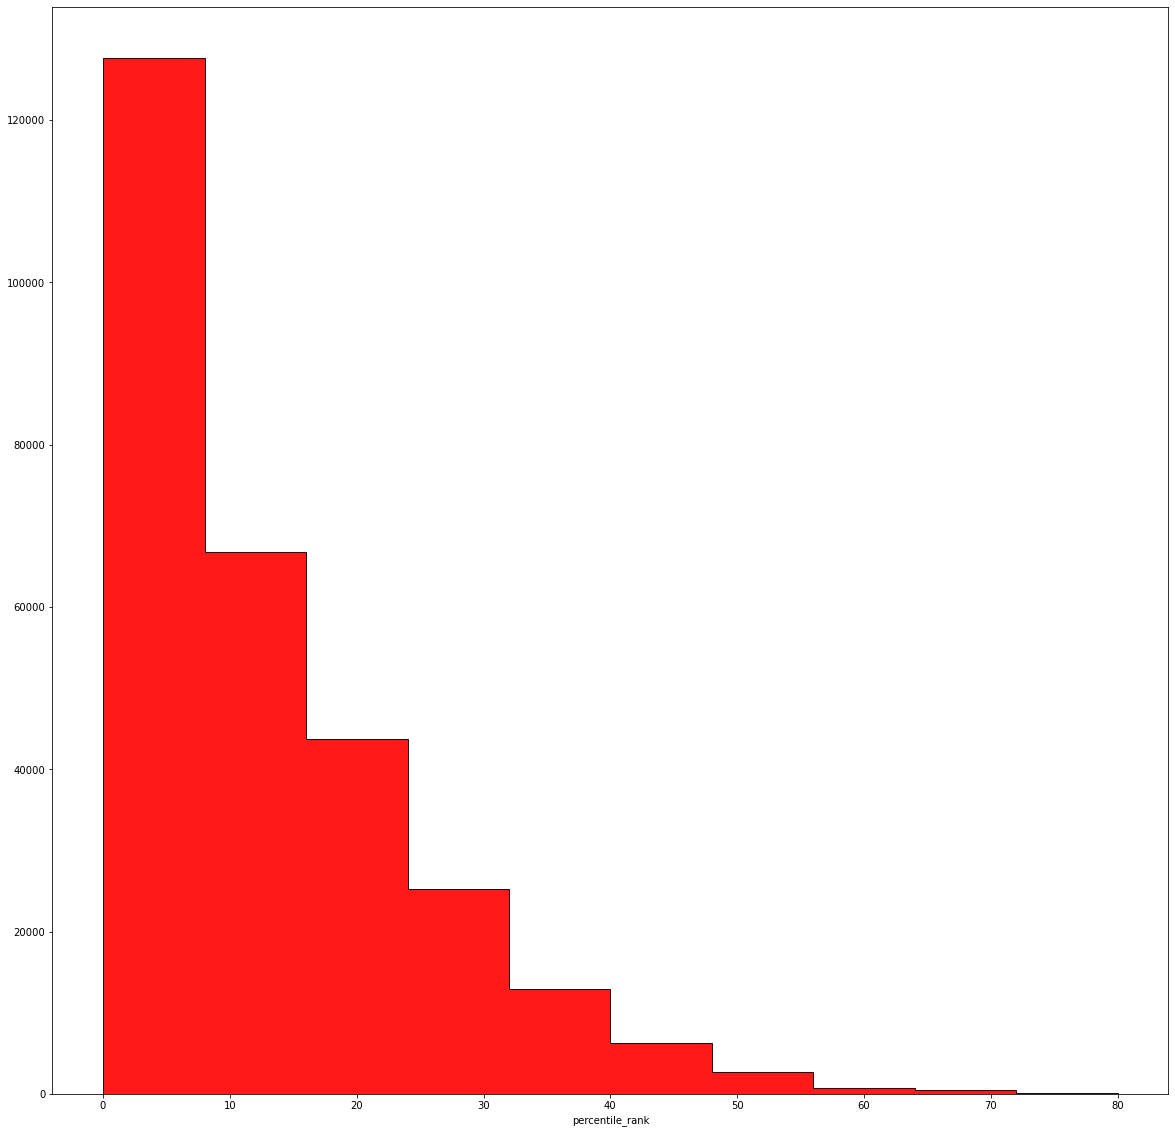

In [8]:
#I would prefer that you use clearly matplotlib plt.hist/boxplot etc OR seaborn

plt.hist(df["percentile_rank"], density=False, histtype='stepfilled', edgecolor='black', facecolor='r', alpha=0.9) 
#google density, important parameter
#density True or False
plt.xlabel("percentile_rank") 
plt.show()

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import pandas as pd
 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [13]:
df['junctionAnnotated_kmer'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: junctionAnnotated_kmer, dtype: float64

In [13]:
color = df['junctionAnnotated_kmer'].apply(lambda x: 'navy' if x == 1.0 else 'gold') # navy/gold

In [14]:
color.unique()

array(['gold', 'navy'], dtype=object)

In [ ]:
#If we wanted to access a certain column in our DataFrame, for example the Grades column, we could simply use the loc function and specify the name of the column in order to retrieve it.

#df.loc[:,"column name"]

#The same result can also be obtained using the iloc function. iloc arguments require integer-value indices instead of string-value names. To reproduce our Grades column example we can use the following code snippet:

#df.iloc[:,3]


In [15]:
df.loc[df['junctionAnnotated_kmer'] == 1.0].shape # blue x4 more

(257101, 1126)

In [16]:
df.loc[df['junctionAnnotated_kmer'] == 0.0].shape # gold 

(43533, 1126)

In [ ]:
#Using the loc() function, we can access the data values fitted in the particular row or column based on the index 
#value passed to the function. We need to provide the index values for which we want the entire data 
#to be represented in the output. List of an array of labels, etc.

In [ ]:
#Access a group of rows and columns by label(s) or a boolean array. .loc[] is primarily label based, but may also 
#be used with a boolean array. 

<AxesSubplot:xlabel='junctionAnnotated_kmer', ylabel='TCGAXXA89901A11RA36F07all'>

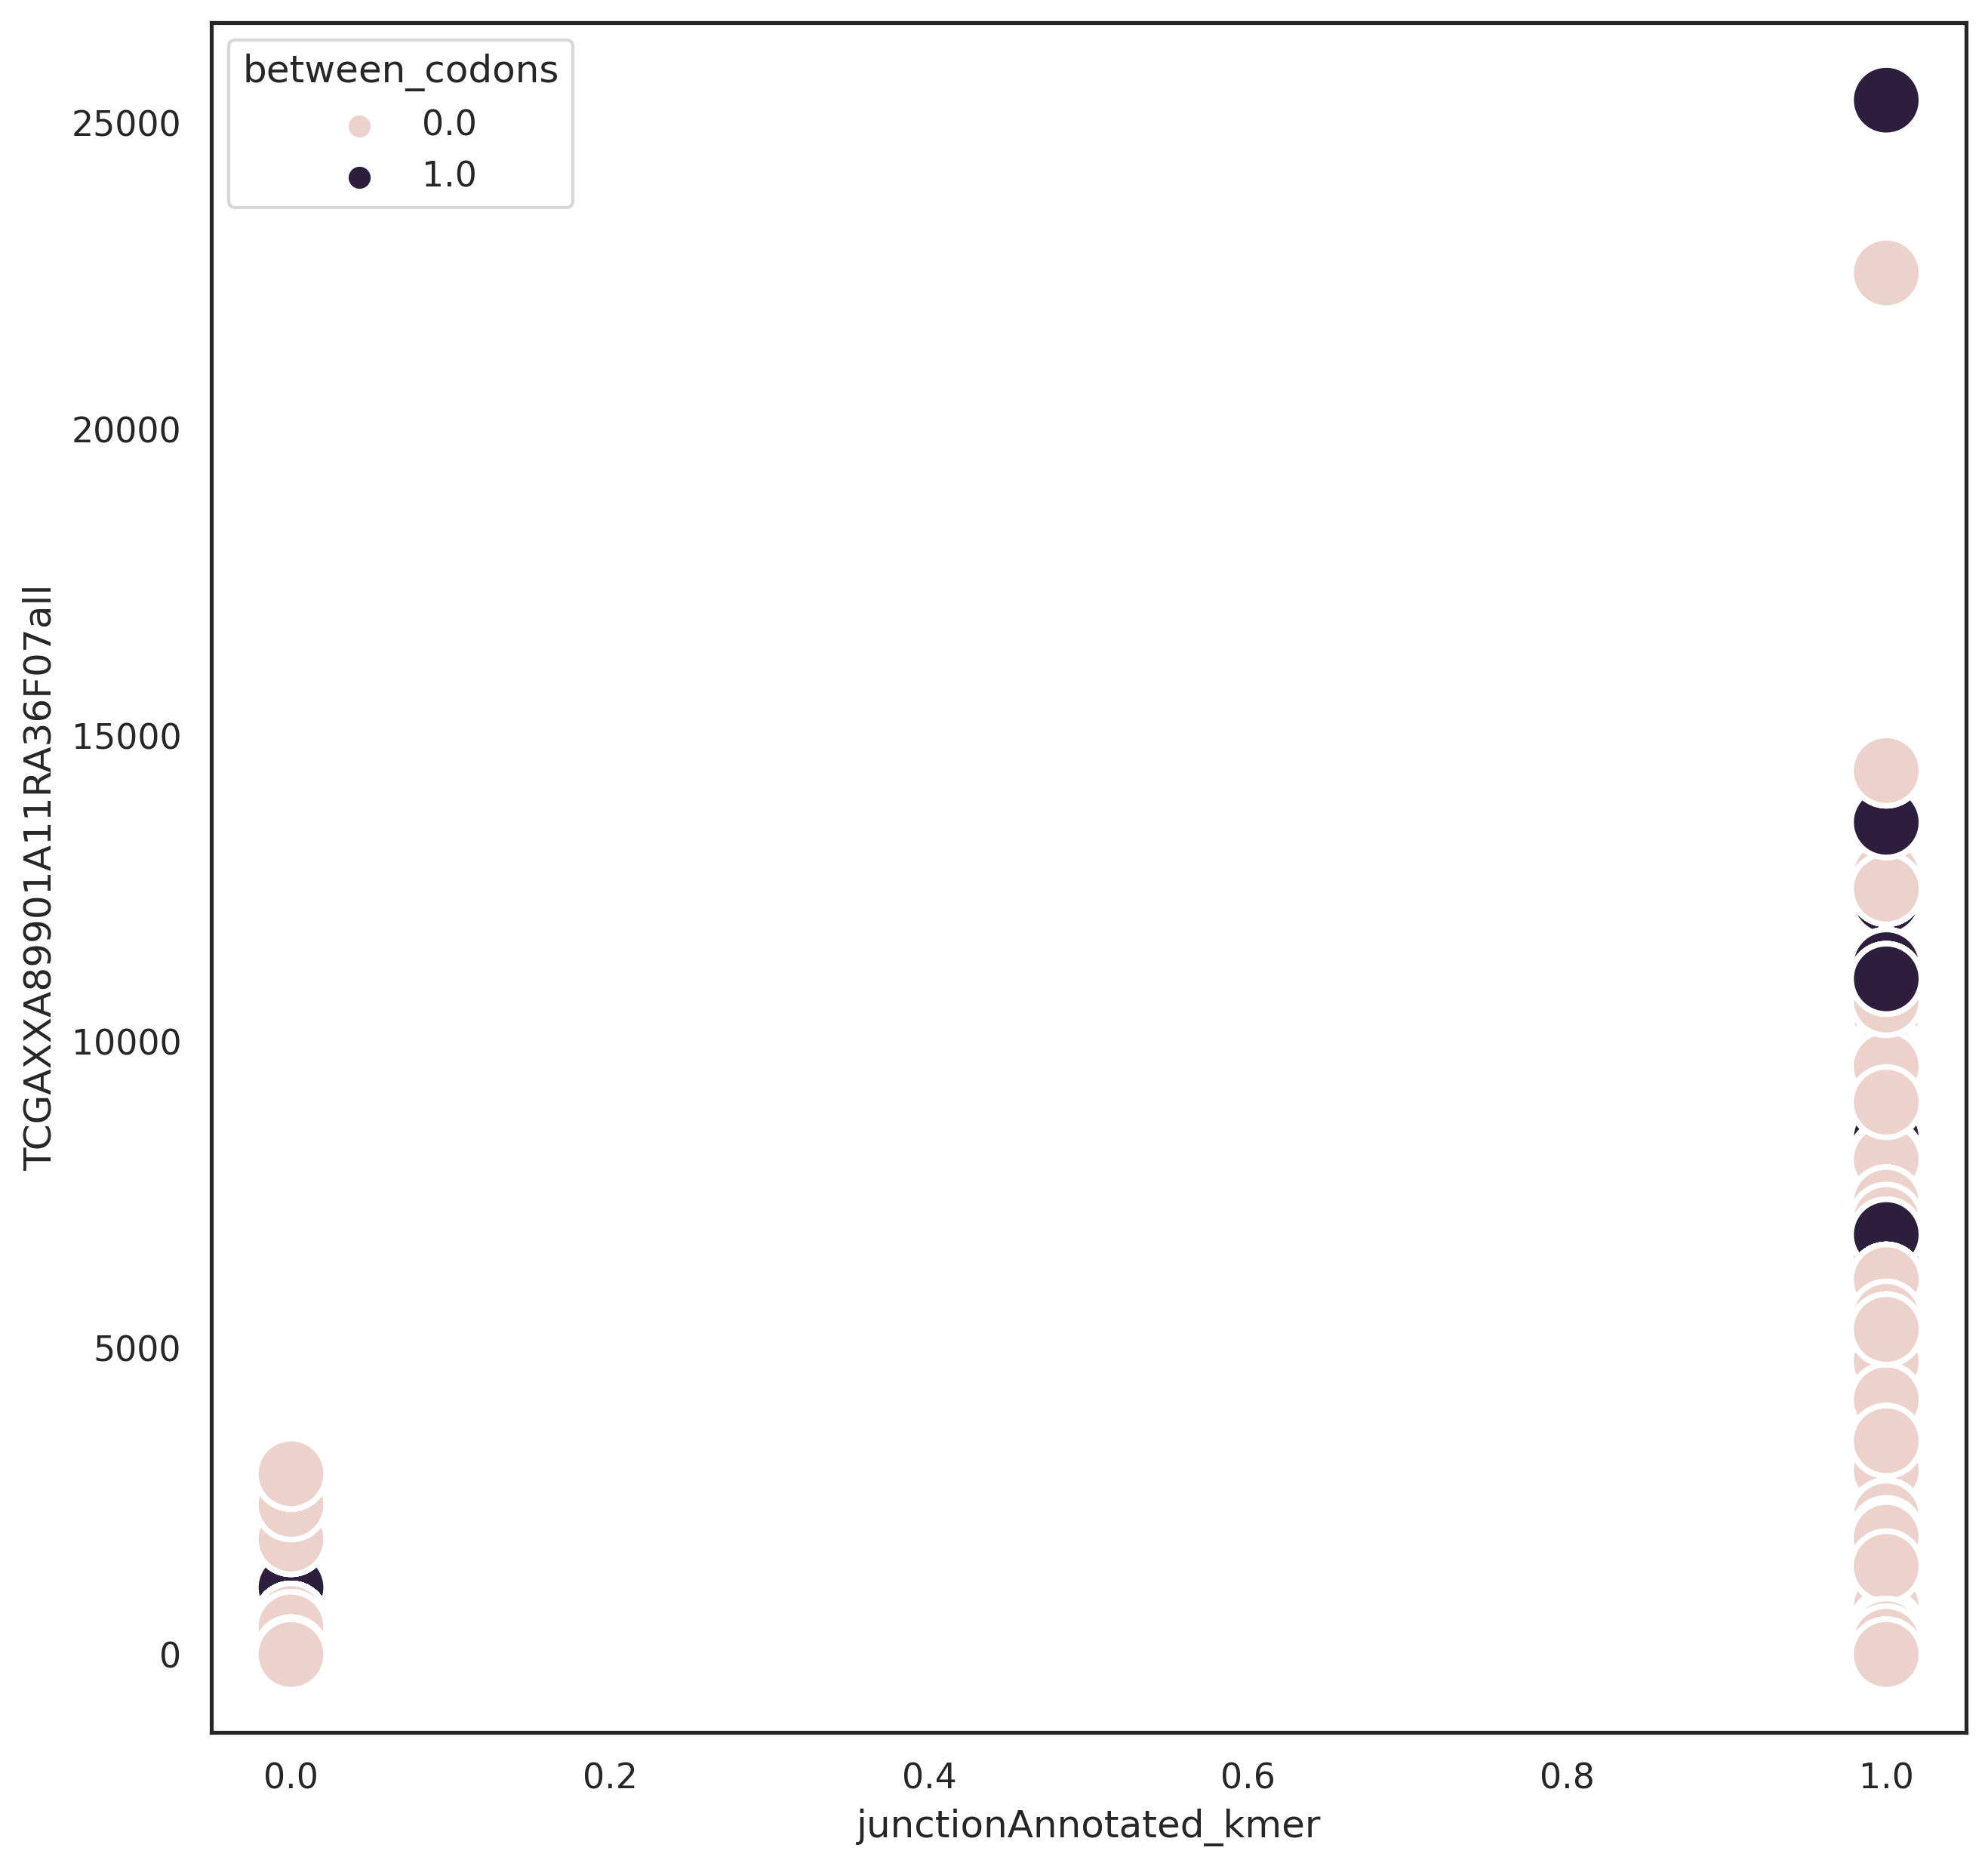

In [89]:
#'between_codons' - For a given peptide, whether the junction position is between codons or inside a codon 
#(coded True = 1 and False = 0)

#junctionAnnotated_kmer (FEATURE flag 0,1)-Whether the junction coordinates of the peptide are present in the 
#annotation (in nature), or whether this is created by the translation software immunopepper. 
#This is a novel splicing event. “neo-junction”

#TCGAXXA89901A11RA36F07all (EXPRESSION)
#Normalized expression value of this sample counting only the reads crossing the junction of interest


sns.set(rc = {'figure.figsize':(10,10),'figure.dpi':300})
sns.set_style("white")
sns.scatterplot(data = df, 
               x = 'junctionAnnotated_kmer', 
               y = 'TCGAXXA89901A11RA36F07all', 
               hue = 'between_codons', s=500)

#he hue parameter determines which column in the data frame should be used for colour encoding

In [19]:
df.groupby('between_codons').first()

>pepID  jx_pos  includes_5'  includes_3'                gene  \
between_codons                                                                 
0.0                  4    12.0          0.0          0.0  ENSG00000119333.11   
1.0                  2    56.0          0.0          0.0  ENSG00000060339.14   

                           jx_coord       kmer readFrameAnnotated  \
between_codons                                                      
0.0             128640690_128637027  AAADGVLSV                0.0   
1.0               68737048_68742427  AAAALQQHS                0.0   

               junctionAnnotated       origin  ... TCGAXXA89901A11RA36F07all  \
between_codons                                 ...                             
0.0                          1.0       2exons  ...                     156.0   
1.0                          0.0  3exons_9mer  ...                       6.0   

               TCGAXXA89A01A11RA36F07all  TCGAZ7A8R501A42RA41B07all  \
between_codons                                                        
0.0                                164.0                      112.0   
1.0                                  0.0                        0.0   

                TCGAZ7A8R601A11RA41B07all isCrossJunction  \
between_codons                                              
0.0                                 651.0            True   
1.0                                   3.0            True   

                junctionAnnotated_kmer  readFrameAnnotated_kmer  recurrence  \
between_codons                                                                
0.0                                1.0                      0.0      1100.0   
1.0                                0.0                      0.0       970.0   

                spladder_GTEX_on_disk  strand_spladder  
between_codons                                          
0.0                               1.0                -  
1.0                               1.0                +  

[2 rows x 1125 columns]

In [20]:
#EXAMPLE Line by line 
df['between_codons'].unique()
between_codon_value= 1.0
subset_of_df = df.loc[df['between_codons'] == between_codon_value, :] # split 
subset_of_df.head()
subset_of_df['junctionAnnotated']

0         0.0
1         0.0
17        0.0
18        0.0
20        0.0
         ... 
803251    1.0
803255    1.0
803259    1.0
803260    1.0
803265    1.0
Name: junctionAnnotated, Length: 98134, dtype: object

In [21]:
bcolor = {1.0: 'red', 0.0: 'green'}
bcolor[1]
bcolor[0]

'green'

In [22]:
np.isnan(between_codon_value)

False

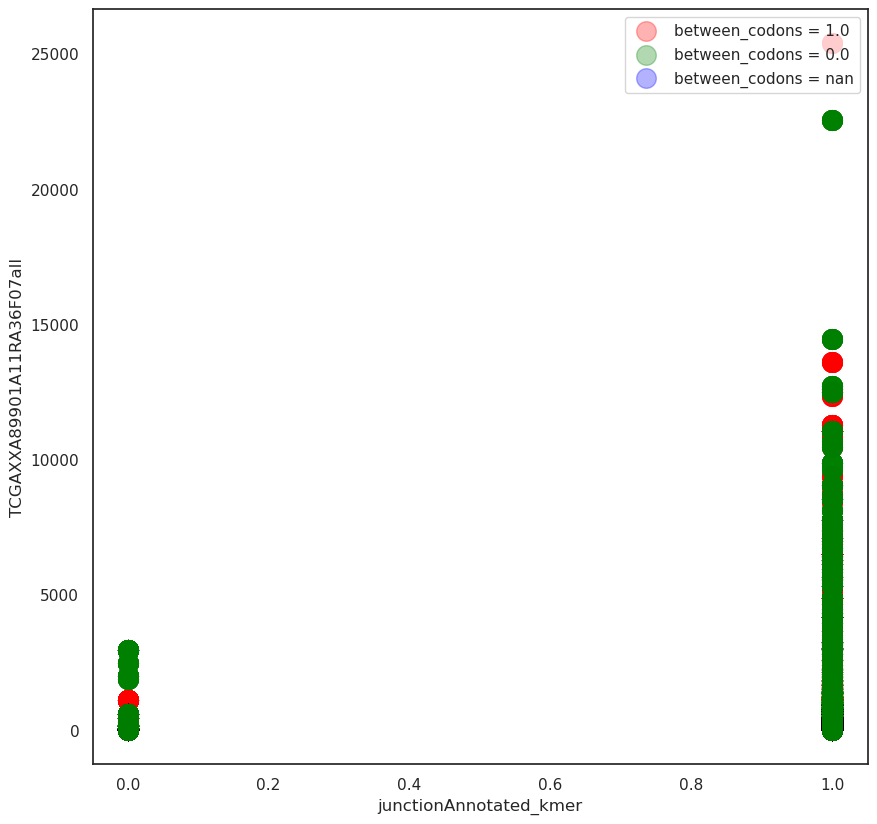

In [32]:
#### Matplotlib with a loop to get the legends on many dimensions ###
### 3d ###

#color = df['junctionAnnotated_kmer'].apply(lambda x: 'navy' if x == 1.0 else 'gold')
#bcolor = df['between_codons'].apply(lambda x: 'red' if x == 1.0 else 'green')
bcolor = {1.0: 'red', 0.0: 'green'}
figure(figsize=(10, 10), dpi=100)#Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100.
for between_codon_value in df['between_codons'].unique(): #We CHOOSE to subset based on the value of between codons 
        
    # SLICE where between codon is 0 or between codon is 1 
    subset_of_df = df.loc[df['between_codons'] == between_codon_value, :] 
    
    # WE USE THE SUBSET AND DO A SCATTER PLOT ONLY ON THE SUBSET
    plt.scatter(x=subset_of_df['junctionAnnotated_kmer'], 
                y=subset_of_df['TCGAXXA89901A11RA36F07all'],
                s=200, 
                c=bcolor[between_codon_value] if not np.isnan(between_codon_value) else 'blue' , # between_codons
                alpha=0.3, 
                marker='o', 
                label=f"between_codons = {between_codon_value}", #string with print the value!
                #edgecolors=bcolor
               )#linewidth=df['recurrence']
    
    plt.legend(loc='upper right')
    plt.xlabel('junctionAnnotated_kmer')
    plt.ylabel('TCGAXXA89901A11RA36F07all')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


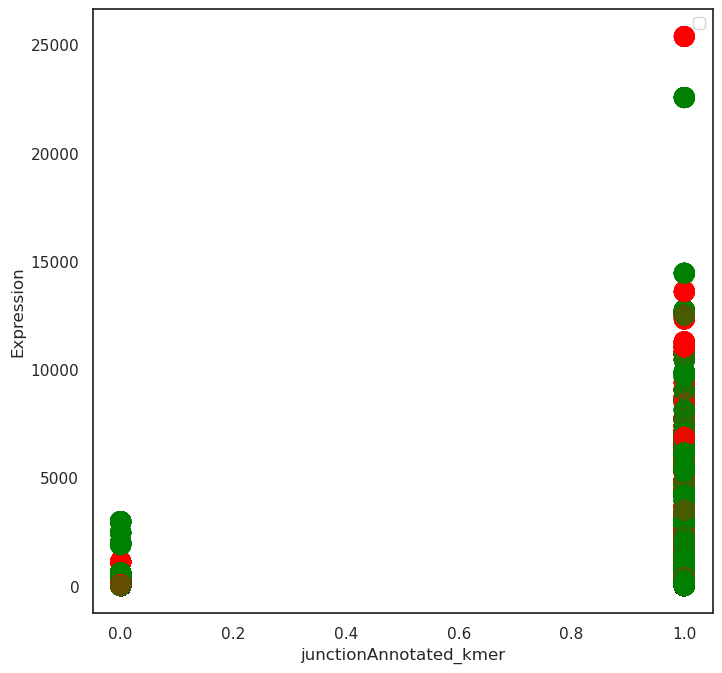

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


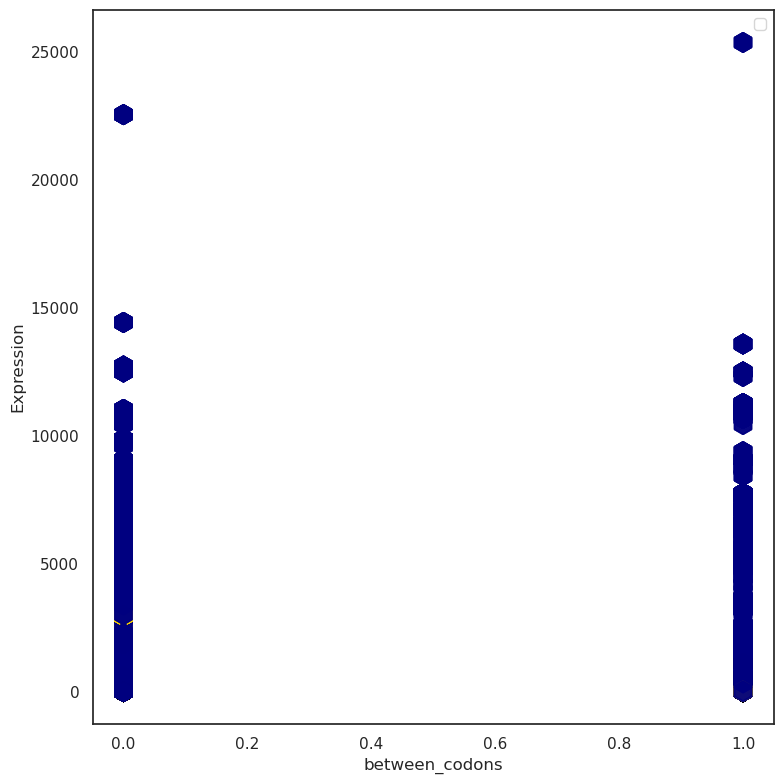

In [69]:
color = df['junctionAnnotated_kmer'].apply(lambda x: 'navy' if x == 1.0 else 'gold')
bcolor = df['between_codons'].apply(lambda x: 'red' if x == 1.0 else 'green')


#First plot
figure(figsize=(8, 8), dpi=100) 
#plt.style.use('ggplot') 
#plt.title('Relation between junctionAnnotated_kmer,between_codons and TCGAXXA89901A11RA36F07all')
plt.xlabel('junctionAnnotated_kmer')
plt.ylabel('Expression') #TCGAXXA89901A11RA36F07all-Normalized expression value of this sample counting only the reads crossin
plt.scatter(x=df['junctionAnnotated_kmer'], 
            y=df['TCGAXXA89901A11RA36F07all'],
            s=200, 
            c=bcolor, # between_codons
            alpha=0.6, 
            marker='o', 
            #edgecolors=bcolor
           )#linewidth=df['recurrence']
plt.legend(loc='upper right')
plt.show()




#Second plot
figure(figsize=(8, 8), dpi=100) #Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100.
plt.scatter(x=df['between_codons'],
            y=df['TCGAXXA89901A11RA36F07all'], 
            s=200, 
            c=color, 
            alpha=0.5, 
            marker='h', 
            #edgecolors=bcolor
           )#linewidth=df['recurrence']
plt.xlabel('between_codons')
plt.ylabel('Expression')
plt.legend(loc='upper right')
 
 
plt.tight_layout()
 
plt.show()
#plt.savefig('multidimensionaldataplot1')

In [15]:
df['transformedColumn'] = (df['recurrence'] - df['recurrence'].min())/(df['recurrence'].max() - df['recurrence'].min()) * 4 + 0
#try [0,4], [0,10]

In [16]:
df['transformedColumn']

0         3.520871
1         3.520871
2         3.992740
3         3.528131
4         3.528131
            ...   
913530         NaN
913531         NaN
913532         NaN
913533         NaN
913534         NaN
Name: transformedColumn, Length: 913535, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


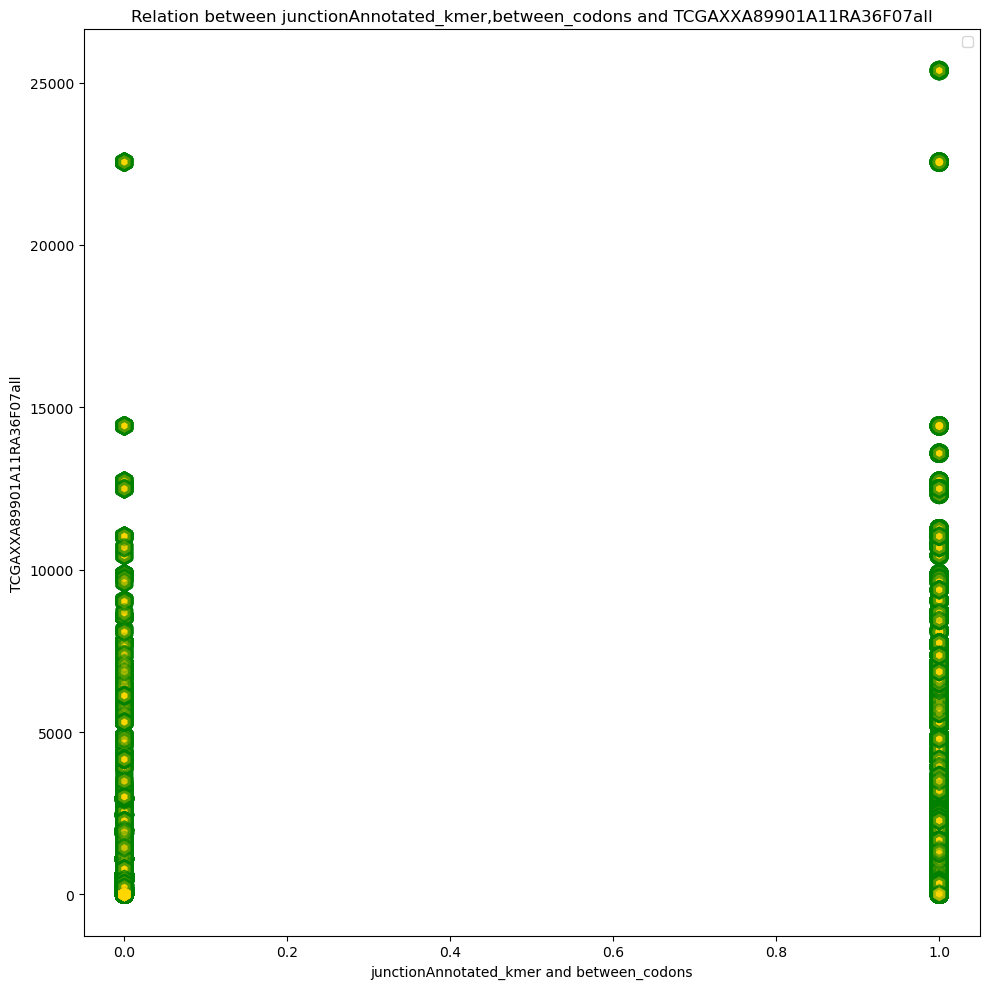

<Figure size 432x288 with 0 Axes>

In [17]:
color = df['junctionAnnotated_kmer'].apply(lambda x: 'navy' if x == '1' else 'gold')
bcolor = df['between_codons'].apply(lambda x: 'red' if x == '1' else 'green')
 
figure(figsize=(10, 10), dpi=100) #Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100.
 
#plt.style.use('ggplot')
 
plt.title('Relation between junctionAnnotated_kmer,between_codons and TCGAXXA89901A11RA36F07all')
plt.xlabel('junctionAnnotated_kmer and between_codons')
plt.ylabel('TCGAXXA89901A11RA36F07all')
plt.scatter(x=df['junctionAnnotated_kmer'],y=df['TCGAXXA89901A11RA36F07all'],s=100,c=color,alpha=0.6,marker='o',edgecolors=bcolor, linewidth=df['transformedColumn'])
plt.scatter(x=df['between_codons'],y=df['TCGAXXA89901A11RA36F07all'],s=100,c=color,alpha=0.5,marker='h',edgecolors=bcolor, linewidth=df['transformedColumn'])
plt.legend(loc='upper right')
 
plt.tight_layout()
 
plt.show()
plt.savefig('multidimensionaldataplot2')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


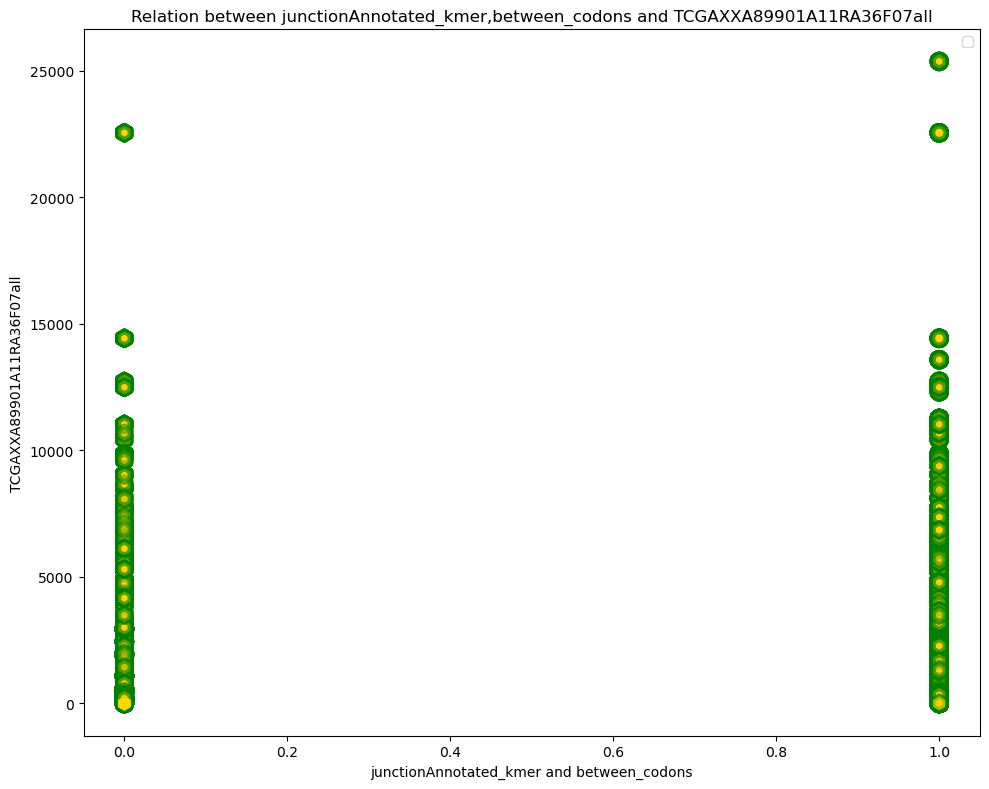

<Figure size 432x288 with 0 Axes>

In [18]:
color = df['junctionAnnotated_kmer'].apply(lambda x: 'navy' if x == '1' else 'gold')
bcolor = df['between_codons'].apply(lambda x: 'red' if x == '1' else 'green')
 
figure(figsize=(10, 8), dpi=100)
 
#plt.style.use('ggplot')
 
plt.title('Relation between junctionAnnotated_kmer,between_codons and TCGAXXA89901A11RA36F07all')
plt.xlabel('junctionAnnotated_kmer and between_codons')
plt.ylabel('TCGAXXA89901A11RA36F07all')

def standardize(X, min_range, max_range):
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max_range - min_range) + min_range
    
plt.scatter(x=df['junctionAnnotated_kmer'],y=df['TCGAXXA89901A11RA36F07all'],s=100,c=color,alpha=0.6,marker='o',edgecolors=bcolor, linewidth=df['transformedColumn'])
plt.scatter(x=df['between_codons'],y=df['TCGAXXA89901A11RA36F07all'],s=100,c=color,alpha=0.5,marker='h',edgecolors=bcolor, linewidth=df['transformedColumn'])
plt.legend(loc='upper right')
 
plt.tight_layout()
 
plt.show()
plt.savefig('multidimensionaldataplot3')


In [ ]:
#box plots using df['origin'] for multiple groups '3exons_9mer', '2exons', nan, '3exons_9mer/2exons': 

#Plotting box plot using matplotlib library:


In [68]:
df['origin'].unique()

array(['3exons_9mer', '2exons', nan, '3exons_9mer/2exons'], dtype=object)

In [69]:
df

>pepID  jx_pos  between_codons  includes_5'  includes_3'  \
0            2    56.0             1.0          0.0          0.0   
1            2    57.0             1.0          0.0          0.0   
2            4    12.0             0.0          0.0          0.0   
3            5    12.0             0.0          0.0          1.0   
4            6    12.0             0.0          0.0          0.0   
...        ...     ...             ...          ...          ...   
913530  247875     NaN             NaN          NaN          NaN   
913531  247877     NaN             NaN          NaN          NaN   
913532  247879     NaN             NaN          NaN          NaN   
913533  247881     NaN             NaN          NaN          NaN   
913534  247883     NaN             NaN          NaN          NaN   

                      gene             jx_coord       kmer readFrameAnnotated  \
0       ENSG00000060339.14    68737048_68742427  AAAALQQHS                0.0   
1       ENSG00000060339.14    68742430_68742487  AAAALQQHS                0.0   
2       ENSG00000119333.11  128640690_128637027  AAADGVLSV                0.0   
3       ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   
4       ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   
...                    ...                  ...        ...                ...   
913530                 NaN                  NaN        NaN                NaN   
913531                 NaN                  NaN        NaN                NaN   
913532                 NaN                  NaN        NaN                NaN   
913533                 NaN                  NaN        NaN                NaN   
913534                 NaN                  NaN        NaN                NaN   

       junctionAnnotated  ... TCGAXXA89A01A11RA36F07all  \
0                    0.0  ...                       0.0   
1                    0.0  ...                       0.0   
2                    1.0  ...                     164.0   
3                    1.0  ...                       1.0   
4                    1.0  ...                       1.0   
...                  ...  ...                       ...   
913530               NaN  ...                       NaN   
913531               NaN  ...                       NaN   
913532               NaN  ...                       NaN   
913533               NaN  ...                       NaN   
913534               NaN  ...                       NaN   

       TCGAZ7A8R501A42RA41B07all TCGAZ7A8R601A11RA41B07all  isCrossJunction  \
0                            0.0                       3.0             True   
1                            0.0                       3.0             True   
2                          112.0                     651.0             True   
3                            0.0                       4.0             True   
4                            0.0                       4.0             True   
...                          ...                       ...              ...   
913530                       NaN                       NaN              NaN   
913531                       NaN                       NaN              NaN   
913532                       NaN                       NaN              NaN   
913533                       NaN                       NaN              NaN   
913534                       NaN                       NaN              NaN   

        junctionAnnotated_kmer readFrameAnnotated_kmer  recurrence  \
0                          0.0                     0.0       970.0   
1                          0.0                     0.0       970.0   
2                          1.0                     0.0      1100.0   
3                          1.0                     0.0       972.0   
4                          1.0                     0.0       972.0   
...                        ...                     ...         ...   
913530                     NaN                     NaN         NaN   


In [70]:
df.describe()

>pepID         jx_pos  between_codons    includes_5'  \
count  913535.000000  300634.000000   300634.000000  300634.000000   
mean   116818.053593      34.113746        0.326423       0.020826   
std     72793.149209      32.726281        0.468905       0.142802   
min         2.000000       0.000000        0.000000       0.000000   
25%     52760.000000      18.000000        0.000000       0.000000   
50%    112205.000000      29.000000        0.000000       0.000000   
75%    180106.000000      43.000000        1.000000       0.000000   
max    247883.000000    1057.000000        1.000000       1.000000   

         includes_3'  percentile_rank       affinity  GTEX_presence  \
count  300634.000000    286322.000000  286322.000000  913535.000000   
mean        0.733706        13.345418   17170.742263       0.228985   
std         0.442020        12.012203   10930.785282       0.420180   
min         0.000000         0.010000       2.080000       0.000000   
25%         0.000000         4.000000    7409.190000       0.000000   
50%         1.000000        10.000000   17590.560000       0.000000   
75%         1.000000        20.000000   26330.400000       0.000000   
max         1.000000        80.000000   44262.530000       1.000000   

               index  TCGA3CAAAU01A11RA41B07all  ...  \
count  300634.000000              300614.000000  ...   
mean        7.597324                 195.840423  ...   
std        10.615928                 934.945968  ...   
min         0.000000                   0.000000  ...   
25%         2.000000                   0.000000  ...   
50%         4.000000                   0.000000  ...   
75%        10.000000                  64.000000  ...   
max       215.000000               49466.000000  ...   

       TCGAWTAB4401A11RA41B07all  TCGAXXA89901A11RA36F07all  \
count              300614.000000              913535.000000   
mean                  105.481215                  57.007578   
std                   807.826942                 483.058337   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     6.000000                   0.000000   
max                 18944.000000               25371.000000   

       TCGAXXA89A01A11RA36F07all  TCGAZ7A8R501A42RA41B07all  \
count              300614.000000              300614.000000   
mean                  188.068064                 179.329449   
std                  1560.913329                1575.735635   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                    42.000000                  14.000000   
max                 74578.000000              100876.000000   

       TCGAZ7A8R601A11RA41B07all  junctionAnnotated_kmer  \
count              300614.000000           300634.000000   
mean                  230.859518                0.855196   
std                  1162.188081                0.351904   
min                     0.000000                0.000000   
25%                     0.000000                1.000000   
50%                     0.000000                1.000000   
75%                    59.000000                1.000000   
max                 21964.000000                1.000000   

       readFrameAnnotated_kmer     recurrence  spladder_GTEX_on_disk  \
count            300634.000000  300634.000000               237738.0   
mean                  0.177641     472.709501                    1.0   
std                   0.382211     522.985739                    0.0   
min                   0.000000       0.000000                    1.0   
25%                   0.000000       1.000000                    1.0   
50%                   0.000000       5.000000                    1.0   
75%                   0.000000    1097.000000            

In [71]:
df['jx_pos'].head()

0    56.0
1    57.0
2    12.0
3    12.0
4    12.0
Name: jx_pos, dtype: float64

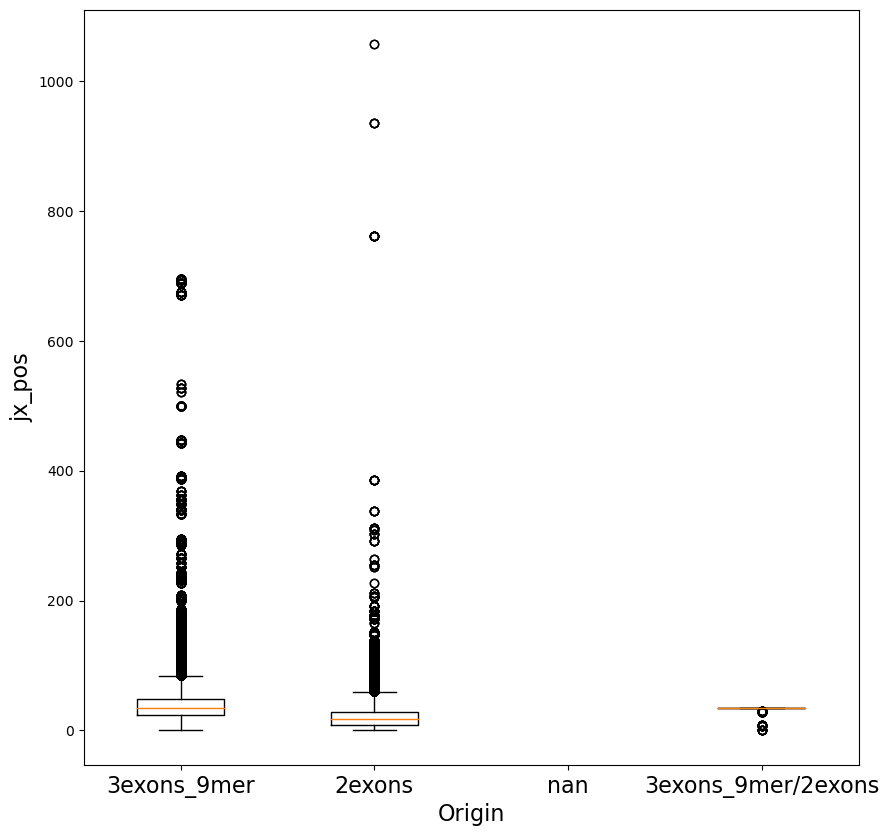

In [19]:
figure(figsize=(10, 10), dpi=100)
origins = df["origin"].unique()
data = [df["jx_pos"][df["origin"] == origin] for origin in origins] #recurrence/jx_pos
plt.ylabel('jx_pos', fontsize = 16)
plt.xlabel('Origin', fontsize = 16)
plt.boxplot(data)
plt.xticks(range(1, 1+len(origins)), origins, fontsize = 16)
plt.savefig('multiple groups box plot#1')

#in the group 3exons_9mer the distribution is not symmetric (the whiskers are not the same on both sides of the box)
#and box plot shape shows the statistical data is skewed (right skewed - positive skew?)
#in the group 2exons the distribution is not symmetric (...)
#in the group 3exons_9mer/2exons the distribution is (??)

In [73]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [20]:
origins = df["origin"].unique()
origins

array(['3exons_9mer', '2exons', nan, '3exons_9mer/2exons'], dtype=object)

In [21]:
origins = df["origin"].unique()
[df["recurrence"][df["origin"] == origin] for origin in origins]

[0         970.0
 1         970.0
 5           1.0
 6           1.0
 7           1.0
           ...  
 803295      1.0
 803297      1.0
 803298      1.0
 803300      1.0
 803301      1.0
 Name: recurrence, Length: 206026, dtype: float64,
 2         1100.0
 3          972.0
 4          972.0
 13        1092.0
 14        1045.0
            ...  
 803239    1100.0
 803240    1082.0
 803256      14.0
 803259     948.0
 803260    1057.0
 Name: recurrence, Length: 94203, dtype: float64,
 Series([], Name: recurrence, dtype: float64),
 5336      1099.0
 5337      1099.0
 5338      1099.0
 5339      1099.0
 5340      1099.0
            ...  
 784809    1099.0
 799855       2.0
 799870       1.0
 799871       1.0
 799873       1.0
 Name: recurrence, Length: 405, dtype: float64]

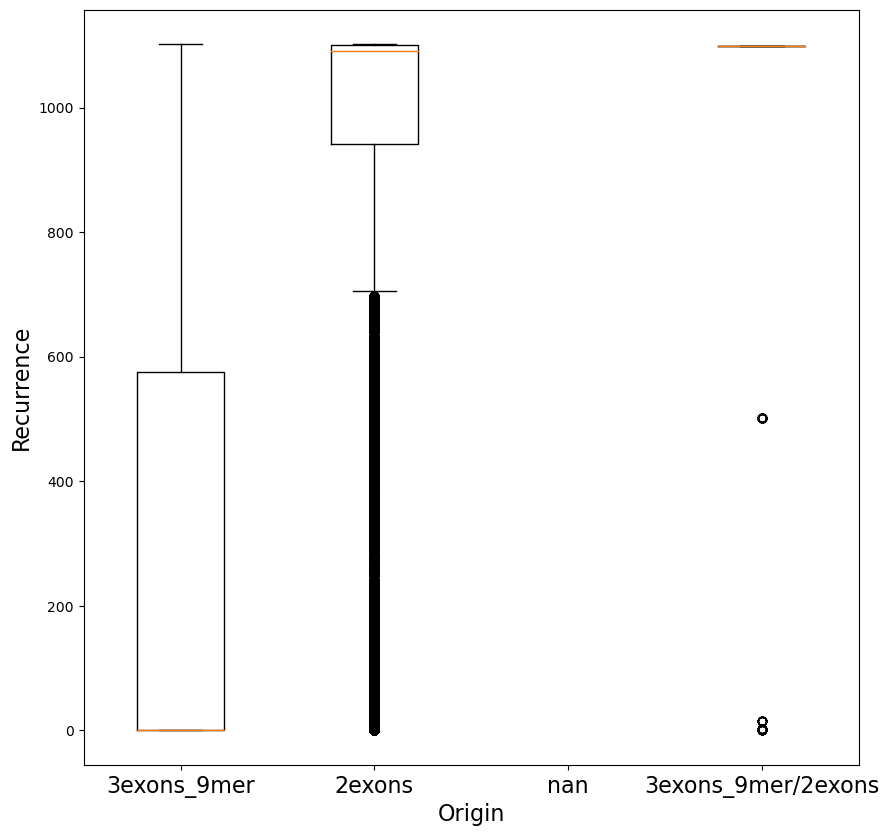

In [22]:
figure(figsize=(10, 10), dpi=100)
origins = df["origin"].unique()
data = [df["recurrence"][df["origin"] == origin] for origin in origins]#recurrence/jx_pos
plt.ylabel('Recurrence', fontsize = 16)
plt.xlabel('Origin', fontsize = 16)
plt.boxplot(data)
plt.xticks(range(1, 1+len(origins)), origins, fontsize = 16)
plt.savefig('multiple groups box plot#2')


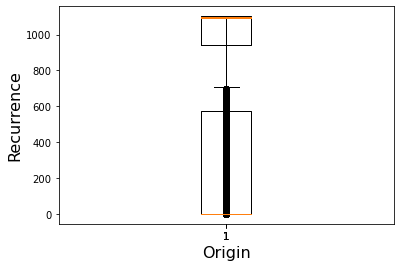

In [23]:
for idx, origin in enumerate( df["origin"].unique()): # Take the unique values 
    # DO SLICING or the group 
    data = df["recurrence"][df["origin"] == origin] #recurrence/jx_pos
    #Plot
    plt.ylabel('Recurrence', fontsize = 16)
    plt.xlabel('Origin', fontsize = 16)
    plt.boxplot(data)
    #plt.xticks(range(1, 1+len(df["origin"].unique())), idx, fontsize = 16)
    plt.savefig('multiple groups box plot#2')


In [24]:
df.loc[df["origin"] == origin, "recurrence"] #right way row, columns, google loc in pandas 

5336      1099.0
5337      1099.0
5338      1099.0
5339      1099.0
5340      1099.0
           ...  
784809    1099.0
799855       2.0
799870       1.0
799871       1.0
799873       1.0
Name: recurrence, Length: 405, dtype: float64

In [25]:
df["recurrence"][df["origin"] == origin] #weird way, can go bad because of the index consistency 

5336      1099.0
5337      1099.0
5338      1099.0
5339      1099.0
5340      1099.0
           ...  
784809    1099.0
799855       2.0
799870       1.0
799871       1.0
799873       1.0
Name: recurrence, Length: 405, dtype: float64

In [26]:
# In the boxplot elegant slicing iis this: 
data = [df.loc[df["origin"] == origin, "recurrence"] for origin in origins]

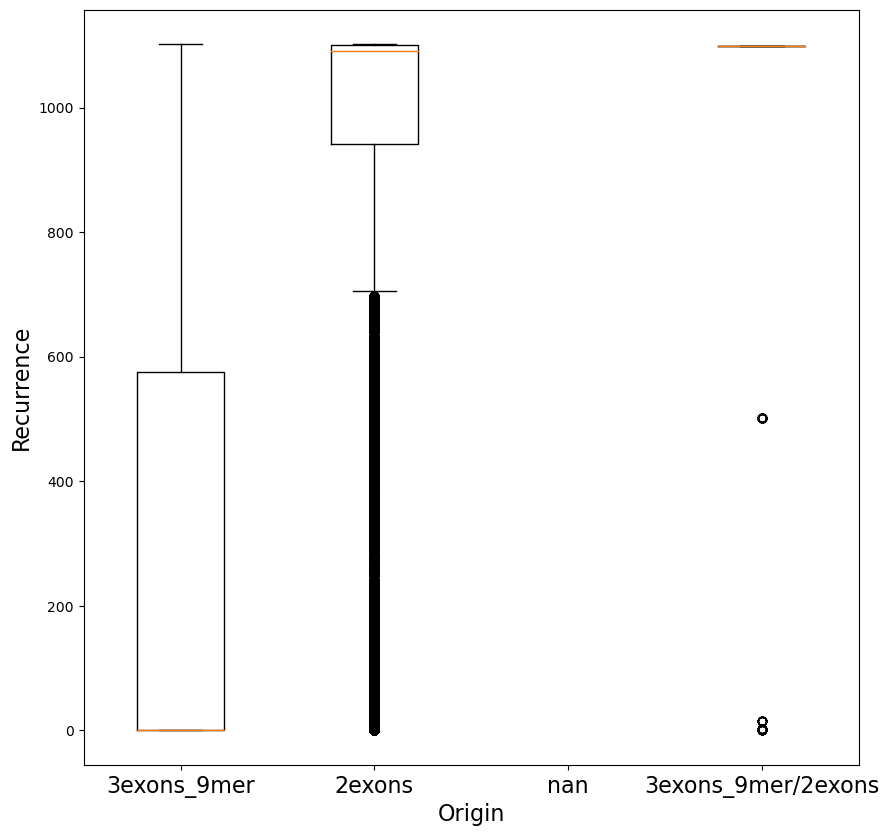

In [27]:
figure(figsize=(10, 10), dpi=100)
origins = df["origin"].unique()
data = [df["recurrence"][df["origin"] == origin] for origin in origins]#recurrence/jx_pos
plt.ylabel('Recurrence', fontsize = 16)
plt.xlabel('Origin', fontsize = 16)
plt.boxplot(data)
plt.xticks(range(1, 1+len(origins)), origins, fontsize = 16)
plt.savefig('multiple groups box plot#2')


#in the group 3exons_9mer the distribution is 
#and box plot shape shows the statistical data is skewed (right skewed - positive skew?)
#in the group 2exons the distribution is not symmetric (...)
#in the group 3exons_9mer/2exons the distribution is (??)

# Task 1

In [ ]:
#The task is to build box and bar plot for xlabel - df["gene"]( create the plot for 10 categories of genes and 
#their reccurence (Subset a number of genes start with 10 so that it does not crash.) and ylabel - df["recurrence"] 


In [ ]:
#To subset: Usually SLICING is used df.loc[ (df[column] == group1) || (df[column] == group1), :] 
#To subset more efficiently for many groups (10): Need to set the group as an INDEX, subset based on index the 
#groups that you want, then reset the index (google)

#I selected manually after command df['gene'].head(40) and then chose 10 unique names of genes.
#1group - ENSG00000060339.14
#2group - ENSG00000119333.11
#3group - ENSG00000011304.20
#4group - ENSG00000086758.16
#5group - ENSG00000120149.9
#6group - ENSG00000060339.14
#7group - ENSG00000042493.16
#8group - ENSG00000224389.9
#9group - ENSG00000177731.16
#10group - ENSG00000136816.16

In [28]:
df["gene"].unique()

array(['ENSG00000060339.14', 'ENSG00000119333.11', 'ENSG00000011304.20',
       ..., 'ENSG00000008441.16', 'ENSG00000136381.13',
       'ENSG00000091436.17'], dtype=object)

In [29]:
df['gene'].head(40)

0     ENSG00000060339.14
1     ENSG00000060339.14
2     ENSG00000119333.11
3     ENSG00000119333.11
4     ENSG00000119333.11
5     ENSG00000011304.20
6     ENSG00000011304.20
7     ENSG00000011304.20
8     ENSG00000011304.20
9     ENSG00000011304.20
10    ENSG00000011304.20
11    ENSG00000011304.20
12    ENSG00000011304.20
13    ENSG00000086758.16
14     ENSG00000120149.9
15     ENSG00000120149.9
16     ENSG00000120149.9
17    ENSG00000060339.14
18    ENSG00000060339.14
19                   NaN
20    ENSG00000060339.14
21    ENSG00000060339.14
22    ENSG00000042493.16
23    ENSG00000042493.16
24     ENSG00000224389.9
25     ENSG00000224389.9
26    ENSG00000177731.16
27    ENSG00000177731.16
28    ENSG00000136816.16
29    ENSG00000136816.16
30    ENSG00000089094.19
31    ENSG00000102710.20
32    ENSG00000102710.20
33    ENSG00000102710.20
34    ENSG00000102710.20
35    ENSG00000102710.20
36    ENSG00000102710.20
37    ENSG00000102710.20
38    ENSG00000180822.11
39    ENSG00000180822.11


In [30]:
df['recurrence'].head(40)

0      970.0
1      970.0
2     1100.0
3      972.0
4      972.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13    1092.0
14    1045.0
15    1045.0
16    1045.0
17       1.0
18       1.0
19       NaN
20       1.0
21       1.0
22       1.0
23       1.0
24    1097.0
25    1097.0
26    1102.0
27    1102.0
28    1097.0
29    1097.0
30    1098.0
31    1099.0
32    1099.0
33    1099.0
34    1099.0
35    1099.0
36    1099.0
37    1099.0
38    1102.0
39    1102.0
Name: recurrence, dtype: float64

In [104]:
df['gene'].nunique()

3383

In [105]:
df['gene'].unique()[:10]

array(['ENSG00000060339.14', 'ENSG00000119333.11', 'ENSG00000011304.20',
       'ENSG00000086758.16', 'ENSG00000120149.9', nan,
       'ENSG00000042493.16', 'ENSG00000224389.9', 'ENSG00000177731.16',
       'ENSG00000136816.16'], dtype=object)

In [106]:
df1 = df.loc[~df['recurrence'].isnull()]

#Here I can use code to select 10 unique gene names:

genes = df1["gene"].unique()[:10]
#genes = df1[["gene"]].groupby("gene").size().sort_values(ascending=False)[:10].index.values

#isin() method checks if the df contains the specified values
df1 = df1[df1["gene"].isin(genes)]

# Box plot

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

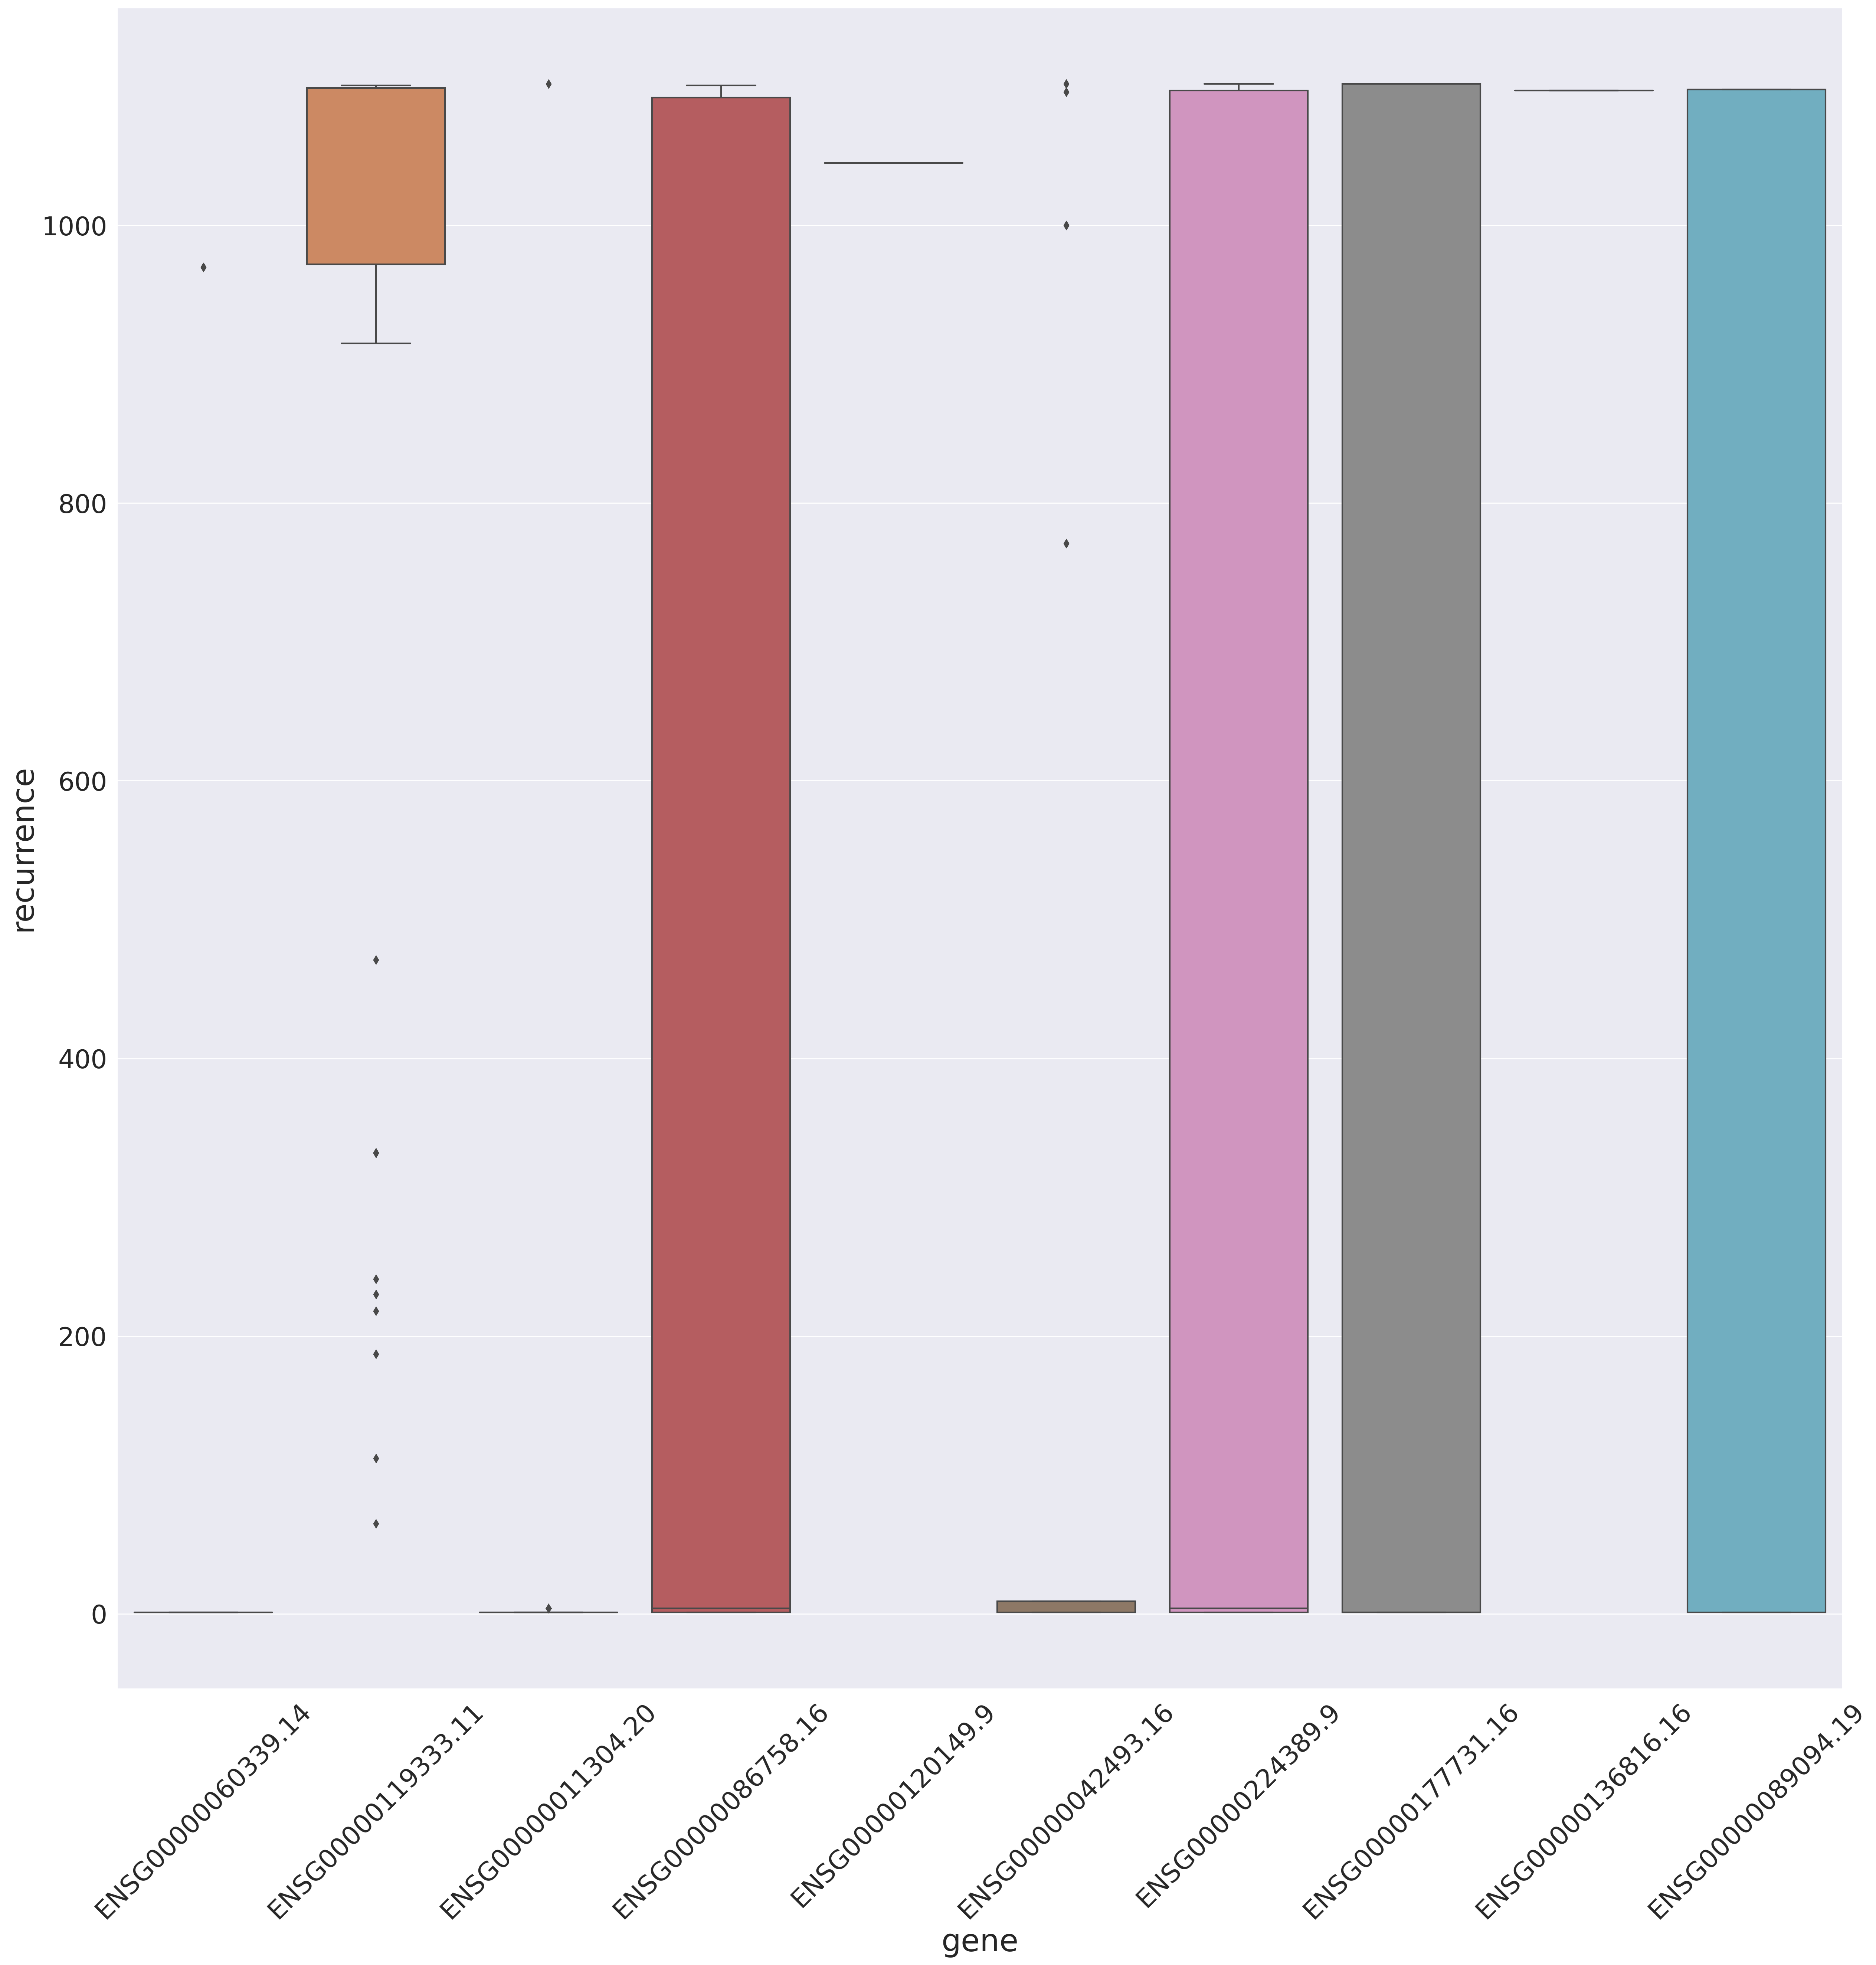

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
ax = sns.boxplot(data=df1, x="gene", y="recurrence", ax=ax)
ax.set_ylabel('recurrence', fontsize = 30)
ax.set_xlabel('gene', fontsize = 30)
plt.xticks(rotation=45, fontsize=25)
plt.yticks(rotation=0, fontsize=25)
# plt.savefig('multiple groups box plot#1')

# Bar plot 

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

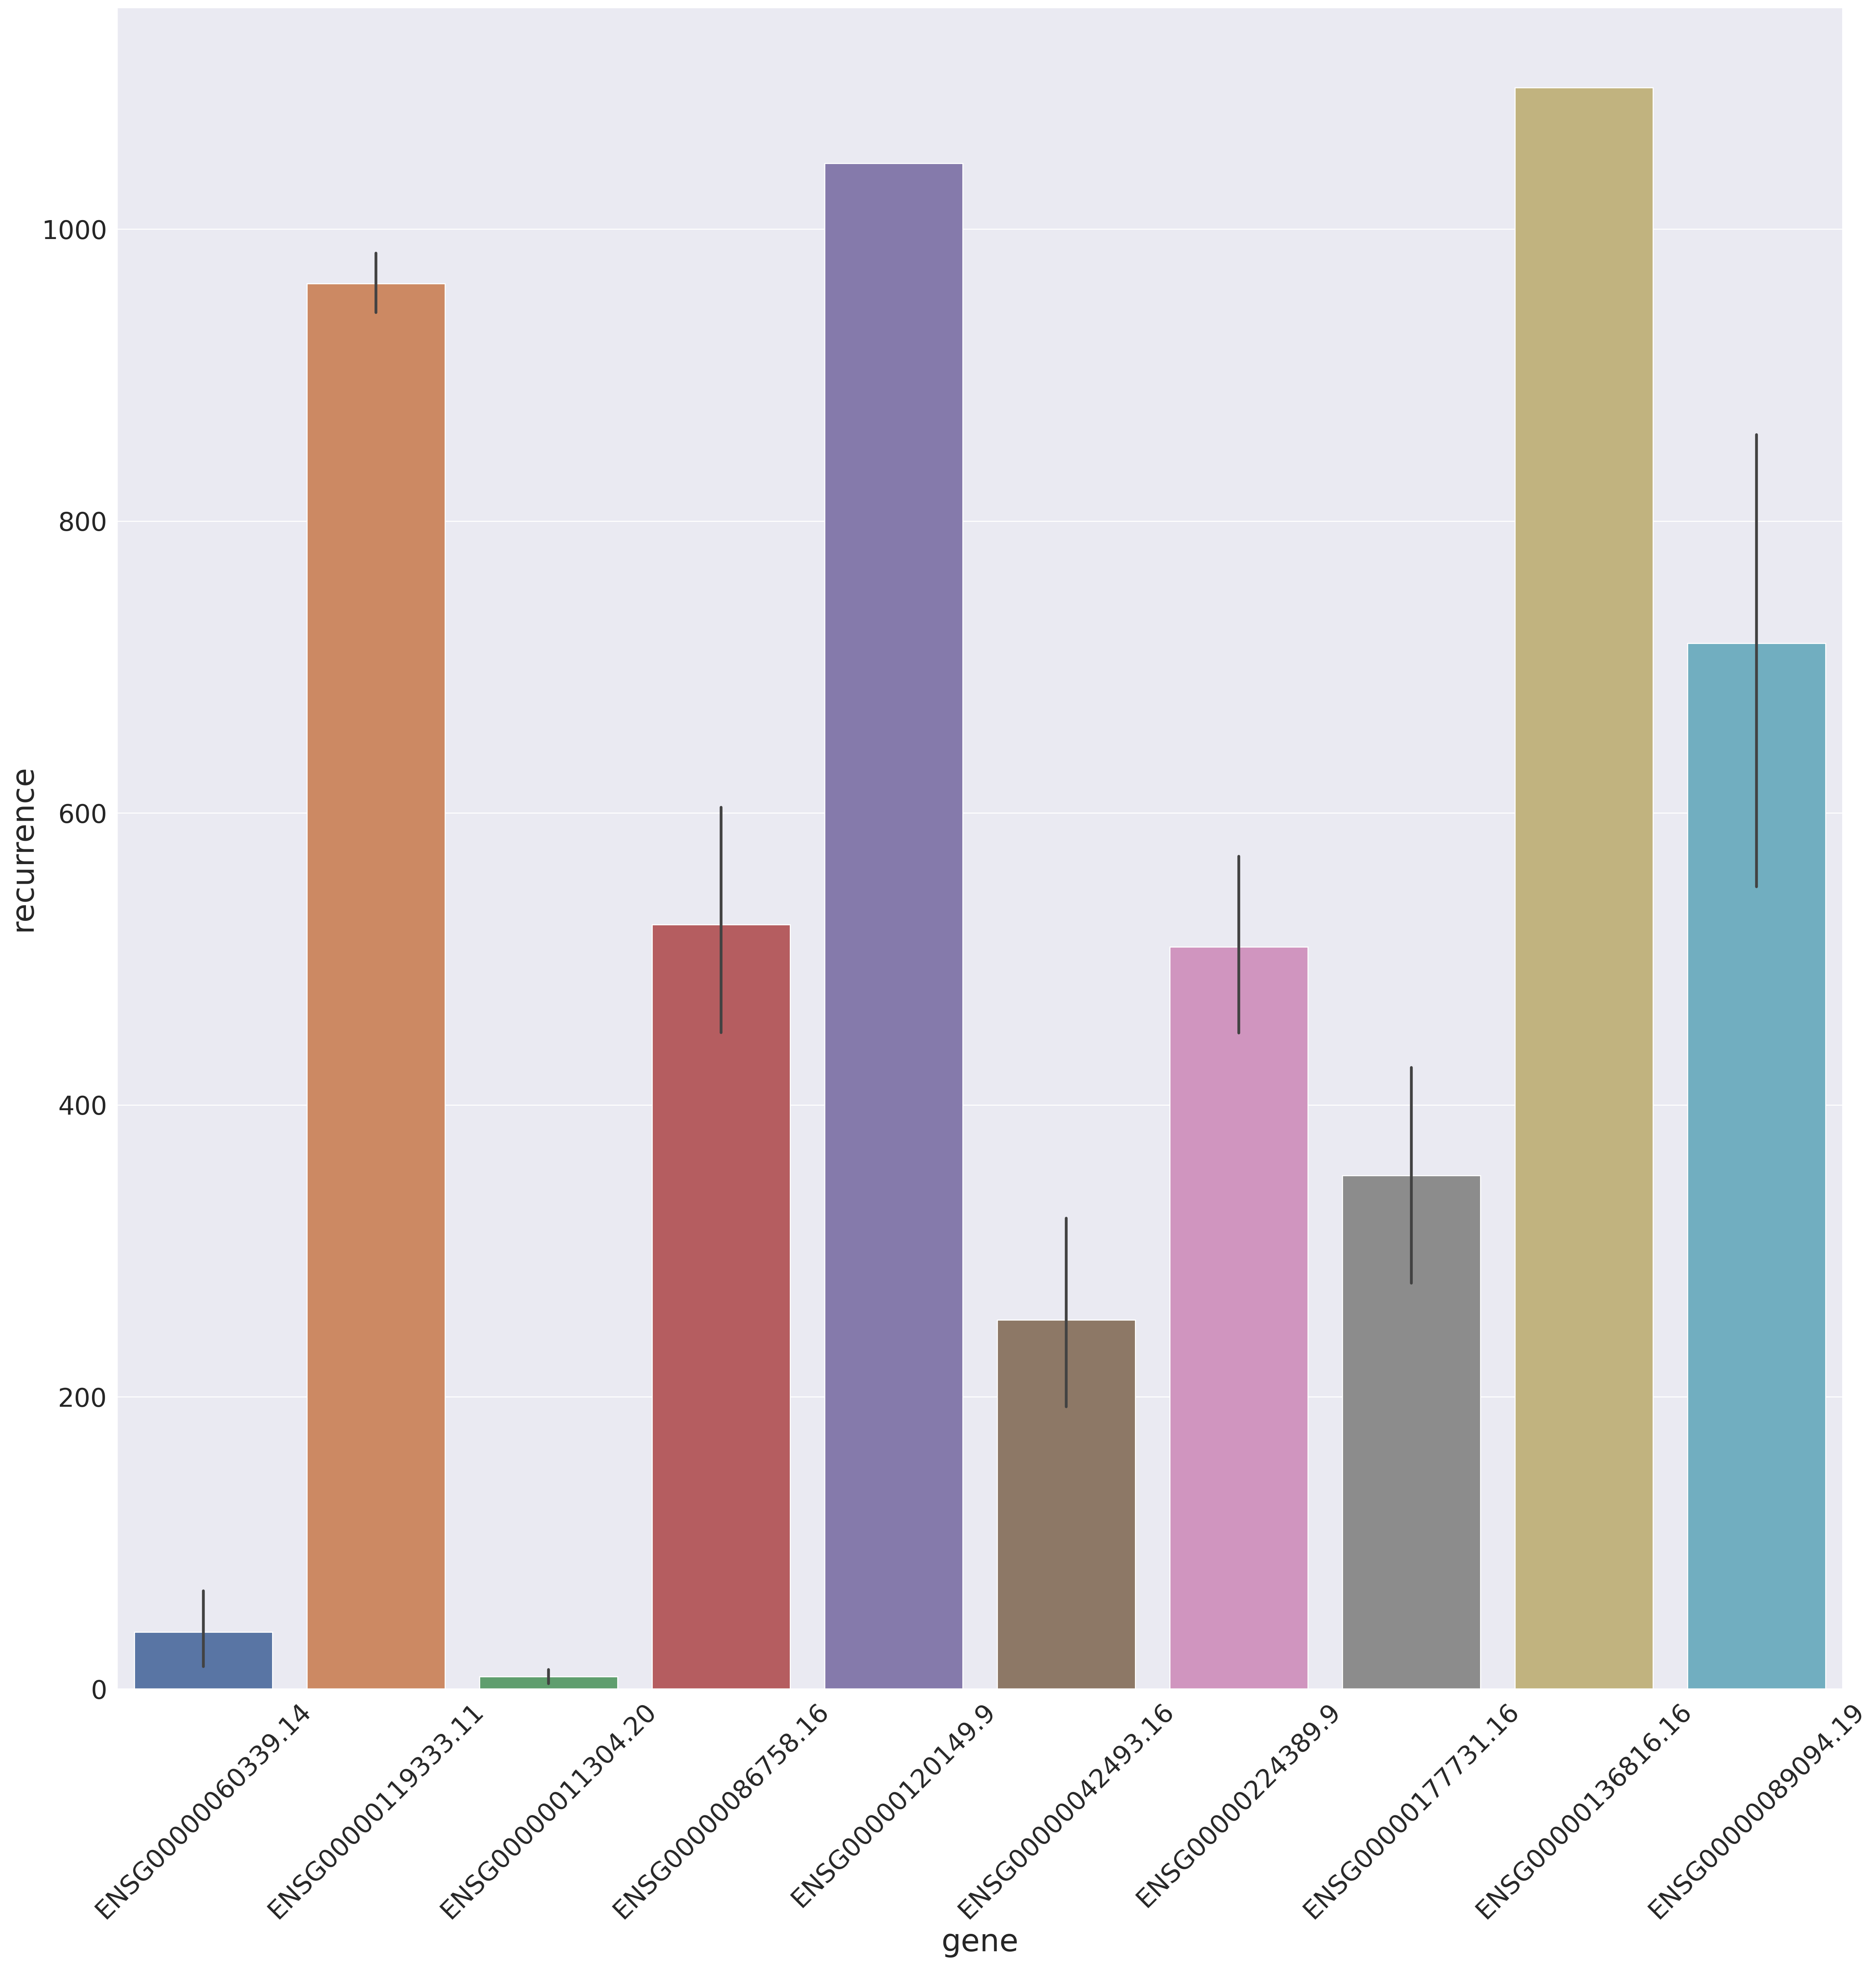

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
ax = sns.barplot(data=df1, x="gene", y="recurrence", ax=ax)
ax.set_ylabel('recurrence', fontsize = 30)
ax.set_xlabel('gene', fontsize = 30)
plt.xticks(rotation=45, fontsize=25)
plt.yticks(rotation=0, fontsize=25)

In [113]:
df1 = df.loc[~df['recurrence'].isnull()] 
#2) Look for how many times each of the genes occurs
fr = df1.groupby('gene')['gene'].count()
fr.head()

gene
ENSG00000000419.12     45
ENSG00000000457.14     29
ENSG00000001036.14     58
ENSG00000001461.17    187
ENSG00000001497.16    118
Name: gene, dtype: int64

# Task 2

In [ ]:

#Scatter plot + Correlation matrix (make the colors nice) Check whether the expression of two samples is correlated

#First plot a SCATTER of the two expression vectors for the two samples
#Google to find how to plot a CORRELATION matrix + Google the definition of a correlation matrix 
# 0 = not correlated, 1 very correlated, -1 correlated but inversly


In [ ]:
#Will take for example TCGAXXA89A01A11RA36F07all and TCGAZ7A8R501A42RA41B07all columns with expression data

In [95]:
df.head()

>pepID  jx_pos  between_codons  includes_5'  includes_3'  \
0       2    56.0             1.0          0.0          0.0   
1       2    57.0             1.0          0.0          0.0   
2       4    12.0             0.0          0.0          0.0   
3       5    12.0             0.0          0.0          1.0   
4       6    12.0             0.0          0.0          0.0   

                 gene             jx_coord       kmer readFrameAnnotated  \
0  ENSG00000060339.14    68737048_68742427  AAAALQQHS                0.0   
1  ENSG00000060339.14    68742430_68742487  AAAALQQHS                0.0   
2  ENSG00000119333.11  128640690_128637027  AAADGVLSV                0.0   
3  ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   
4  ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   

  junctionAnnotated  ... TCGAXXA89A01A11RA36F07all TCGAZ7A8R501A42RA41B07all  \
0               0.0  ...                       0.0                       0.0   
1               0.0  ...                       0.0                       0.0   
2               1.0  ...                     164.0                     112.0   
3               1.0  ...                       1.0                       0.0   
4               1.0  ...                       1.0                       0.0   

  TCGAZ7A8R601A11RA41B07all  isCrossJunction  junctionAnnotated_kmer  \
0                       3.0             True                     0.0   
1                       3.0             True                     0.0   
2                     651.0             True                     1.0   
3                       4.0             True                     1.0   
4                       4.0             True                     1.0   

  readFrameAnnotated_kmer  recurrence  spladder_GTEX_on_disk  strand_spladder  \
0                     0.0       970.0                    1.0                +   
1                     0.0       970.0                    NaN              NaN   
2                     0.0      1100.0                    1.0                -   
3                     0.0       972.0                    1.0                -   
4                     0.0       972.0                    1.0                -   

   transformedColumn  
0           3.520871  
1           3.520871  
2           3.992740  
3           3.528131  
4           3.528131  

[5 rows x 1127 columns]

# Scatter plot

In [ ]:
#How to recover matplotlib defaults after setting stylesheet
mpl.rcParams.update(mpl.rcParamsDefault)

'\nIf we use "equal" as an aspect ratio in the function, we get a plot with the same scaling from data points to \nplot units for X-axis and Y-axis. It sets both X-axis and Y-axis to have the same range. \nThen ax.set_aspect(\'equal\') sets both axes to be equal.\n'

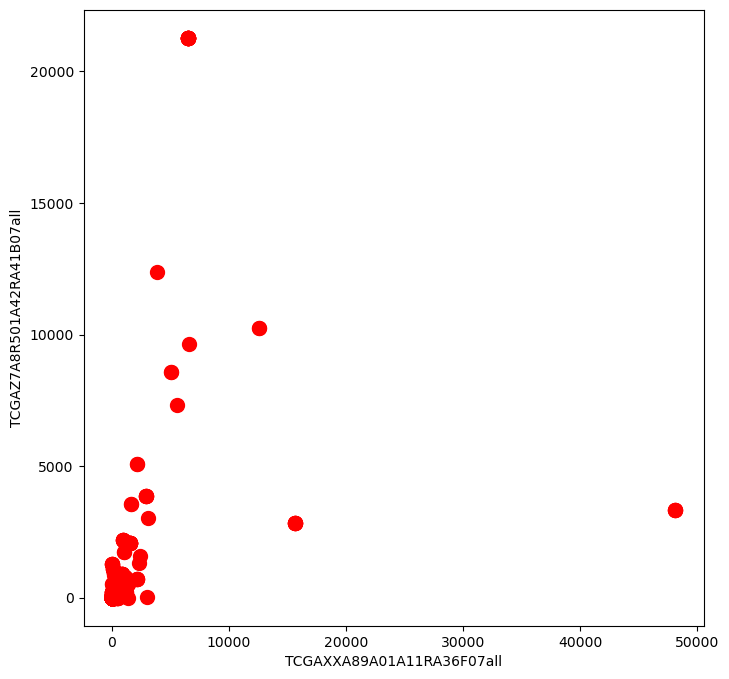

In [123]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
plt.rcParams["figure.figsize"] = (8, 8)
df_reduced = df.head(5000)
df_reduced.plot.scatter(x='TCGAXXA89A01A11RA36F07all',y='TCGAZ7A8R501A42RA41B07all', s = 100, c = 'red')

'''
If we use "equal" as an aspect ratio in the function, we get a plot with the same scaling from data points to 
plot units for X-axis and Y-axis. It sets both X-axis and Y-axis to have the same range. 
Then ax.set_aspect('equal') sets both axes to be equal.
'''

In [12]:
#This plot shows that two samples TCGAXXA89A01A11RA36F07all and TCGAZ7A8R501A42RA41B07all are not correlated

# Correlation Matrix Understanding

In [ ]:
'''
A correlation matrix is a table containing correlation coefficients between variables. 
Each cell in the table represents the correlation between two variables. The value lies between -1 and 1.
A correlation matrix is used to summarize data, as a diagnostic for advanced analyses and as an input into a more 
advanced analysis. The two key components of the correlation are:

    Magnitude: larger the magnitude, stronger the correlation.
    
    Sign:
    
    If positive, there is a regular correlation.
    
    If negative, there is an inverse correlation.
    
    0 = not correlated
    
    The line of 1.00s going from the top left to the bottom right is the main diagonal, 
    which shows that each variable always perfectly correlates with itself.
'''

# Correlation Matrix

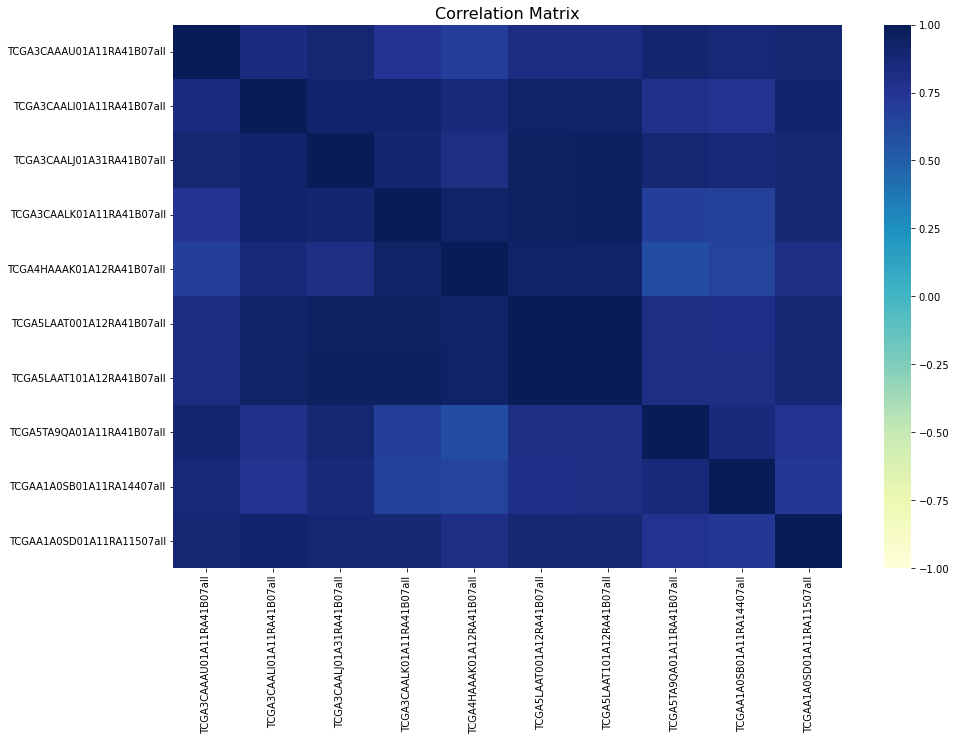

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
expression_cols = [name for name in df.columns if name.endswith("all")]
corr = df_reduced[expression_cols[:10]].corr()  #[::10]]
d = sns.heatmap(corr, ax=ax,vmin=-1,vmax=1, cmap="YlGnBu")
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
#Any ways to create correlation matrix using the following two libraries?

    #Numpy Library
    #Pandas Library

# Find 2 least correlated samples

<AxesSubplot:xlabel='TCGAE9A54Y01A11RA46607all', ylabel='TCGABHA1EX01A11RA13Q07all'>

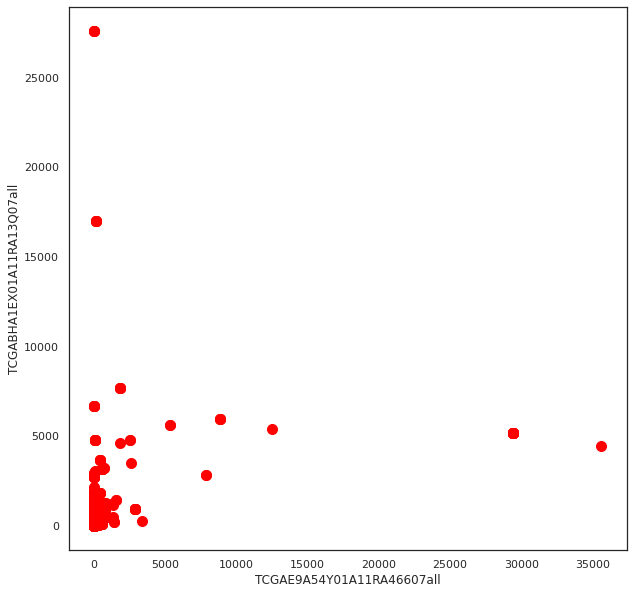

In [83]:
np.where(corr ==  corr.values.min())
corr.index[64]
#plt.figure(figsize=(10,5))
plt.rcParams["figure.figsize"] = (10, 10)
df_reduced = df.head(5000)
df_reduced.plot.scatter(x=corr.columns[95],y=corr.index[64], s = 100, c = 'red')

In [135]:
np.where(corr ==  corr.values.max())

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
      

In [140]:
np.where((corr < 1.0) &  (corr > 0.9))

(array([  0,   0,   0, ..., 110, 110, 110]),
 array([  4,   5,  16, ..., 106, 107, 108]))

In [165]:
corr.shape

(111, 111)

# Find 2 most correlated samples

TCGABHA18I01A11RA12D07all TCGAA2A0YD01A11RA10907all 0.9825512178556894


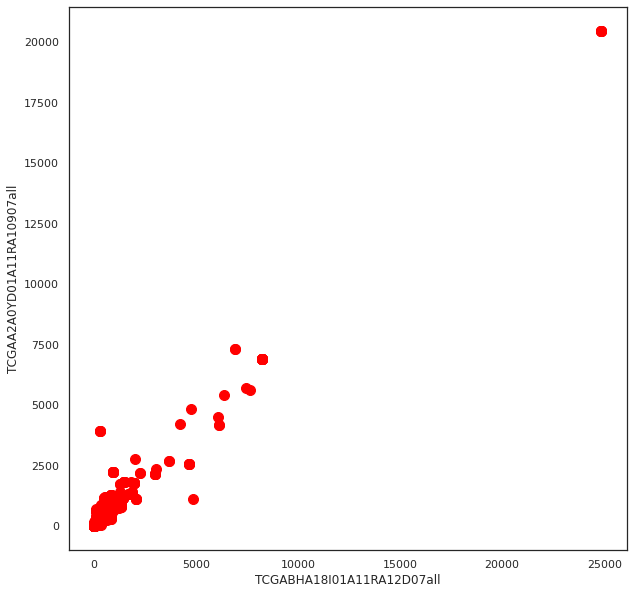

In [84]:
idxs = np.where((corr < 1.0) & (corr > 0.9))
max_non_diag = corr.values[idxs].argmax()
idxs =  np.stack(idxs,axis=1)
idx1, idx2 = idxs[max_non_diag]
print(corr.columns[idx2], corr.index[idx1] , corr.values[idx1,idx2])
plt.rcParams["figure.figsize"] = (10, 10)
df_reduced = df.head(5000)
df_reduced.plot.scatter(x=corr.columns[idx2],y=corr.index[idx1], s = 100, c = 'red')
plt.show()

# Find n most correlated samples

TCGAA2A0CT01A31RA05607all TCGA3CAAAU01A11RA41B07all 0.9087549772410828


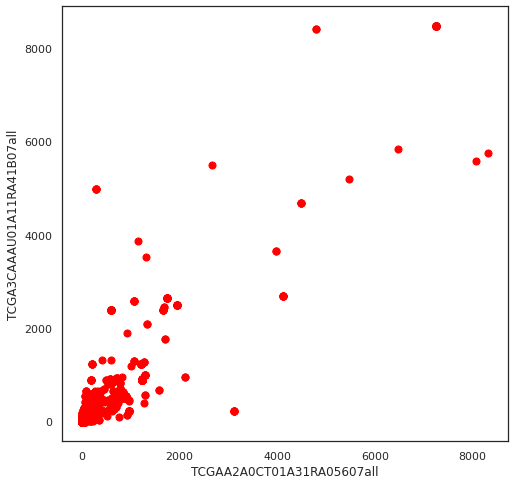

TCGAA2A0D301A11RA11507all TCGA3CAAAU01A11RA41B07all 0.9162902518092154


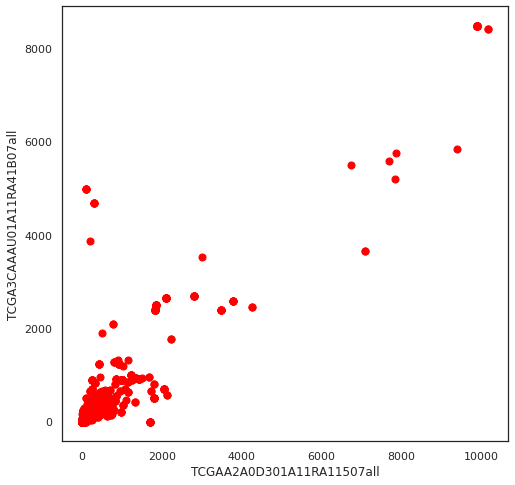

TCGAA7A3RF01A11RA22K07all TCGA3CAAAU01A11RA41B07all 0.9259657777097089


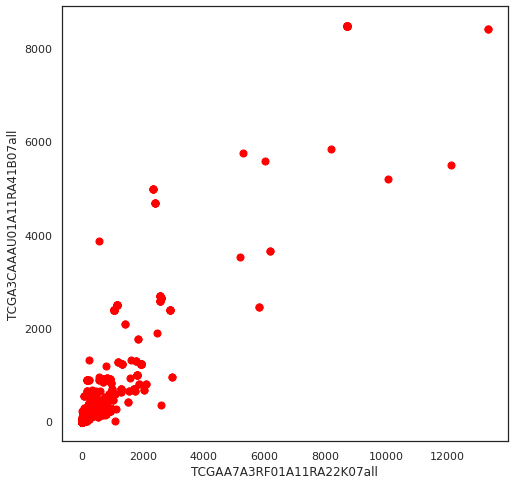

TCGAACA6NO01A12RA33J07all TCGA3CAAAU01A11RA41B07all 0.9063701738500899


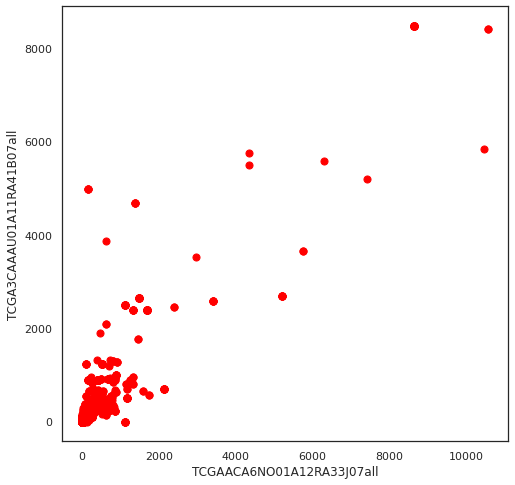

TCGAAOA12B01A11RA10J07all TCGA3CAAAU01A11RA41B07all 0.9084284065910749


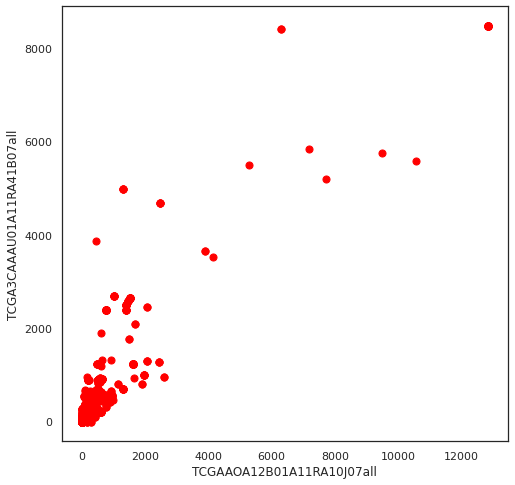

TCGAARA1AK01A21RA12P07all TCGA3CAAAU01A11RA41B07all 0.9231401824773949


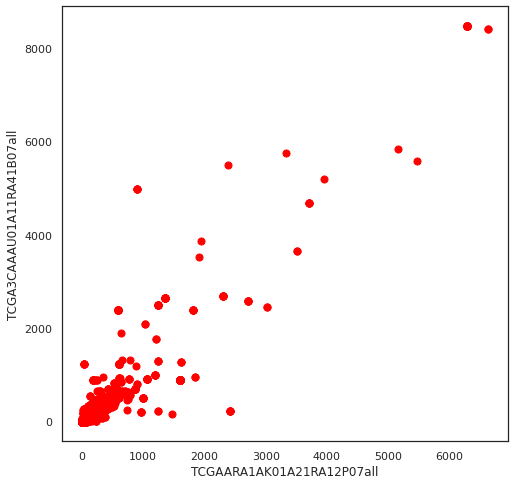

TCGAARA1AU01A11RA12P07all TCGA3CAAAU01A11RA41B07all 0.9178689611999491


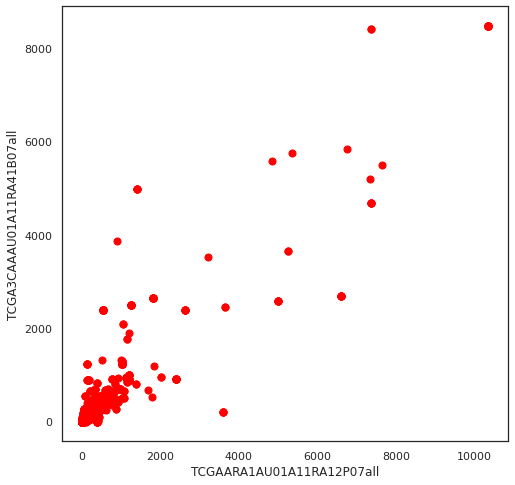

TCGAB6A0RE01A11RA05607all TCGA3CAAAU01A11RA41B07all 0.9062413858462344


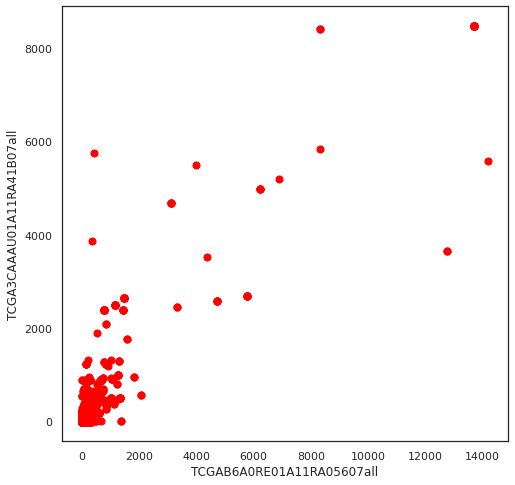

TCGAB6A0RS01A11RA08407all TCGA3CAAAU01A11RA41B07all 0.9032951875917895


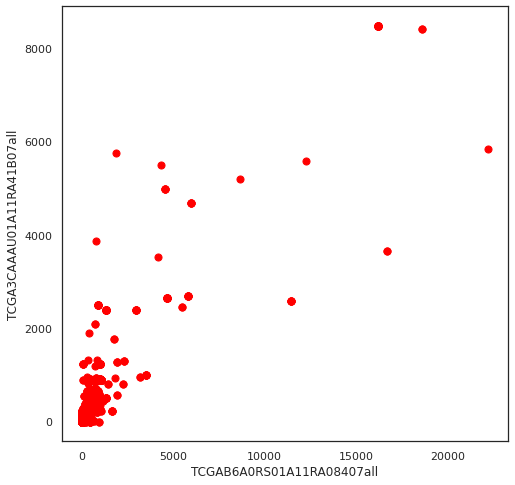

TCGAC8A12X01A11RA11507all TCGA3CAAAU01A11RA41B07all 0.9268196810822037


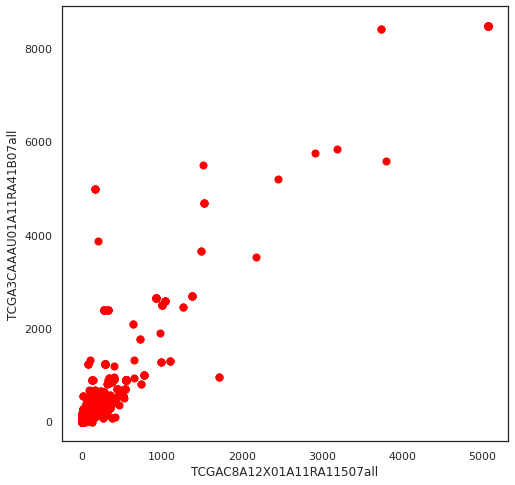

In [147]:
idxs = np.where((corr < 1.0) &  (corr > 0.9))
idxs =  np.stack(idxs,axis=1)

for idx1, idx2 in idxs[:10]:
    print(corr.columns[idx2], corr.index[idx1] , corr.values[idx1,idx2])
    #plt.figure(figsize=(10,5))
    plt.rcParams["figure.figsize"] = (8, 8)
    df_reduced = df.head(5000)
    df_reduced.plot.scatter(x=corr.columns[idx2],y=corr.index[idx1], s = 50, c = 'red')
    plt.show()

In [107]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [ ]:
# Make selection of column matchin TCGAXXX using regex

# Compute correlation matrix between theses columns with df_reduced.corr()



# Task 3

In [ ]:
#Continue similar multidimensional plots and choose other columns (include3', include5' etc) 

In [ ]:
#include5' :

#Because immunopepper generate two exon peptides, it does not always include exon_1 or exon_terminal of the peptide
#If include_5’ == 1, then the left side of the peptide is exon 1
#AKFLGRDAKFLGRDAKFLGRDAKFLGRDLGRDAKFLGRDLGRDAKFLGRD 

In [ ]:
#include3' :

#Because immunopepper generate two exon peptides, it does not always include exon_1 or exon_terminal of the peptide
#If include_3’ == 1, then the right side of the peptide is exon_terminal
#AKFLGRDAKFLGRDAKFLGRDAKFLGRDLGRDAKFLGRDLGRDAKFLGRD

In [173]:
df["includes_3'"].head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: includes_3', dtype: float64

In [174]:
df["includes_5'"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: includes_5', dtype: float64

In [175]:
df["includes_3'"].unique()

array([ 0.,  1., nan])

In [176]:
df["includes_5'"].unique()

array([ 0., nan,  1.])

In [23]:
df.loc[df["includes_3'"] == 1.0].shape 

(220577, 1126)

In [3]:
df.loc[df['origin'] == '3exons_9mer'].shape 

(206026, 1126)

In [4]:
df.loc[df['origin'] == '2exons'].shape 

(94203, 1126)

In [5]:
df.loc[df['origin'] == '3exons_9mer/2exons'].shape 

(405, 1126)

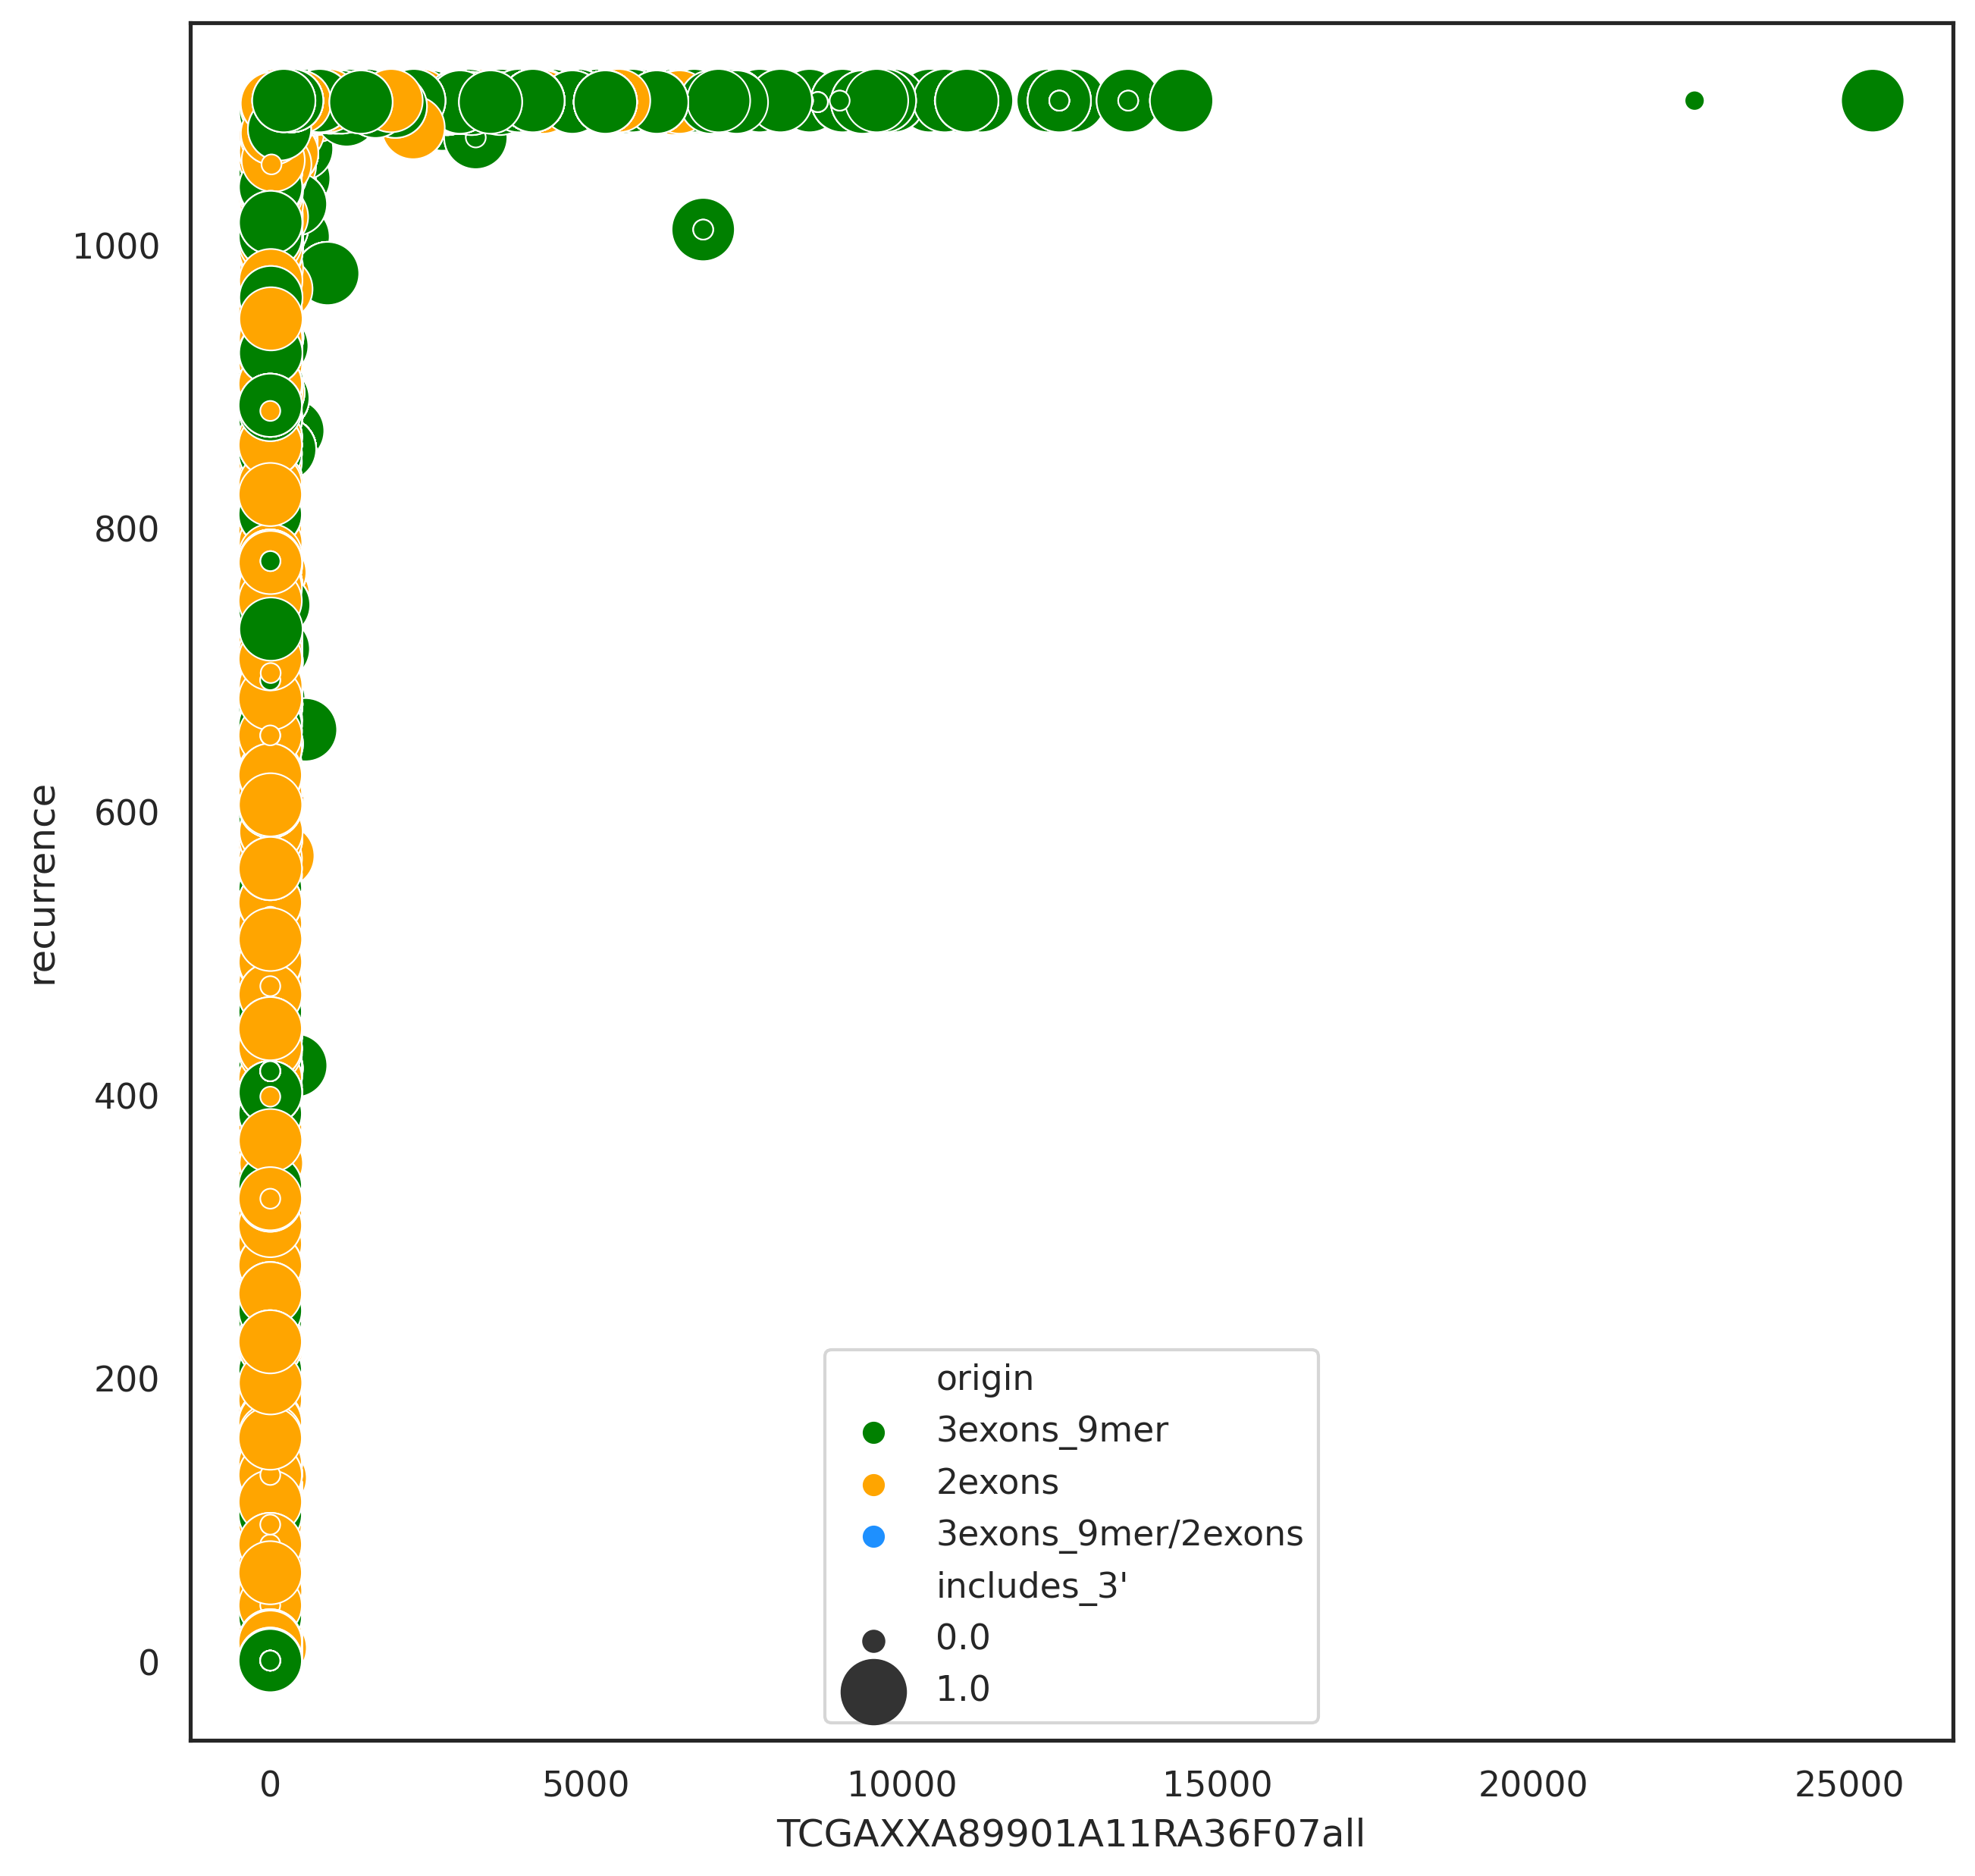

In [15]:
sns.set(rc = {'figure.figsize':(10,10), 'figure.dpi':300})
sns.set_style("white")
ax = sns.scatterplot(data = df, 
               x = 'TCGAXXA89901A11RA36F07all', #junctionAnnotated_kmer
               y = 'recurrence', size="includes_3'", 
               hue = 'origin', marker='o', palette=['green','orange','dodgerblue'], sizes=(40, 400))
sns.move_legend(ax, "lower center")

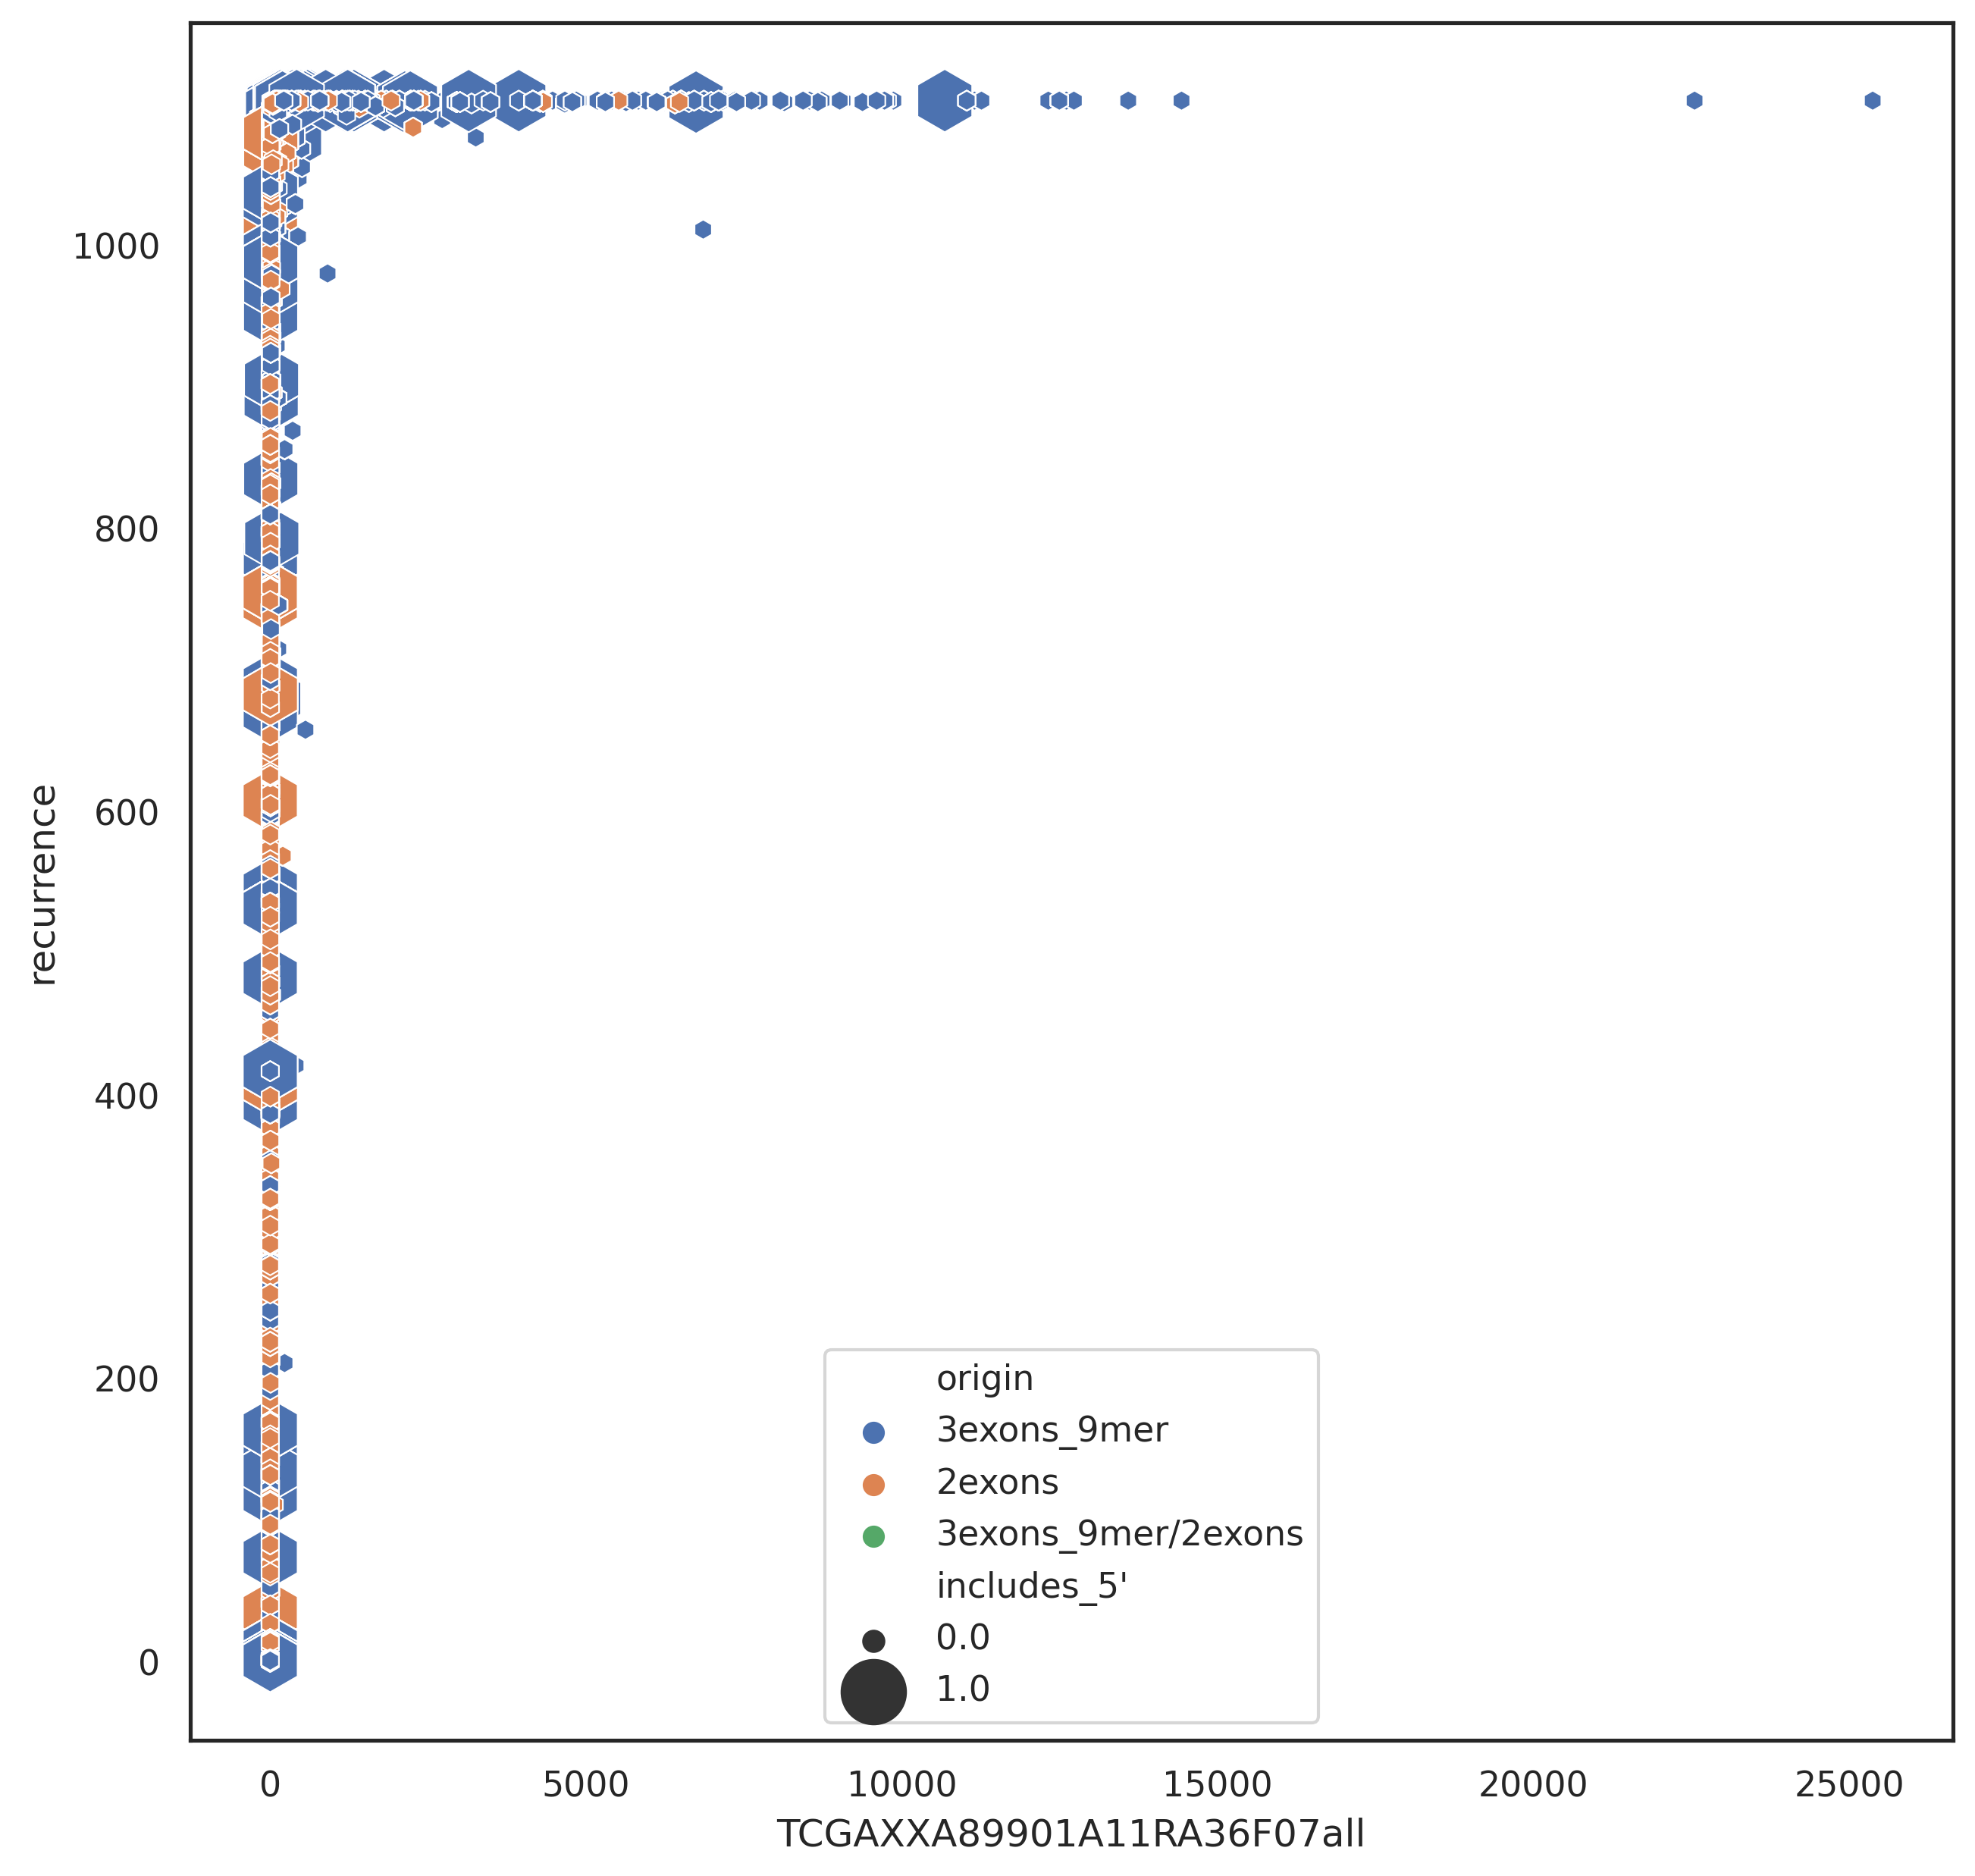

In [16]:
sns.set(rc = {'figure.figsize':(10,10), 'figure.dpi':300})
sns.set_style("white")
ax = sns.scatterplot(data = df, 
               x = 'TCGAXXA89901A11RA36F07all', #junctionAnnotated_kmer
               y = 'recurrence', size="includes_5'", 
               hue = 'origin', marker='h', sizes=(40, 400)) 
sns.move_legend(ax, "lower center")

In [ ]:
#Another way of visualizing multivariate data for multiple attributes together is to use parallel coordinates.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [35]:
import sklearn.preprocessing as sl

In [40]:
scaled_df

recurrence  TCGAXXA89901A11RA36F07all    jx_pos
0         0.950870                  -0.201483  0.668768
1         0.950870                  -0.201483  0.699325
2         1.199443                  -0.020770 -0.675719
3         0.954694                  -0.206302 -0.675719
4         0.954694                  -0.206302 -0.675719
...            ...                        ...       ...
913530         NaN                        NaN       NaN
913531         NaN                        NaN       NaN
913532         NaN                        NaN       NaN
913533         NaN                        NaN       NaN
913534         NaN                        NaN       NaN

[913535 rows x 3 columns]

In [3]:
df["origin"].head()

0    3exons_9mer
1    3exons_9mer
2         2exons
3         2exons
4         2exons
Name: origin, dtype: object

In [ ]:
p

In [ ]:
'''
While this is a good way to visualize categorical data, as you can see, 
leveraging matplotlib has resulted in writing a lot of code. Another good way is to use stacked bars or multiple 
bars for the different attributes in a single plot. We can leverage seaborn for the same easily.
'''

# Multi-bar Plot

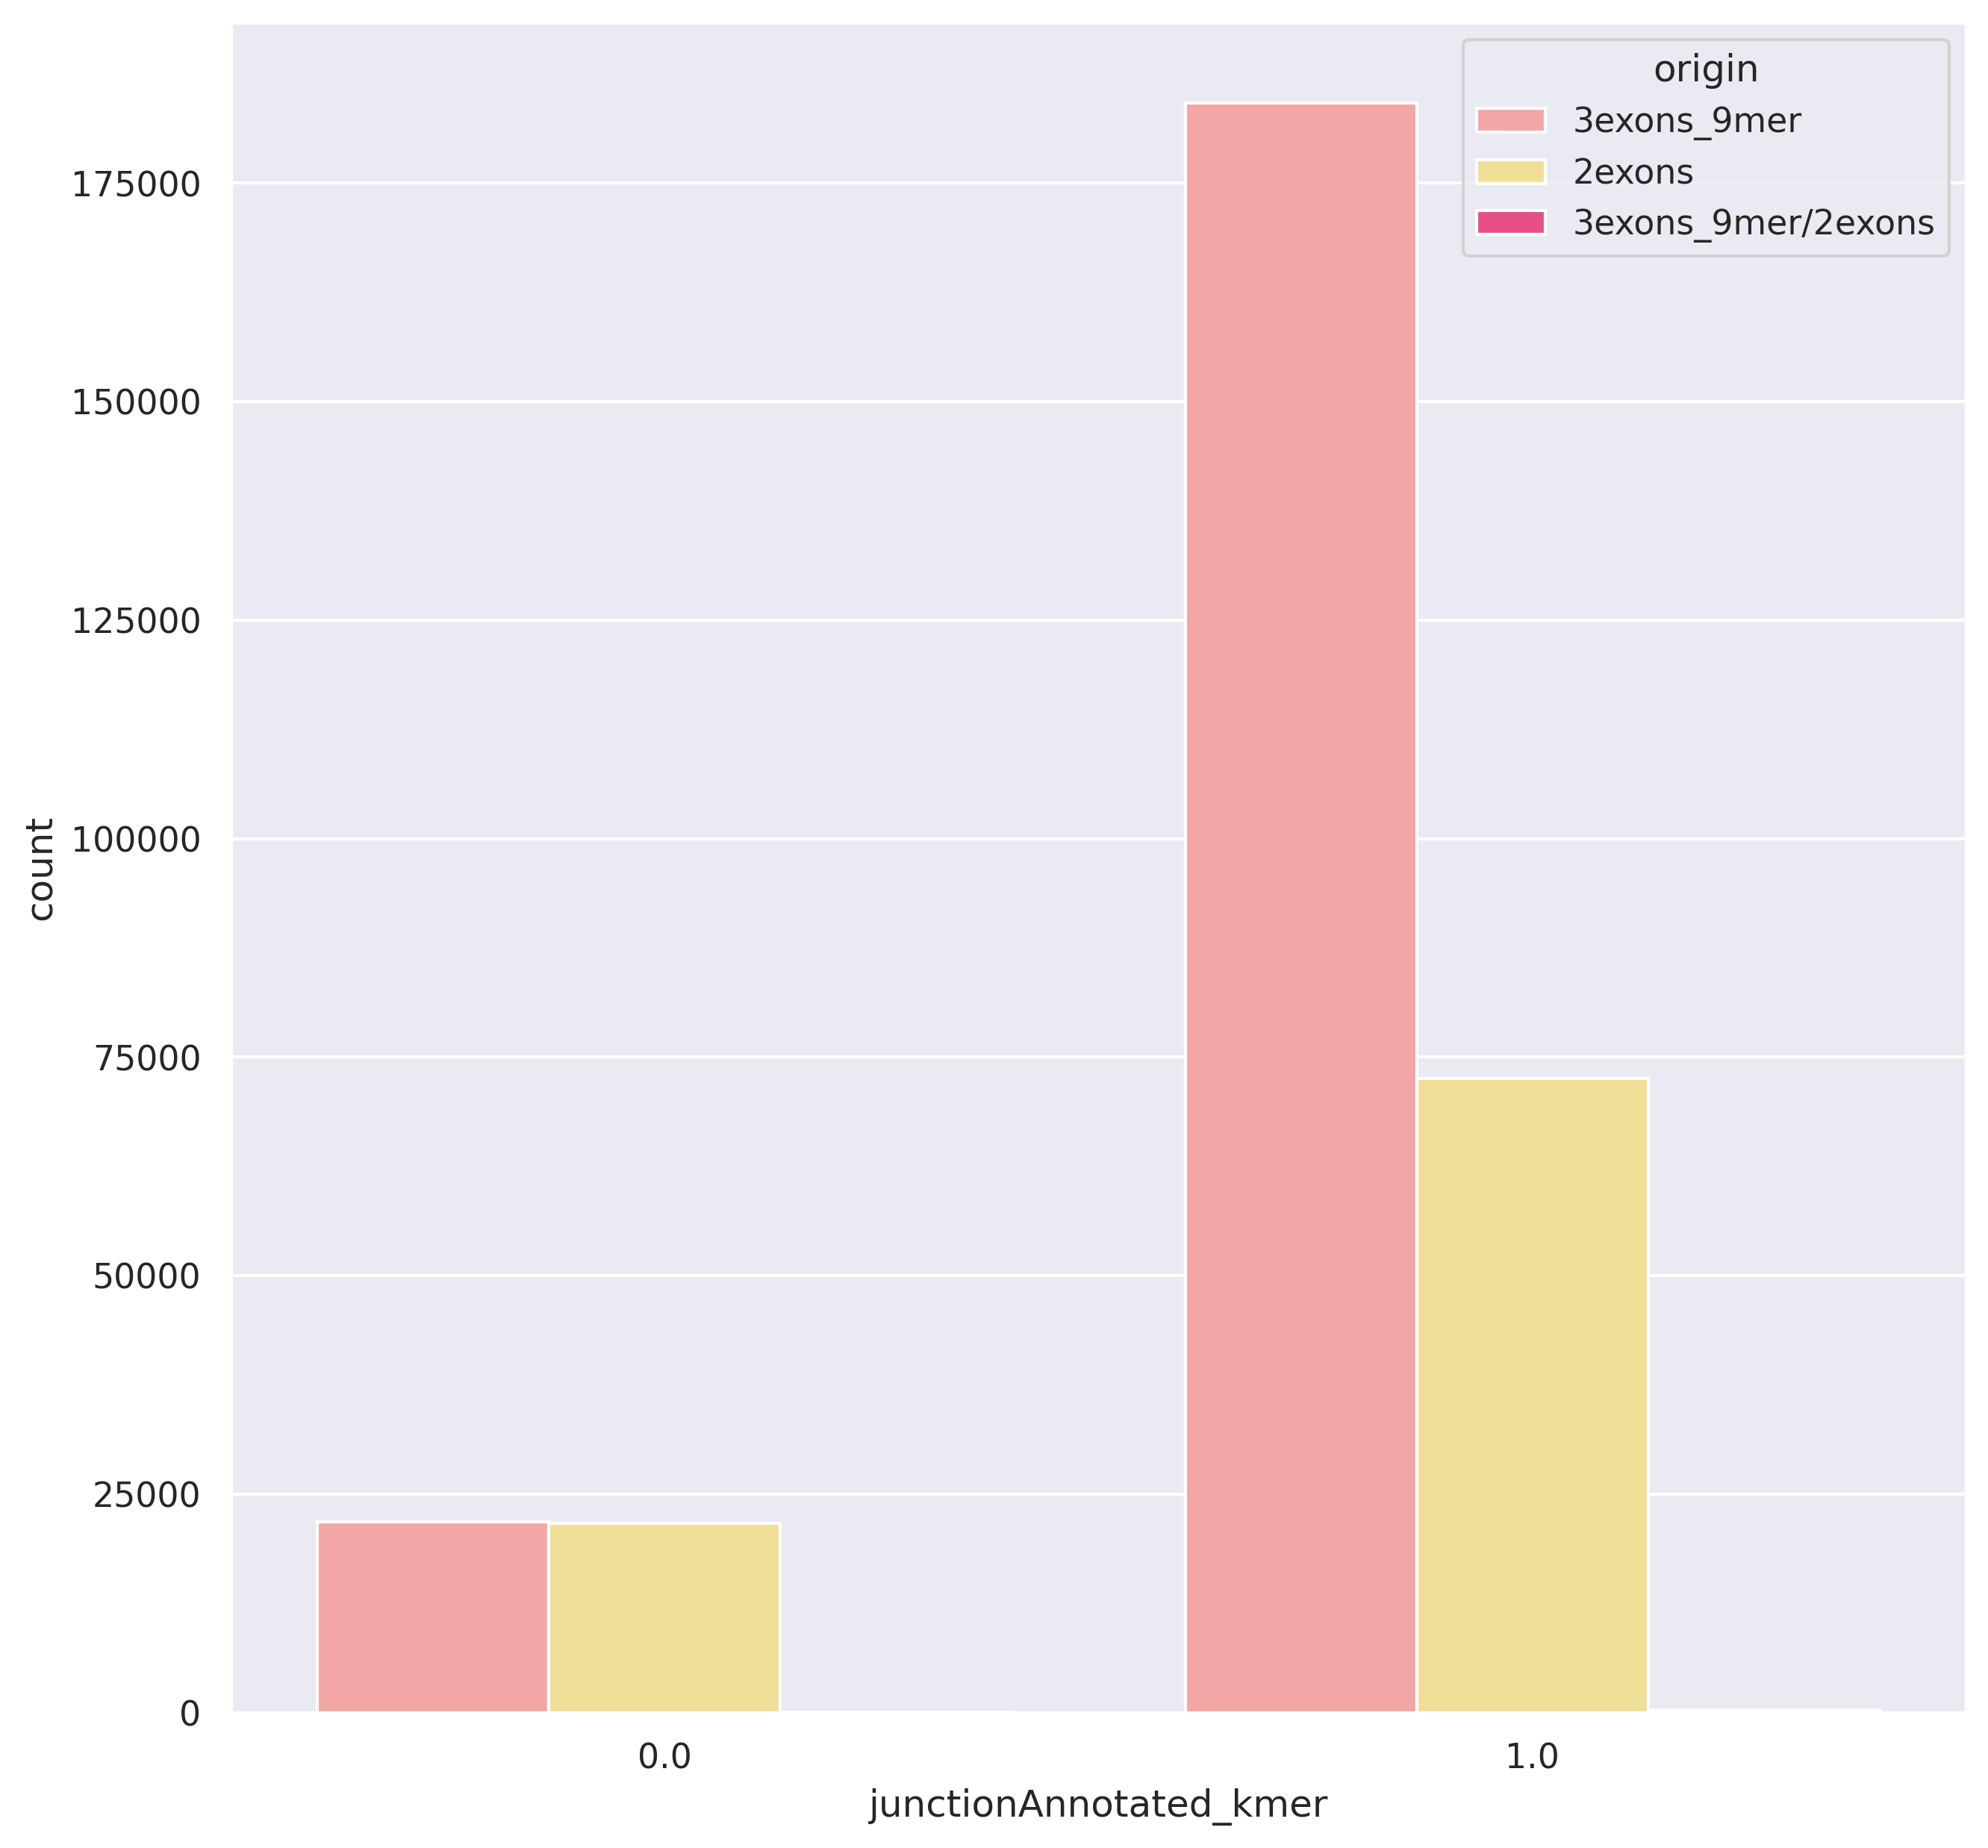

In [10]:
# Multi-bar Plot
#Visualizing two-dimensional discrete, categorical data in a single bar chart
cp = sns.countplot(x="junctionAnnotated_kmer", hue="origin", data=df, 
                   palette={"3exons_9mer": "#FF9999", "2exons": "#FFE888", "3exons_9mer/2exons": "#FE3881"})

In [ ]:
#405 / 206000 * 100  = 0.19 % of the large light pink bar.Assuming the plot is 10 cm. 
#You should see a bar or 10*0.019 = 0.19 cm.

# Stacked bar plot

In [ ]:
'''
The stacked bar chart (aka stacked bar graph) extends the standard bar chart from looking at numeric values across 
one categorical variable to two. Each bar in a standard bar chart is divided into a number of sub-bars stacked end 
to end, each one corresponding to a level of the second categorical variable.


When you should use a stacked bar chart?

The main objective of a standard bar chart is to compare numeric values between levels of a categorical variable. 
One bar is plotted for each level of the categorical variable, each bar’s length indicating numeric value. 
A stacked bar chart also achieves this objective, but also targets a second goal.

We want to move to a stacked bar chart when we care about the relative decomposition of each primary bar based on 
the levels of a second categorical variable. Each bar is now comprised of a number of sub-bars, each one 
corresponding with a level of a secondary categorical variable. The total length of each stacked bar is the same 
as before, but now we can see how the secondary groups contributed to that total.
'''

In [25]:
df.loc[(df['origin'] == '3exons_9mer') & (df['junctionAnnotated_kmer']== 0)].shape[0] 

21815

In [26]:
df.loc[(df['origin'] == '3exons_9mer') & (df['junctionAnnotated_kmer']== 1)].shape[0] 

184211

In [27]:
df.loc[(df['origin'] == '2exons') & (df['junctionAnnotated_kmer']== 1)].shape[0] 

72530

In [28]:
df.loc[(df['origin'] == '2exons') & (df['junctionAnnotated_kmer']== 0)].shape[0] 

21673

In [29]:
df.loc[(df['origin'] == '3exons_9mer/2exons') & (df['junctionAnnotated_kmer']== 0)].shape[0] 

45

In [30]:
df.loc[(df['origin'] == '3exons_9mer/2exons') & (df['junctionAnnotated_kmer']== 1)].shape[0] 

360

In [33]:
print(x)

[ 0.  1. nan]


In [37]:
print(y1)

[21815, 184211]


In [38]:
print(y2)

[21673, 72530]


In [40]:
print(y3)

[45, 360]


In [41]:
print(y1+y2)

[21815, 184211, 21673, 72530]


In [ ]:
# Classical for loop (double)

In [127]:
result_all = []
for origin in df['origin'].dropna().unique():
    result_intermediate = []
    for junction in df['junctionAnnotated_kmer'].dropna().unique():
        y = df.loc[(df['origin'] == origin) & (df['junctionAnnotated_kmer'] == junction)].shape[0]
        result_intermediate.append(y)
    result_all.append(np.array(result_intermediate))
print(result_all)        

[array([ 21815, 184211]), array([21673, 72530]), array([ 45, 360])]


In [128]:
y1, y2, y3 = result_all[0], result_all[1], result_all[2]
x = df['junctionAnnotated_kmer'].dropna().unique()

In [129]:
y1 = result_all[0]
y2 = result_all[1]
y3 = result_all[2]

In [64]:
# list comprehension with a for loop (more advanced) (simple)

In [130]:
[ df.loc[(df['origin'] == origin) & (df['junctionAnnotated_kmer'] == junction)].shape[0] for junction in df['junctionAnnotated_kmer'].dropna().unique()]

[45, 360]

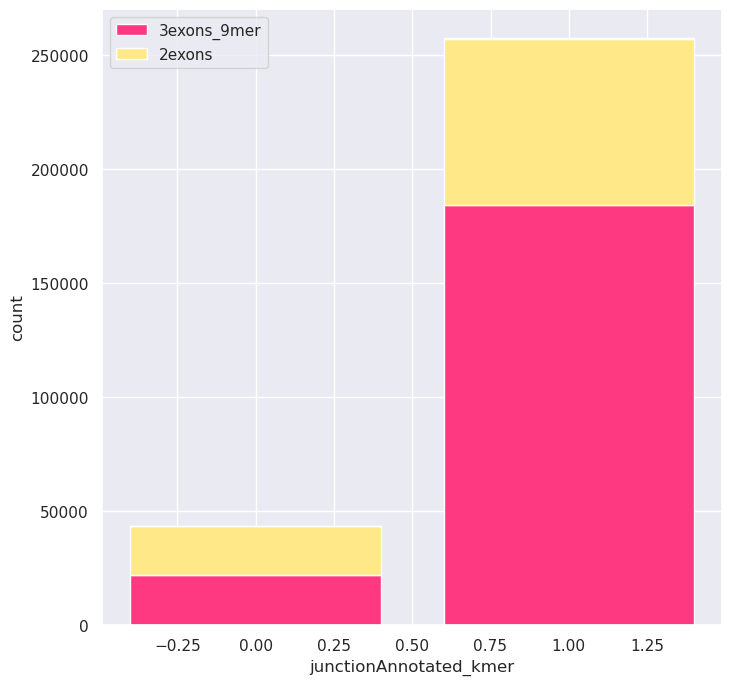

In [131]:
# plot bars in stack manner
sns.set(rc = {'figure.figsize':(8,8), 'figure.dpi':100})
plt.bar(x, y1, color='#FE3881')
plt.bar(x, y2, bottom=y1, color='#FFE888')
plt.bar(x, y3, bottom=y1+y2, color='#FF9999')
plt.ylabel('count')
plt.xlabel('junctionAnnotated_kmer')
plt.legend(["3exons_9mer", "2exons"], loc ="upper left")
plt.show()

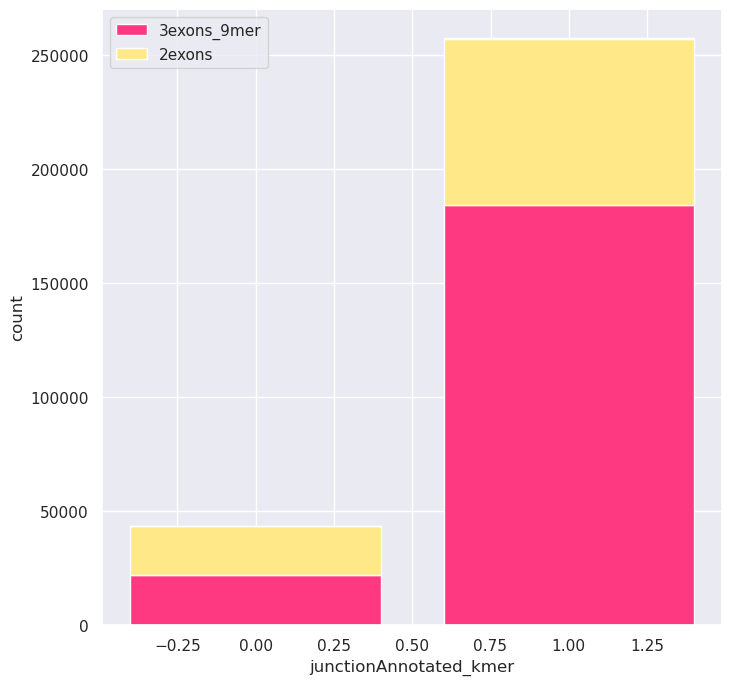

In [126]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
 
# create data
sns.set(rc = {'figure.figsize':(8,8), 'figure.dpi':100})
x = df['junctionAnnotated_kmer'].dropna().unique()
y1 = np.array([df.loc[(df['origin'] == '3exons_9mer') & (df['junctionAnnotated_kmer']== 0)].shape[0], df.loc[(df['origin'] == '3exons_9mer') & (df['junctionAnnotated_kmer']== 1)].shape[0]])
y2 = np.array([df.loc[(df['origin'] == '2exons') & (df['junctionAnnotated_kmer']== 0)].shape[0], df.loc[(df['origin'] == '2exons') & (df['junctionAnnotated_kmer']== 1)].shape[0]])
y3 = np.array([df.loc[(df['origin'] == '3exons_9mer/2exons') & (df['junctionAnnotated_kmer']== 0)].shape[0],df.loc[(df['origin'] == '3exons_9mer/2exons') & (df['junctionAnnotated_kmer']== 1)].shape[0]])

 
# plot bars in stack manner
plt.bar(x, y1, color='#FE3881')
plt.bar(x, y2, bottom=y1, color='#FFE888')
plt.bar(x, y3, bottom=y1+y2, color='#FF9999')
plt.ylabel('count')
plt.xlabel('junctionAnnotated_kmer')
plt.legend(["3exons_9mer", "2exons"], loc ="upper left")
plt.show()

# Parallel coordinates plot

In [ ]:
#Another way of visualizing multivariate data for multiple attributes together is to use parallel coordinates.

In [3]:
df['origin'].size

913535

In [4]:
nan_value = df.loc[0:20000, cols1]['origin'].unique()[2]

NameError: name 'cols1' is not defined

In [47]:
df.loc[0:20000, cols1]['origin'].dropna().unique()

array(['3exons_9mer', '2exons', '3exons_9mer/2exons'], dtype=object)

In [49]:
df.loc[0:20000, cols1].dropna()['origin'].unique()

array(['3exons_9mer', '2exons', '3exons_9mer/2exons'], dtype=object)

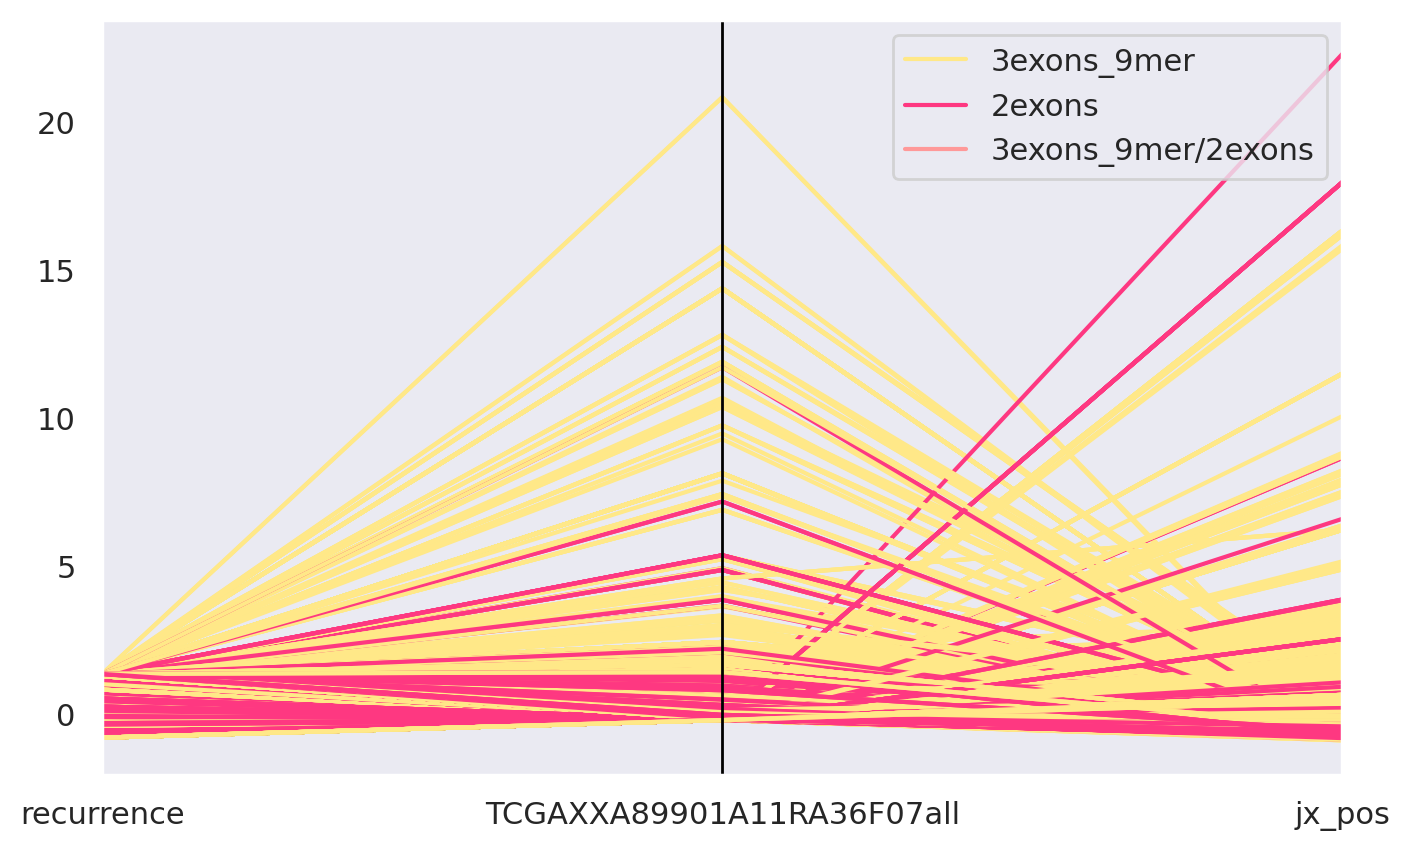

In [8]:
# Scaling attribute values to avoid few outiers
cols1 = ['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos', 'origin']
cols2 = ['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos']

subset_df = df.loc[0:20000, cols1].dropna().reset_index(drop=True) # subset a few rows from  all groups but not nan

from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #min max scaler


#plt.figure(figsize=(8,5))
sns.set(rc = {'figure.figsize':(8,5), 'figure.dpi':200})
df_to_scale = subset_df.loc[:, cols2]
scaled_df = ss.fit_transform(df_to_scale) 
scaled_df = ss.fit_transform(df_to_scale) 
scaled_df = pd.DataFrame(scaled_df, columns=cols2)
scaled_df['origin'] = subset_df['origin']

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(scaled_df, 'origin', color=('#FFE888', '#FE3881', '#FF9999'))


In [1]:
import plotly.express as px

In [7]:
import plotly.express as px
# df.head()

>pepID  jx_pos  between_codons  includes_5'  includes_3'  \
0       2    56.0             1.0          0.0          0.0   
1       2    57.0             1.0          0.0          0.0   
2       4    12.0             0.0          0.0          0.0   
3       5    12.0             0.0          0.0          1.0   
4       6    12.0             0.0          0.0          0.0   

                 gene             jx_coord       kmer readFrameAnnotated  \
0  ENSG00000060339.14    68737048_68742427  AAAALQQHS                0.0   
1  ENSG00000060339.14    68742430_68742487  AAAALQQHS                0.0   
2  ENSG00000119333.11  128640690_128637027  AAADGVLSV                0.0   
3  ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   
4  ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   

  junctionAnnotated  ... TCGAXXA89901A11RA36F07all TCGAXXA89A01A11RA36F07all  \
0               0.0  ...                       6.0                       0.0   
1               0.0  ...                       6.0                       0.0   
2               1.0  ...                     156.0                     164.0   
3               1.0  ...                       2.0                       1.0   
4               1.0  ...                       2.0                       1.0   

  TCGAZ7A8R501A42RA41B07all  TCGAZ7A8R601A11RA41B07all  isCrossJunction  \
0                       0.0                        3.0             True   
1                       0.0                        3.0             True   
2                     112.0                      651.0             True   
3                       0.0                        4.0             True   
4                       0.0                        4.0             True   

  junctionAnnotated_kmer  readFrameAnnotated_kmer  recurrence  \
0                    0.0                      0.0       970.0   
1                    0.0                      0.0       970.0   
2                    1.0                      0.0      1100.0   
3                    1.0                      0.0       972.0   
4                    1.0                      0.0       972.0   

   spladder_GTEX_on_disk  strand_spladder  
0                    1.0                +  
1                    NaN              NaN  
2                    1.0                -  
3                    1.0                -  
4                    1.0                -  

[5 rows x 1126 columns]

In [138]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2, width=1000, height=700)
fig.show()



In [6]:
import plotly.express as px
df3 = px.data.iris()
df3["species_id"]
# fig = px.parallel_coordinates(df3, color="species_id", labels={"species_id": "Species",
#                 "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
#                 "petal_width": "Petal Width", "petal_length": "Petal Length", },
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

# len(px.data.iris())

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species_id, Length: 150, dtype: int64

In [17]:
# df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/exp_427_kmers_plot2_fix-sample_filtered-spladder.csv.gz', compression = 'gzip', low_memory=False )

In [145]:
df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/exp_427_kmers_plot2_fix-sample_filtered-spladder.csv.gz', compression = 'gzip', low_memory=False, nrows=20000)

In [125]:
df = df[['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos', 'origin']]#.head(10)
# df['origin'] = df['origin'].astype("category")
# df['origin2'] = df['origin'].cat.codes

# cats = df['origin'].cat.categories.values




In [147]:
codes, cats_desc = df["origin"].factorize()
df["origin2"] = codes
cat_names = cats_desc.values
cat_indices = np.arange(len(cat_names))
cat_names
cat_indices

array([0, 1, 2])

In [113]:
df

recurrence  TCGAXXA89901A11RA36F07all  jx_pos       origin  origin2
0           970.0                        6.0    56.0  3exons_9mer        0
1           970.0                        6.0    57.0  3exons_9mer        0
2          1100.0                      156.0    12.0       2exons        1
3           972.0                        2.0    12.0       2exons        1
4           972.0                        2.0    12.0       2exons        1
...           ...                        ...     ...          ...      ...
19995      1101.0                      949.0    20.0  3exons_9mer        0
19996      1101.0                      949.0    20.0  3exons_9mer        0
19997      1100.0                       96.0    19.0       2exons        1
19998         1.0                        0.0    53.0  3exons_9mer        0
19999         1.0                        0.0    59.0  3exons_9mer        0

[20000 rows x 5 columns]

In [85]:
cats
df['origin2']
cats
df['origin2'].values

array([1, 1, 0, ..., 0, 1, 1], dtype=int8)

In [40]:
# df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/exp_427_kmers_plot2_fix-sample_filtered-spladder.csv.gz', compression = 'gzip', low_memory=False, nrows=200)

In [88]:
fig = px.parallel_coordinates(df, 
                              color="origin2",
                              dimensions=['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos'],
                              labels={'recurrence': 'recurrence', 'TCGAXXA89901A11RA36F07all': 'expression', 'jx_pos': 'jx_pos'},

                             )
fig.update_coloraxes(colorbar_ticktext=cats, colorbar_tickvals=np.linspace(0, 1, len(cats)), colorbar_tickmode="array")
fig.show()

In [54]:
#cols1 = ['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos', 'origin']
#cols2 = ['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos']

#subset_df = df.loc[0:20000, cols1].dropna().reset_index(drop=True) # subset a few rows from  all groups but not nan

# from plotly.express.colors import sample_colorscale
# from sklearn.preprocessing import minmax_scale

# colors_ = [1,5,6] 
# discrete_colors = sample_colorscale('Bluered', minmax_scale(colors_))

# df2 = df.head(20)
fig = px.parallel_coordinates(df, 
                              color="origin2",
                              dimensions=['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos'],
                              labels={'recurrence': 'recurrence', 'TCGAXXA89901A11RA36F07all': 'expression', 'jx_pos': 'jx_pos'},
#                               color_continuous_scale=discrete_colors#["orange", "red","green"]
#                               color_continuous_scale=px.colors.diverging.Tealrose,
#                               color_continuous_midpoint=2
                             )
# fig.update_coloraxes(colorbar_ticktext=cats, colorbar_tickvals=np.linspace(0, 1, len(cats)), colorbar_tickmode="array")
fig.update_coloraxes(colorbar_ticktext=cats, colorbar_tickvals=[-1, 0], colorbar_tickmode="array")
fig.show()


# Constructing a Discrete or Discontinuous Color Scale

In [135]:
#dir(df["origin"].cat)
#df["origin"].cat.categories
#df["origin"].cat.se

In [131]:
df.loc[(df['origin'] == '3exons_9mer')].shape[0] 

10969

In [132]:
df.loc[(df['origin'] == '2exons')].shape[0] 

4288

In [133]:
df.loc[(df['origin'] == '3exons_9mer/2exons')].shape[0] 

22

In [ ]:
# color_continuous_scale=[(0.00, "red"),   (0.33, "red"),
#                                                      (0.33, "green"), (0.66, "green"),
#                                                      (0.66, "blue"),  (1.00, "blue")]

In [154]:
import plotly.express as px

fig = px.parallel_coordinates(df,
                              color="origin2",
                              dimensions=['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos'],
                              labels={'recurrence': 'recurrence', 'TCGAXXA89901A11RA36F07all': 'expression', 'jx_pos': 'jx_pos'},
                             color_continuous_scale=[(0, "yellow"), (0.33, "yellow"), 
                                                     (0.33, "orange"), (0.66, "orange"), 
                                                      (0.66, "purple"), (1, "purple")],width=990, height=700
#                                                      ("3exons_9mer", "green"), ("3exons_9mer", "green"),
#                                                      ("2exons", "blue"),  ("2exons", "blue")]
                            )
fig.update_coloraxes(colorbar_ticktext=["3exons_9mer/2exons", "2exons", "3exons_9mer"], colorbar_tickvals=cat_indices-0.5, colorbar_tickmode="array")
fig.show()

In [146]:
import plotly.express as px

df3 = df[df["origin"] == "3exons_9mer/2exons"]
print(df3.shape)
fig = px.parallel_coordinates(df,
                              color="origin2",
                              dimensions=['recurrence', 'TCGAXXA89901A11RA36F07all', 'jx_pos'],
                              labels={'recurrence': 'recurrence', 'TCGAXXA89901A11RA36F07all': 'expression', 'jx_pos': 'jx_pos'},
                             color_continuous_scale=[(0, "red"), (0.33, "red"), 
                                                     (0.33, "blue"), (0.66, "blue"), 
                                                      (0.66, "yellow"), (1, "yellow")],
#                                                      ("3exons_9mer", "green"), ("3exons_9mer", "green"),
#                                                      ("2exons", "blue"),  ("2exons", "blue")]
                            )
fig.update_coloraxes(colorbar_ticktext=["3exons_9mer/2exons", "2exons", "3exons_9mer"], colorbar_tickvals=cat_indices-0.5, colorbar_tickmode="array")
fig.show()


(22, 1126)


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['>pepID', 'jx_pos', 'between_codons', "includes_5'", "includes_3'", 'gene', 'jx_coord', 'kmer', 'readFrameAnnotated', 'junctionAnnotated', 'origin', 'peptide', 'sample', 'percentile_rank', 'affinity', 'strand', 'GTEX_presence', 'index', 'TCGA3CAAAU01A11RA41B07all', 'TCGA3CAALI01A11RA41B07all', 'TCGA3CAALJ01A31RA41B07all', 'TCGA3CAALK01A11RA41B07all', 'TCGA4HAAAK01A12RA41B07all', 'TCGA5LAAT001A12RA41B07all', 'TCGA5LAAT101A12RA41B07all', 'TCGA5TA9QA01A11RA41B07all', 'TCGAA1A0SB01A11RA14407all', 'TCGAA1A0SD01A11RA11507all', 'TCGAA1A0SE01A11RA08407all', 'TCGAA1A0SF01A11RA14407all', 'TCGAA1A0SG01A11RA14407all', 'TCGAA1A0SH01A11RA08407all', 'TCGAA1A0SI01A11RA14407all', 'TCGAA1A0SJ01A11RA08407all', 'TCGAA1A0SK01A12RA08407all', 'TCGAA1A0SM01A11RA08407all', 'TCGAA1A0SN01A11RA14407all', 'TCGAA1A0SO01A22RA08407all', 'TCGAA1A0SP01A11RA08407all', 'TCGAA1A0SQ01A21RA14407all', 'TCGAA2A04N01A11RA11507all', 'TCGAA2A04P01A31RA03407all', 'TCGAA2A04Q01A21RA03407all', 'TCGAA2A04R01A41RA10907all', 'TCGAA2A04T01A21RA03407all', 'TCGAA2A04U01A11RA11507all', 'TCGAA2A04V01A21RA03407all', 'TCGAA2A04W01A31RA11507all', 'TCGAA2A04X01A21RA03407all', 'TCGAA2A04Y01A21RA03407all', 'TCGAA2A0CK01A11RA22K07all', 'TCGAA2A0CL01A11RA11507all', 'TCGAA2A0CM01A31RA03407all', 'TCGAA2A0CO01A13RA22K07all', 'TCGAA2A0CP01A11RA03407all', 'TCGAA2A0CQ01A21RA03407all', 'TCGAA2A0CR01A11RA22K07all', 'TCGAA2A0CS01A11RA11507all', 'TCGAA2A0CT01A31RA05607all', 'TCGAA2A0CU01A12RA03407all', 'TCGAA2A0CV01A31RA11507all', 'TCGAA2A0CW01A21RA11507all', 'TCGAA2A0CX01A21RA00Z07all', 'TCGAA2A0CY01A12RA03407all', 'TCGAA2A0CZ01A11RA03407all', 'TCGAA2A0D001A11RA00Z07all', 'TCGAA2A0D101A11RA03407all', 'TCGAA2A0D201A21RA03407all', 'TCGAA2A0D301A11RA11507all', 'TCGAA2A0D401A11RA00Z07all', 'TCGAA2A0EM01A11RA03407all', 'TCGAA2A0EN01A13RA08407all', 'TCGAA2A0EO01A11RA03407all', 'TCGAA2A0EP01A52RA22U07all', 'TCGAA2A0EQ01A11RA03407all', 'TCGAA2A0ER01A21RA03407all', 'TCGAA2A0ES01A11RA11507all', 'TCGAA2A0ET01A31RA03407all', 'TCGAA2A0EU01A22RA05607all', 'TCGAA2A0EV01A11RA03407all', 'TCGAA2A0EW01A21RA11507all', 'TCGAA2A0EX01A21RA03407all', 'TCGAA2A0EY01A11RA03407all', 'TCGAA2A0ST01A12RA08407all', 'TCGAA2A0SU01A11RA08407all', 'TCGAA2A0SV01A11RA08407all', 'TCGAA2A0SW01A11RA08407all', 'TCGAA2A0SX01A12RA08407all', 'TCGAA2A0SY01A31RA08407all', 'TCGAA2A0T001A22RA08407all', 'TCGAA2A0T101A21RA08407all', 'TCGAA2A0T201A11RA08407all', 'TCGAA2A0T301A21RA11507all', 'TCGAA2A0T401A31RA08407all', 'TCGAA2A0T501A21RA08407all', 'TCGAA2A0T601A11RA08407all', 'TCGAA2A0T701A21RA08407all', 'TCGAA2A0YC01A11RA10907all', 'TCGAA2A0YD01A11RA10907all', 'TCGAA2A0YE01A11RA10907all', 'TCGAA2A0YF01A21RA10907all', 'TCGAA2A0YG01A21RA10907all', 'TCGAA2A0YH01A11RA10907all', 'TCGAA2A0YI01A31RA10J07all', 'TCGAA2A0YJ01A11RA10907all', 'TCGAA2A0YK01A22RA10907all', 'TCGAA2A0YL01A21RA10907all', 'TCGAA2A0YM01A11RA10907all', 'TCGAA2A0YT01A11RA10907all', 'TCGAA2A1FV01A11RA13Q07all', 'TCGAA2A1FW01A11RA13Q07all', 'TCGAA2A1FX01A11RA13Q07all', 'TCGAA2A1FZ01A51RA14D07all', 'TCGAA2A1G001A11RA13Q07all', 'TCGAA2A1G101A21RA13Q07all', 'TCGAA2A1G401A11RA13Q07all', 'TCGAA2A1G601A11RA13Q07all', 'TCGAA2A25901A11RA16F07all', 'TCGAA2A25A01A12RA16F07all', 'TCGAA2A25B01A11RA16907all', 'TCGAA2A25C01A11RA16907all', 'TCGAA2A25D01A12RA16F07all', 'TCGAA2A25E01A11RA16907all', 'TCGAA2A25F01A11RA16907all', 'TCGAA2A3KC01A11RA21307all', 'TCGAA2A3KD01A12RA21307all', 'TCGAA2A3XS01A11RA22U07all', 'TCGAA2A3XT01A11RA22U07all', 'TCGAA2A3XU01A12RA22U07all', 'TCGAA2A3XV01A21RA23907all', 'TCGAA2A3XW01A11RA23907all', 'TCGAA2A3XX01A21RA23907all', 'TCGAA2A3XY01A11RA23907all', 'TCGAA2A3XZ01A42RA23907all', 'TCGAA2A3Y001A11RA23907all', 'TCGAA2A4RW01A21RA26607all', 'TCGAA2A4RX01A11RA26607all', 'TCGAA2A4RY01A31RA26607all', 'TCGAA2A4S001A21RA26607all', 'TCGAA2A4S101A21RA26607all', 'TCGAA2A4S201A12RA26607all', 'TCGAA2A4S301A21RA26607all', 'TCGAA7A0CD01A11RA00Z07all', 'TCGAA7A0CE01A11RA00Z07all', 'TCGAA7A0CG01A12RA05607all', 'TCGAA7A0CH01A21RA00Z07all', 'TCGAA7A0CJ01A21RA00Z07all', 'TCGAA7A0D901A31RA05607all', 'TCGAA7A0DA01A31RA11507all', 'TCGAA7A0DB01A11RA00Z07all', 'TCGAA7A0DB01A11RA27707all', 'TCGAA7A0DB01C02RA27707all', 'TCGAA7A0DC01A11RA00Z07all', 'TCGAA7A0DC01B04RA22O07all', 'TCGAA7A13D01A13RA12P07all', 'TCGAA7A13D01A13RA27707all', 'TCGAA7A13D01B04RA27707all', 'TCGAA7A13E01A11RA12P07all', 'TCGAA7A13E01A11RA27707all', 'TCGAA7A13E01B06RA27707all', 'TCGAA7A13F01A11RA12P07all', 'TCGAA7A13G01B04RA22O07all', 'TCGAA7A13H01A11RA22K07all', 'TCGAA7A26E01A11RA16907all', 'TCGAA7A26E01A11RA27707all', 'TCGAA7A26E01B06RA27707all', 'TCGAA7A26F01B04RA22O07all', 'TCGAA7A26G01A21RA16907all', 'TCGAA7A26H01A11RA16907all', 'TCGAA7A26I01B06RA22O07all', 'TCGAA7A26J01A11RA16907all', 'TCGAA7A26J01A11RA27707all', 'TCGAA7A26J01B02RA27707all', 'TCGAA7A2KD01A31RA21T07all', 'TCGAA7A3IY01A21RA21T07all', 'TCGAA7A3IZ01A11RA21307all', 'TCGAA7A3J001A11RA21307all', 'TCGAA7A3J101A11RA21307all', 'TCGAA7A3RF01A11RA22K07all', 'TCGAA7A42501A11RA24H07all', 'TCGAA7A42601A22RA24H07all', 'TCGAA7A4SA01A11RA26607all', 'TCGAA7A4SB01A21RA26607all', 'TCGAA7A4SC01A12RA26607all', 'TCGAA7A4SD01A11RA26607all', 'TCGAA7A4SE01A11RA26607all', 'TCGAA7A4SF01A11RA26607all', 'TCGAA7A56D01A11RA27Q07all', 'TCGAA7A5ZV01A11RA28M07all', 'TCGAA7A5ZW01A12RA29R07all', 'TCGAA7A5ZX01A12RA29R07all', 'TCGAA7A6VV01A22RA33J07all', 'TCGAA7A6VW01A21RA33J07all', 'TCGAA7A6VX01A12RA33J07all', 'TCGAA7A6VY01A12RA33J07all', 'TCGAA8A06N01A11RA00Z07all', 'TCGAA8A06O01A11RA00Z07all', 'TCGAA8A06P01A11RA00Z07all', 'TCGAA8A06Q01A11RA03407all', 'TCGAA8A06R01A11RA00Z07all', 'TCGAA8A06T01A11RA00Z07all', 'TCGAA8A06U01A11RA00Z07all', 'TCGAA8A06X01A21RA00Z07all', 'TCGAA8A06Y01A21RA00Z07all', 'TCGAA8A06Z01A11RA00Z07all', 'TCGAA8A07501A11RA08407all', 'TCGAA8A07601A21RA00Z07all', 'TCGAA8A07901A21RA00Z07all', 'TCGAA8A07B01A11RA00Z07all', 'TCGAA8A07C01A11RA03407all', 'TCGAA8A07E01A11RA03407all', 'TCGAA8A07F01A11RA00Z07all', 'TCGAA8A07G01A11RA03407all', 'TCGAA8A07I01A11RA00Z07all', 'TCGAA8A07J01A11RA00Z07all', 'TCGAA8A07L01A11RA00Z07all', 'TCGAA8A07O01A11RA00Z07all', 'TCGAA8A07P01A11RA00Z07all', 'TCGAA8A07R01A21RA03407all', 'TCGAA8A07S01A11RA03407all', 'TCGAA8A07U01A11RA03407all', 'TCGAA8A07W01A11RA00Z07all', 'TCGAA8A07Z01A11RA00Z07all', 'TCGAA8A08101A11RA00Z07all', 'TCGAA8A08201A11RA00Z07all', 'TCGAA8A08301A21RA00Z07all', 'TCGAA8A08401A21RA00Z07all', 'TCGAA8A08501A11RA00Z07all', 'TCGAA8A08601A11RA00Z07all', 'TCGAA8A08A01A11RA32Y07all', 'TCGAA8A08B01A11RA00Z07all', 'TCGAA8A08C01A11RA00Z07all', 'TCGAA8A08F01A11RA00Z07all', 'TCGAA8A08G01A11RA00Z07all', 'TCGAA8A08H01A21RA00Z07all', 'TCGAA8A08I01A11RA00Z07all', 'TCGAA8A08J01A11RA00Z07all', 'TCGAA8A08L01A11RA00Z07all', 'TCGAA8A08O01A21RA05607all', 'TCGAA8A08P01A11RA00Z07all', 'TCGAA8A08R01A11RA03407all', 'TCGAA8A08S01A11RA03407all', 'TCGAA8A08T01A21RA00Z07all', 'TCGAA8A08X01A21RA00Z07all', 'TCGAA8A08Z01A21RA00Z07all', 'TCGAA8A09001A11RA00Z07all', 'TCGAA8A09101A11RA00Z07all', 'TCGAA8A09201A11RA00Z07all', 'TCGAA8A09301A11RA00Z07all', 'TCGAA8A09401A11RA00Z07all', 'TCGAA8A09501A11RA00Z07all', 'TCGAA8A09601A11RA00Z07all', 'TCGAA8A09701A11RA03407all', 'TCGAA8A09901A11RA00Z07all', 'TCGAA8A09A01A11RA00Z07all', 'TCGAA8A09B01A11RA00Z07all', 'TCGAA8A09D01A11RA00Z07all', 'TCGAA8A09E01A11RA00Z07all', 'TCGAA8A09G01A21RA00Z07all', 'TCGAA8A09I01A22RA03407all', 'TCGAA8A09K01A11RA00Z07all', 'TCGAA8A09M01A11RA00Z07all', 'TCGAA8A09N01A11RA00Z07all', 'TCGAA8A09Q01A11RA00Z07all', 'TCGAA8A09R01A11RA00Z07all', 'TCGAA8A09T01A11RA00Z07all', 'TCGAA8A09V01A11RA03407all', 'TCGAA8A09W01A11RA00Z07all', 'TCGAA8A09X01A11RA00Z07all', 'TCGAA8A09Z01A11RA00Z07all', 'TCGAA8A0A101A11RA00Z07all', 'TCGAA8A0A201A11RA03407all', 'TCGAA8A0A401A11RA00Z07all', 'TCGAA8A0A601A12RA05607all', 'TCGAA8A0A701A11RA00Z07all', 'TCGAA8A0A901A11RA00Z07all', 'TCGAA8A0AB01A11RA03407all', 'TCGAA8A0AD01A11RA05607all', 'TCGAACA23C01A12RA16907all', 'TCGAACA23E01A11RA15707all', 'TCGAACA23G01A11RA21307all', 'TCGAACA23H01A11RA15707all', 'TCGAACA2B801A11RA17B07all', 'TCGAACA2BK01A11RA21T07all', 'TCGAACA2BM01A11RA21T07all', 'TCGAACA2FB01A11RA17B07all', 'TCGAACA2FE01A11RA19W07all', 'TCGAACA2FF01A11RA17B07all', 'TCGAACA2FG01A11RA17B07all', 'TCGAACA2FK01A12RA18007all', 'TCGAACA2FM01A11RA19W07all', 'TCGAACA2FO01A11RA18007all', 'TCGAACA2QH01B04RA22O07all', 'TCGAACA2QI01A12RA19W07all', 'TCGAACA2QJ01A12RA19W07all', 'TCGAACA3BB01A21RA19W07all', 'TCGAACA3EH01A22RA22K07all', 'TCGAACA3HN01A11RA21307all', 'TCGAACA3OD01B06RA22O07all', 'TCGAACA3QP01A11RA22U07all', 'TCGAACA3QQ01B06RA22O07all', 'TCGAACA3TM01A11RA22K07all', 'TCGAACA3TN01A11RA22K07all', 'TCGAACA3W501A11RA22K07all', 'TCGAACA3W601A12RA22K07all', 'TCGAACA3W701A11RA22K07all', 'TCGAACA3YI01A21RA23907all', 'TCGAACA3YJ01A11RA22U07all', 'TCGAACA4ZE01A11RA41B07all', 'TCGAACA5EH01A11RA28M07all', 'TCGAACA5XS01A11RA29R07all', 'TCGAACA5XU01A11RA28M07all', 'TCGAACA62V01A11RA31O07all', 'TCGAACA62X01A11RA29R07all', 'TCGAACA62Y01A11RA29R07all', 'TCGAACA6IV01A12RA33J07all', 'TCGAACA6IW01A12RA33J07all', 'TCGAACA6IX01A12RA32P07all', 'TCGAACA6NO01A12RA33J07all', 'TCGAACA7VB01A11RA35207all', 'TCGAACA7VC01A11RA35207all', 'TCGAACA8OP01A11RA36F07all', 'TCGAACA8OQ01A11RA41B07all', 'TCGAACA8OR01A21RA41B07all', 'TCGAACA8OS01A12RA41B07all', 'TCGAANA03X01A21RA00Z07all', 'TCGAANA03Y01A21RA00Z07all', 'TCGAANA04101A11RA03407all', 'TCGAANA04601A21RA03407all', 'TCGAANA04901A21RA00Z07all', 'TCGAANA04A01A21RA03407all', 'TCGAANA04C01A21RA03407all', 'TCGAANA04D01A21RA03407all', 'TCGAANA0AJ01A11RA00Z07all', 'TCGAANA0AK01A21RA00Z07all', 'TCGAANA0AL01A11RA00Z07all', 'TCGAANA0AM01A11RA03407all', 'TCGAANA0AR01A11RA00Z07all', 'TCGAANA0AS01A11RA00Z07all', 'TCGAANA0AT01A11RA03407all', 'TCGAANA0FD01A11RA03407all', 'TCGAANA0FF01A11RA03407all', 'TCGAANA0FJ01A11RA00Z07all', 'TCGAANA0FK01A11RA03407all', 'TCGAANA0FL01A11RA03407all', 'TCGAANA0FN01A11RA03407all', 'TCGAANA0FS01A11RA03407all', 'TCGAANA0FT01A11RA03407all', 'TCGAANA0FV01A11RA00Z07all', 'TCGAANA0FW01A11RA03407all', 'TCGAANA0FX01A11RA03407all', 'TCGAANA0FY01A11RA03407all', 'TCGAANA0FZ01A11RA03407all', 'TCGAANA0G001A11RA03407all', 'TCGAANA0XL01A11RA10J07all', 'TCGAANA0XN01A21RA10907all', 'TCGAANA0XO01A11RA10907all', 'TCGAANA0XP01A11RA10907all', 'TCGAANA0XR01A11RA10907all', 'TCGAANA0XS01A22RA10907all', 'TCGAANA0XT01A11RA10907all', 'TCGAANA0XU01A11RA10907all', 'TCGAANA0XV01A11RA10907all', 'TCGAANA0XW01A11RA10907all', 'TCGAAOA03L01A41RA05607all', 'TCGAAOA03M01B11RA10J07all', 'TCGAAOA03N01B11RA10J07all', 'TCGAAOA03O01A11RA00Z07all', 'TCGAAOA03P01A11RA00Z07all', 'TCGAAOA03R01A21RA03407all', 'TCGAAOA03T01A21RA03407all', 'TCGAAOA03U01B21RA10J07all', 'TCGAAOA03V01A11RA11507all', 'TCGAAOA0J201A11RA03407all', 'TCGAAOA0J301A11RA03407all', 'TCGAAOA0J401A11RA03407all', 'TCGAAOA0J501A11RA03407all', 'TCGAAOA0J601A11RA03407all', 'TCGAAOA0J701A11RA03407all', 'TCGAAOA0J801A21RA03407all', 'TCGAAOA0J901A11RA03407all', 'TCGAAOA0JA01A11RA05607all', 'TCGAAOA0JB01A11RA32Y07all', 'TCGAAOA0JC01A11RA05607all', 'TCGAAOA0JD01A11RA05607all', 'TCGAAOA0JE01A11RA05607all', 'TCGAAOA0JF01A11RA05607all', 'TCGAAOA0JG01A31RA08407all', 'TCGAAOA0JI01A21RA05607all', 'TCGAAOA0JJ01A11RA05607all', 'TCGAAOA0JL01A11RA05607all', 'TCGAAOA0JM01A21RA05607all', 'TCGAAOA12401A11RA10J07all', 'TCGAAOA12501A11RA10J07all', 'TCGAAOA12601A11RA10J07all', 'TCGAAOA12801A11RA10J07all', 'TCGAAOA12901A21RA10J07all', 'TCGAAOA12A01A21RA11507all', 'TCGAAOA12B01A11RA10J07all', 'TCGAAOA12C01A11RA10J07all', 'TCGAAOA12D01A11RA11507all', 'TCGAAOA12E01A11RA10J07all', 'TCGAAOA12F01A11RA11507all', 'TCGAAOA12G01A11RA10J07all', 'TCGAAOA12H01A11RA11507all', 'TCGAAOA1KO01A31RA13Q07all', 'TCGAAOA1KP01A11RA13Q07all', 'TCGAAOA1KQ01A11RA13Q07all', 'TCGAAOA1KR01A12RA14407all', 'TCGAAOA1KS01A11RA13Q07all', 'TCGAAOA1KT01A11RA13Q07all', 'TCGAAQA04H01B11RA10J07all', 'TCGAAQA04J01A02RA03407all', 'TCGAAQA04L01B21RA10J07all', 'TCGAAQA0Y501A11RA14M07all', 'TCGAAQA1H201A11RA13Q07all', 'TCGAAQA1H301A31RA13Q07all', 'TCGAAQA54N01A11RA26607all', 'TCGAAQA54O01A11RA26607all', 'TCGAAQA7U701A22RA35207all', 'TCGAARA0TP01A11RA08407all', 'TCGAARA0TQ01A11RA08407all', 'TCGAARA0TR01A11RA08407all', 'TCGAARA0TS01A11RA11507all', 'TCGAARA0TT01A31RA08407all', 'TCGAARA0TU01A31RA10907all', 'TCGAARA0TV01A21RA08407all', 'TCGAARA0TW01A11RA08407all', 'TCGAARA0TX01A11RA08407all', 'TCGAARA0TY01A12RA11507all', 'TCGAARA0TZ01A12RA08407all', 'TCGAARA0U001A11RA10907all', 'TCGAARA0U201A11RA10907all', 'TCGAARA0U301A11RA10907all', 'TCGAARA0U401A11RA10907all', 'TCGAARA1AH01A11RA12D07all', 'TCGAARA1AI01A11RA12P07all', 'TCGAARA1AJ01A21RA12P07all', 'TCGAARA1AK01A21RA12P07all', 'TCGAARA1AL01A21RA12P07all', 'TCGAARA1AM01A41RA22K07all', 'TCGAARA1AN01A11RA12P07all', 'TCGAARA1AO01A11RA12P07all', 'TCGAARA1AP01A11RA12P07all', 'TCGAARA1AQ01A11RA12P07all', 'TCGAARA1AR01A31RA13707all', 'TCGAARA1AS01A11RA12P07all', 'TCGAARA1AT01A11RA12P07all', 'TCGAARA1AU01A11RA12P07all', 'TCGAARA1AV01A21RA12P07all', 'TCGAARA1AW01A21RA12P07all', 'TCGAARA1AX01A11RA12P07all', 'TCGAARA1AY01A21RA12P07all', 'TCGAARA24H01A11RA16907all', 'TCGAARA24K01A11RA16907all', 'TCGAARA24L01A11RA16907all', 'TCGAARA24M01A11RA16907all', 'TCGAARA24N01A11RA16907all', 'TCGAARA24O01A11RA16907all', 'TCGAARA24P01A11RA16907all', 'TCGAARA24Q01A12RA16907all', 'TCGAARA24R01A11RA16907all', 'TCGAARA24S01A11RA16907all', 'TCGAARA24T01A11RA16907all', 'TCGAARA24U01A11RA16907all', 'TCGAARA24V01A21RA16907all', 'TCGAARA24W01A11RA16907all', 'TCGAARA24X01A11RA16907all', 'TCGAARA24Z01A11RA16907all', 'TCGAARA25001A31RA16907all', 'TCGAARA25101A12RA16907all', 'TCGAARA25201A11RA16907all', 'TCGAARA25401A21RA16907all', 'TCGAARA25501A11RA16907all', 'TCGAARA25601A11RA16907all', 'TCGAARA2LE01A11RA18007all', 'TCGAARA2LH01A31RA18M07all', 'TCGAARA2LJ01A12RA19W07all', 'TCGAARA2LK01A11RA18007all', 'TCGAARA2LL01A11RA18007all', 'TCGAARA2LM01A11RA18007all', 'TCGAARA2LN01A21RA18M07all', 'TCGAARA2LO01A31RA18M07all', 'TCGAARA2LQ01A22RA18M07all', 'TCGAARA2LR01A12RA18M07all', 'TCGAARA5QM01A11RA27Q07all', 'TCGAARA5QN01A12RA28M07all', 'TCGAARA5QP01A11RA28M07all', 'TCGAARA5QQ01A11RA28M07all', 'TCGAB6A0I101A11RA21T07all', 'TCGAB6A0I201A11RA03407all', 'TCGAB6A0I501A11RA03407all', 'TCGAB6A0I601A11RA03407all', 'TCGAB6A0I801A11RA03407all', 'TCGAB6A0I901A11RA03407all', 'TCGAB6A0IA01A11RA03407all', 'TCGAB6A0IB01A11RA03407all', 'TCGAB6A0IC01A11RA03407all', 'TCGAB6A0IE01A11RA03407all', 'TCGAB6A0IG01A11RA03407all', 'TCGAB6A0IH01A11RA11507all', 'TCGAB6A0IJ01A11RA03407all', 'TCGAB6A0IK01A12RA05607all', 'TCGAB6A0IM01A11RA03407all', 'TCGAB6A0IN01A11RA03407all', 'TCGAB6A0IO01A11RA03407all', 'TCGAB6A0IP01A11RA03407all', 'TCGAB6A0IQ01A11RA03407all', 'TCGAB6A0RE01A11RA05607all', 'TCGAB6A0RG01A11RA05607all', 'TCGAB6A0RH01A21RA11507all', 'TCGAB6A0RI01A11RA05607all', 'TCGAB6A0RL01A11RA08407all', 'TCGAB6A0RM01A11RA08407all', 'TCGAB6A0RN01A12RA08407all', 'TCGAB6A0RO01A22RA08407all', 'TCGAB6A0RP01A21RA08407all', 'TCGAB6A0RQ01A11RA11507all', 'TCGAB6A0RS01A11RA08407all', 'TCGAB6A0RT01A21RA08407all', 'TCGAB6A0RU01A11RA08407all', 'TCGAB6A0RV01A11RA08407all', 'TCGAB6A0WS01A11RA11507all', 'TCGAB6A0WT01A11RA10907all', 'TCGAB6A0WV01A11RA10907all', 'TCGAB6A0WW01A11RA10907all', 'TCGAB6A0WX01A11RA10907all', 'TCGAB6A0WY01A11RA10907all', 'TCGAB6A0WZ01A11RA10907all', 'TCGAB6A0X001A21RA11507all', 'TCGAB6A0X101A11RA10907all', 'TCGAB6A0X401A11RA10907all', 'TCGAB6A0X501A21RA10907all', 'TCGAB6A0X701A11RA10J07all', 'TCGAB6A1KC01B11RA15707all', 'TCGAB6A1KF01A11RA13Q07all', 'TCGAB6A1KI01A11RA14M07all', 'TCGAB6A1KN01A11RA13Q07all', 'TCGAB6A2IU01A32RA18M07all', 'TCGAB6A3ZX01A11RA23907all', 'TCGAB6A40001A11RA23907all', 'TCGAB6A40101A11RA23907all', 'TCGAB6A40201A11RA23907all', 'TCGAB6A40801A12RA24H07all', 'TCGAB6A40901A11RA24H07all', 'TCGAB6A40B01A11RA23907all', 'TCGAB6A40C01A11RA23907all', 'TCGABHA0AU01A11RA12P07all', 'TCGABHA0AV01A31RA11507all', 'TCGABHA0AW01A11RA05607all', 'TCGABHA0AY01A21RA00Z07all', 'TCGABHA0AZ01A21RA12P07all', 'TCGABHA0B001A21RA11507all', 'TCGABHA0B101A12RA05607all', 'TCGABHA0B201A11RA10J07all', 'TCGABHA0B301A11RA05607all', 'TCGABHA0B401A11RA00Z07all', 'TCGABHA0B501A11RA12P07all', 'TCGABHA0B601A11RA19W07all', 'TCGABHA0B701A12RA11507all', 'TCGABHA0B801A21RA05607all', 'TCGABHA0B901A11RA05607all', 'TCGABHA0BA01A11RA05607all', 'TCGABHA0BC01A22RA08407all', 'TCGABHA0BD01A11RA03407all', 'TCGABHA0BF01A21RA12P07all', 'TCGABHA0BG01A11RA11507all', 'TCGABHA0BJ01A11RA05607all', 'TCGABHA0BL01A11RA11507all', 'TCGABHA0BM01A11RA05607all', 'TCGABHA0BO01A23RA12D07all', 'TCGABHA0BP01A11RA11507all', 'TCGABHA0BQ01A21RA11507all', 'TCGABHA0BR01A21RA11507all', 'TCGABHA0BT01A11RA12P07all', 'TCGABHA0BV01A11RA00Z07all', 'TCGABHA0BW01A11RA11507all', 'TCGABHA0BZ01A31RA12P07all', 'TCGABHA0C001A21RA05607all', 'TCGABHA0C101B11RA12D07all', 'TCGABHA0C301A21RA12P07all', 'TCGABHA0C701B11RA11507all', 'TCGABHA0DD01A31RA12P07all', 'TCGABHA0DE01A11RA11507all', 'TCGABHA0DG01A21RA12P07all', 'TCGABHA0DH01A11RA08407all', 'TCGABHA0DI01A21RA12P07all', 'TCGABHA0DK01A21RA05607all', 'TCGABHA0DL01A11RA11507all', 'TCGABHA0DO01B11RA12D07all', 'TCGABHA0DP01A21RA05607all', 'TCGABHA0DQ01A11RA08407all', 'TCGABHA0DS01A11RA05607all', 'TCGABHA0DT01A21RA12D07all', 'TCGABHA0DV01A21RA12P07all', 'TCGABHA0DX01A11RA11507all', 'TCGABHA0DZ01A11RA00Z07all', 'TCGABHA0E001A11RA05607all', 'TCGABHA0E101A11RA05607all', 'TCGABHA0E201A11RA05607all', 'TCGABHA0E601A11RA03407all', 'TCGABHA0E701A11RA03407all', 'TCGABHA0E901B11RA11507all', 'TCGABHA0EA01A11RA11507all', 'TCGABHA0EB01A11RA03407all', 'TCGABHA0EE01A11RA03407all', 'TCGABHA0EI01A11RA11507all', 'TCGABHA0GY01A11RA05607all', 'TCGABHA0GZ01A11RA05607all', 'TCGABHA0H001A11RA05607all', 'TCGABHA0H301A11RA12P07all', 'TCGABHA0H501A21RA11507all', 'TCGABHA0H601A21RA05607all', 'TCGABHA0H701A13RA05607all', 'TCGABHA0H901A11RA05607all', 'TCGABHA0HA01A11RA12P07all', 'TCGABHA0HB01A11RA05607all', 'TCGABHA0HF01A11RA05607all', 'TCGABHA0HI01A11RA08407all', 'TCGABHA0HK01A11RA05607all', 'TCGABHA0HL01A11RA10U07all', 'TCGABHA0HN01A11RA10U07all', 'TCGABHA0HO01A11RA03407all', 'TCGABHA0HP01A12RA08407all', 'TCGABHA0HQ01A11RA03407all', 'TCGABHA0HU01A11RA03407all', 'TCGABHA0HW01A11RA03407all', 'TCGABHA0HX01A21RA05607all', 'TCGABHA0HY01A11RA05607all', 'TCGABHA0RX01A21RA08407all', 'TCGABHA0W301A11RA10907all', 'TCGABHA0W401A11RA10907all', 'TCGABHA0W501A11RA10907all', 'TCGABHA0W701A11RA11507all', 'TCGABHA0WA01A11RA10907all', 'TCGABHA18F01A11RA12D07all', 'TCGABHA18G01A11RA12D07all', 'TCGABHA18H01A11RA12D07all', 'TCGABHA18I01A11RA12D07all', 'TCGABHA18J01A11RA12D07all', 'TCGABHA18K01A11RA12D07all', 'TCGABHA18L01A32RA12D07all', 'TCGABHA18M01A11RA12D07all', 'TCGABHA18N01A11RA12D07all', 'TCGABHA18P01A11RA12D07all', 'TCGABHA18Q01A12RA12D07all', 'TCGABHA18R01A11RA12D07all', 'TCGABHA18S01A11RA12D07all', 'TCGABHA18T01A11RA12D07all', 'TCGABHA18U01A21RA12D07all', 'TCGABHA18V01A11RA12D07all', 'TCGABHA1EN01A11RA13Q07all', 'TCGABHA1EO01A11RA13707all', 'TCGABHA1ES01A11RA13707all', 'TCGABHA1ET01A11RA13707all', 'TCGABHA1EU01A11RA13707all', 'TCGABHA1EV01A11RA13707all', 'TCGABHA1EW01A11RA13707all', 'TCGABHA1EX01A11RA13Q07all', 'TCGABHA1EY01A11RA13Q07all', 'TCGABHA1F001A11RA13707all', 'TCGABHA1F201A31RA13Q07all', 'TCGABHA1F501A12RA13Q07all', 'TCGABHA1F601A11RA13Q07all', 'TCGABHA1F801A11RA13Q07all', 'TCGABHA1FB01A11RA13Q07all', 'TCGABHA1FC01A11RA13Q07all', 'TCGABHA1FD01A11RA13Q07all', 'TCGABHA1FE01A11RA13Q07all', 'TCGABHA1FG01A11RA13Q07all', 'TCGABHA1FH01A12RA13Q07all', 'TCGABHA1FJ01A11RA13Q07all', 'TCGABHA1FL01A11RA13Q07all', 'TCGABHA1FM01A11RA13Q07all', 'TCGABHA1FN01A11RA13Q07all', 'TCGABHA1FR01A11RA13Q07all', 'TCGABHA1FU01A11RA14D07all', 'TCGABHA20101A11RA14M07all', 'TCGABHA20201A11RA14M07all', 'TCGABHA20301A12RA16907all', 'TCGABHA20401A11RA15707all', 'TCGABHA20801A11RA15707all', 'TCGABHA20901A11RA15707all', 'TCGABHA28O01A11RA22K07all', 'TCGABHA28Q01A11RA16F07all', 'TCGABHA2L801A11RA18M07all', 'TCGABHA42T01A11RA24H07all', 'TCGABHA42U01A12RA24H07all', 'TCGABHA42V01A11RA24H07all', 'TCGABHA5IZ01A11RA27Q07all', 'TCGABHA5J001A11RA27Q07all', 'TCGABHA6R801A21RA33J07all', 'TCGABHA6R901A21RA32P07all', 'TCGABHA8FY01A11RA36F07all', 'TCGABHA8FZ01A11RA35207all', 'TCGABHA8G001A11RA35207all', 'TCGABHAB2801A31RA41B07all', 'TCGAC8A12K01A21RA11507all', 'TCGAC8A12L01A11RA11507all', 'TCGAC8A12M01A11RA11507all', 'TCGAC8A12N01A11RA11507all', 'TCGAC8A12O01A11RA11507all', 'TCGAC8A12P01A11RA11507all', 'TCGAC8A12Q01A11RA11507all', 'TCGAC8A12T01A11RA11507all', 'TCGAC8A12U01A11RA11507all', 'TCGAC8A12V01A11RA11507all', 'TCGAC8A12W01A11RA11507all', 'TCGAC8A12X01A11RA11507all', 'TCGAC8A12Y01A11RA12D07all', 'TCGAC8A12Z01A11RA11507all', 'TCGAC8A13001A31RA11507all', 'TCGAC8A13101A11RA11507all', 'TCGAC8A13201A31RA11507all', 'TCGAC8A13301A32RA12D07all', 'TCGAC8A13401A11RA11507all', 'TCGAC8A13501A11RA11507all', 'TCGAC8A13701A11RA11507all', 'TCGAC8A13801A11RA11507all', 'TCGAC8A1HE01A11RA13Q07all', 'TCGAC8A1HF01A11RA13707all', 'TCGAC8A1HG01A11RA13707all', 'TCGAC8A1HI01A11RA13707all', 'TCGAC8A1HJ01A11RA13Q07all', 'TCGAC8A1HK01A21RA13Q07all', 'TCGAC8A1HL01A11RA13707all', 'TCGAC8A1HM01A12RA13707all', 'TCGAC8A1HN01A11RA13707all', 'TCGAC8A1HO01A11RA13Q07all', 'TCGAC8A26V01A11RA16F07all', 'TCGAC8A26W01A11RA16F07all', 'TCGAC8A26X01A31RA16F07all', 'TCGAC8A26Y01A11RA16F07all', 'TCGAC8A26Z01A11RA16F07all', 'TCGAC8A27301A11RA16F07all', 'TCGAC8A27401A11RA16F07all', 'TCGAC8A27501A21RA16F07all', 'TCGAC8A27801A11RA16907all', 'TCGAC8A27A01A11RA16907all', 'TCGAC8A27B01A11RA16907all', 'TCGAC8A3M701A12RA21T07all', 'TCGAC8A3M801A11RA21307all', 'TCGAC8A8HP01A11RA36F07all', 'TCGAC8A8HQ01A11RA36F07all', 'TCGAC8A8HR01A11RA36F07all', 'TCGAD8A13Y01A11RA11507all', 'TCGAD8A13Z01A11RA11507all', 'TCGAD8A14001A11RA11507all', 'TCGAD8A14101A11RA11507all', 'TCGAD8A14201A11RA11507all', 'TCGAD8A14301A11RA11507all', 'TCGAD8A14501A11RA11507all', 'TCGAD8A14601A31RA11507all', 'TCGAD8A14701A11RA11507all', 'TCGAD8A1J801A11RA13Q07all', 'TCGAD8A1J901A11RA13Q07all', 'TCGAD8A1JA01A11RA13Q07all', 'TCGAD8A1JB01A11RA13Q07all', 'TCGAD8A1JC01A11RA13Q07all', 'TCGAD8A1JD01A11RA13Q07all', 'TCGAD8A1JE01A11RA13Q07all', 'TCGAD8A1JF01A11RA13Q07all', 'TCGAD8A1JG01B11RA13Q07all', 'TCGAD8A1JH01A11RA13Q07all', 'TCGAD8A1JI01A11RA13Q07all', 'TCGAD8A1JJ01A31RA14M07all', 'TCGAD8A1JK01A11RA13Q07all', 'TCGAD8A1JL01A11RA13Q07all', 'TCGAD8A1JM01A11RA13Q07all', 'TCGAD8A1JN01A11RA13Q07all', 'TCGAD8A1JP01A11RA13Q07all', 'TCGAD8A1JS01A11RA13Q07all', 'TCGAD8A1JT01A31RA13Q07all', 'TCGAD8A1JU01A11RA13Q07all', 'TCGAD8A1X501A11RA14D07all', 'TCGAD8A1X601A11RA14M07all', 'TCGAD8A1X701A11RA14M07all', 'TCGAD8A1X801A11RA14M07all', 'TCGAD8A1X901A12RA15707all', 'TCGAD8A1XA01A11RA14D07all', 'TCGAD8A1XB01A11RA14D07all', 'TCGAD8A1XC01A11RA14D07all', 'TCGAD8A1XD01A11RA14D07all', 'TCGAD8A1XF01A11RA14D07all', 'TCGAD8A1XG01A11RA14D07all', 'TCGAD8A1XJ01A11RA14M07all', 'TCGAD8A1XK01A21RA14M07all', 'TCGAD8A1XL01A11RA14M07all', 'TCGAD8A1XM01A21RA14M07all', 'TCGAD8A1XO01A11RA14M07all', 'TCGAD8A1XQ01A11RA14M07all', 'TCGAD8A1XR01A11RA14M07all', 'TCGAD8A1XS01A11RA14M07all', 'TCGAD8A1XT01A11RA14M07all', 'TCGAD8A1XU01A11RA14M07all', 'TCGAD8A1XV01A11RA14M07all', 'TCGAD8A1XW01A11RA14M07all', 'TCGAD8A1XY01A11RA14M07all', 'TCGAD8A1XZ01A11RA14M07all', 'TCGAD8A1Y001A11RA14M07all', 'TCGAD8A1Y101A21RA14M07all', 'TCGAD8A1Y201A11RA15707all', 'TCGAD8A1Y301A11RA15707all', 'TCGAD8A27E01A11RA16F07all', 'TCGAD8A27F01A11RA16F07all', 'TCGAD8A27G01A11RA16F07all', 'TCGAD8A27H01A11RA16F07all', 'TCGAD8A27I01A11RA16F07all', 'TCGAD8A27K01A11RA16F07all', 'TCGAD8A27L01A11RA16F07all', 'TCGAD8A27M01A11RA16F07all', 'TCGAD8A27N01A11RA16F07all', 'TCGAD8A27P01A11RA16F07all', 'TCGAD8A27R01A11RA16F07all', 'TCGAD8A27T01A11RA16F07all', 'TCGAD8A27V01A12RA17B07all', 'TCGAD8A27W01A11RA16F07all', 'TCGAD8A3Z501A41RA24H07all', 'TCGAD8A3Z601A11RA23907all', 'TCGAD8A4Z101A21RA26607all', 'TCGAD8A73U01A11RA33J07all', 'TCGAD8A73W01A22RA35207all', 'TCGAD8A73X01A11RA32P07all', 'TCGAE2A10501A11RA10J07all', 'TCGAE2A10601A11RA10J07all', 'TCGAE2A10701A11RA10J07all', 'TCGAE2A10801A13RA10J07all', 'TCGAE2A10901A11RA10J07all', 'TCGAE2A10A01A21RA11507all', 'TCGAE2A10B01A11RA10J07all', 'TCGAE2A10C01A21RA10J07all', 'TCGAE2A10E01A21RA10J07all', 'TCGAE2A10F01A11RA10J07all', 'TCGAE2A14N01A31RA13707all', 'TCGAE2A14O01A31RA11507all', 'TCGAE2A14P01A31RA12D07all', 'TCGAE2A14Q01A11RA12D07all', 'TCGAE2A14R01A11RA11507all', 'TCGAE2A14T01A11RA11507all', 'TCGAE2A14U01A11RA22K07all', 'TCGAE2A14V01A11RA12D07all', 'TCGAE2A14W01A11RA12D07all', 'TCGAE2A14X01A11RA11507all', 'TCGAE2A14Y01A21RA12D07all', 'TCGAE2A14Z01A11RA11507all', 'TCGAE2A15001A11RA12D07all', 'TCGAE2A15201A11RA12D07all', 'TCGAE2A15301A12RA12D07all', 'TCGAE2A15401A11RA11507all', 'TCGAE2A15501A11RA12D07all', 'TCGAE2A15601A11RA12D07all', 'TCGAE2A15801A11RA12D07all', 'TCGAE2A15901A11RA11507all', 'TCGAE2A15A01A11RA12D07all', 'TCGAE2A15C01A31RA12D07all', 'TCGAE2A15D01A11RA11507all', 'TCGAE2A15E01A11RA12D07all', 'TCGAE2A15F01A11RA11507all', 'TCGAE2A15G01A11RA12D07all', 'TCGAE2A15H01A11RA12D07all', 'TCGAE2A15I01A21RA13707all', 'TCGAE2A15J01A11RA12P07all', 'TCGAE2A15K01A11RA12P07all', 'TCGAE2A15L01A11RA12D07all', 'TCGAE2A15M01A11RA12D07all', 'TCGAE2A15O01A11RA11507all', 'TCGAE2A15P01A11RA11507all', 'TCGAE2A15R01A11RA11507all', 'TCGAE2A15S01A11RA11507all', 'TCGAE2A15T01A11RA11507all', 'TCGAE2A1AZ01A11RA12P07all', 'TCGAE2A1B001A11RA12P07all', 'TCGAE2A1B101A21RA12P07all', 'TCGAE2A1B401A11RA12P07all', 'TCGAE2A1B501A21RA12P07all', 'TCGAE2A1B601A31RA12P07all', 'TCGAE2A1BC01A11RA12P07all', 'TCGAE2A1BD01A11RA12P07all', 'TCGAE2A1IE01A11RA13Q07all', 'TCGAE2A1IF01A11RA14407all', 'TCGAE2A1IG01A11RA14407all', 'TCGAE2A1IH01A11RA13Q07all', 'TCGAE2A1II01A11RA14407all', 'TCGAE2A1IJ01A11RA14407all', 'TCGAE2A1IK01A11RA14407all', 'TCGAE2A1IL01A11RA14D07all', 'TCGAE2A1IN01A11RA13Q07all', 'TCGAE2A1IO01A11RA14407all', 'TCGAE2A1IU01A11RA14D07all', 'TCGAE2A1L601A11RA13Q07all', 'TCGAE2A1L701A11RA14407all', 'TCGAE2A1L801A11RA13Q07all', 'TCGAE2A1L901A11RA13Q07all', 'TCGAE2A1LA01A11RA14407all', 'TCGAE2A1LB01A11RA14407all', 'TCGAE2A1LE01A12RA19W07all', 'TCGAE2A1LG01A21RA14M07all', 'TCGAE2A1LH01A11RA14D07all', 'TCGAE2A1LI01A12RA15707all', 'TCGAE2A1LK01A21RA14D07all', 'TCGAE2A1LL01A11RA14407all', 'TCGAE2A1LS01A12RA15707all', 'TCGAE2A2P501A11RA19W07all', 'TCGAE2A2P601A11RA19W07all', 'TCGAE2A3DX01A21RA21307all', 'TCGAE2A56Z01A12RA29R07all', 'TCGAE2A57001A11RA29R07all', 'TCGAE2A57201A13RA31O07all', 'TCGAE2A57301A11RA29R07all', 'TCGAE2A57401A11RA29R07all', 'TCGAE2A57601A11RA31O07all', 'TCGAE2A9RU01A11RA41B07all', 'TCGAE9A1N301A12RA15707all', 'TCGAE9A1N401A11RA14M07all', 'TCGAE9A1N501A11RA14D07all', 'TCGAE9A1N601A11RA14407all', 'TCGAE9A1N801A11RA14407all', 'TCGAE9A1N901A11RA14D07all', 'TCGAE9A1NA01A11RA14407all', 'TCGAE9A1NC01A21RA26B07all', 'TCGAE9A1ND01A11RA14407all', 'TCGAE9A1NE01A21RA14M07all', 'TCGAE9A1NF01A11RA14D07all', 'TCGAE9A1NG01A21RA14M07all', 'TCGAE9A1NH01A11RA14D07all', 'TCGAE9A1NI01A11RA14D07all', 'TCGAE9A1QZ01A21RA16907all', 'TCGAE9A1R001A22RA16F07all', 'TCGAE9A1R201A11RA14D07all', 'TCGAE9A1R301A31RA14M07all', 'TCGAE9A1R401A21RA14D07all', 'TCGAE9A1R501A11RA14M07all', 'TCGAE9A1R601A11RA14D07all', 'TCGAE9A1R701A11RA14M07all', 'TCGAE9A1RA01A11RA14D07all', 'TCGAE9A1RB01A11RA15707all', 'TCGAE9A1RC01A11RA15707all', 'TCGAE9A1RD01A11RA15707all', 'TCGAE9A1RE01A11RA15707all', 'TCGAE9A1RF01A11RA15707all', 'TCGAE9A1RG01A11RA14D07all', 'TCGAE9A1RH01A21RA16907all', 'TCGAE9A1RI01A11RA16907all', 'TCGAE9A22601A21RA15707all', 'TCGAE9A22701A11RA15707all', 'TCGAE9A22801A31RA15707all', 'TCGAE9A22901A31RA15707all', 'TCGAE9A22A01A11RA15707all', 'TCGAE9A22B01A11RA15707all', 'TCGAE9A22D01A11RA15707all', 'TCGAE9A22E01A11RA15707all', 'TCGAE9A22G01A11RA15707all', 'TCGAE9A22H01A11RA15707all', 'TCGAE9A24301A21RA16907all', 'TCGAE9A24401A11RA16907all', 'TCGAE9A24501A22RA16F07all', 'TCGAE9A24701A11RA16907all', 'TCGAE9A24801A11RA16907all', 'TCGAE9A24901A11RA16907all', 'TCGAE9A24A01A11RA16907all', 'TCGAE9A29501A11RA16F07all', 'TCGAE9A2JS01A11RA18007all', 'TCGAE9A2JT01A22RA18M07all', 'TCGAE9A3HO01A11RA21307all', 'TCGAE9A3Q901A11RA21T07all', 'TCGAE9A3QA01A61RA22K07all', 'TCGAE9A3X801A31RA22U07all', 'TCGAE9A54X01A11RA26607all', 'TCGAE9A54Y01A11RA46607all', 'TCGAE9A5FK01A11RA27Q07all', 'TCGAE9A5FL01A11RA27Q07all', 'TCGAE9A5UO01A11RA28M07all', 'TCGAE9A5UP01A11RA28M07all', 'TCGAE9A6HE01A11RA31O07all', 'TCGAEWA1IW01A11RA13Q07all', 'TCGAEWA1IX01A12RA14407all', 'TCGAEWA1IY01A11RA13Q07all', 'TCGAEWA1IZ01A11RA13Q07all', 'TCGAEWA1J101A11RA13Q07all', 'TCGAEWA1J201A21RA13Q07all', 'TCGAEWA1J301A11RA13Q07all', 'TCGAEWA1J501A11RA13Q07all', 'TCGAEWA1J601A11RA13Q07all', 'TCGAEWA1OV01A11RA14407all', 'TCGAEWA1OW01A21RA14407all', 'TCGAEWA1OX01A11RA14407all', 'TCGAEWA1OY01A11RA14407all', 'TCGAEWA1OZ01A11RA14407all', 'TCGAEWA1P001A11RA14407all', 'TCGAEWA1P101A31RA14D07all', 'TCGAEWA1P301A11RA14407all', 'TCGAEWA1P401A21RA14407all', 'TCGAEWA1P501A11RA14407all', 'TCGAEWA1P601A11RA14407all', 'TCGAEWA1P701A21RA14407all', 'TCGAEWA1P801A11RA14407all', 'TCGAEWA1PA01A11RA14407all', 'TCGAEWA1PB01A11RA14407all', 'TCGAEWA1PC01B11RA21T07all', 'TCGAEWA1PD01A11RA14407all', 'TCGAEWA1PE01A11RA14407all', 'TCGAEWA1PF01A11RA14407all', 'TCGAEWA1PG01A11RA14407all', 'TCGAEWA1PH01A11RA14M07all', 'TCGAEWA2FR01A11RA21T07all', 'TCGAEWA2FS01A11RA17B07all', 'TCGAEWA2FV01A11RA17B07all', 'TCGAEWA2FW01A11RA17B07all', 'TCGAEWA3E801B11RA24H07all', 'TCGAEWA3U001A11RA22K07all', 'TCGAEWA42301A11RA24H07all', 'TCGAEWA42401A11RA24H07all', 'TCGAEWA6S901A22RA33J07all', 'TCGAEWA6SA01A21RA32P07all', 'TCGAEWA6SB01A12RA32P07all', 'TCGAEWA6SC01A12RA32P07all', 'TCGAEWA6SD01A12RA33J07all', 'TCGAGIA2C801A11RA16F07all', 'TCGAGIA2C901A11RA21T07all', 'TCGAGMA2D901A11RA18M07all', 'TCGAGMA2DA01A11RA18M07all', 'TCGAGMA2DB01A31RA18M07all', 'TCGAGMA2DC01A11RA18M07all', 'TCGAGMA2DD01A11RA18007all', 'TCGAGMA2DF01A11RA18007all', 'TCGAGMA2DH01A11RA18007all', 'TCGAGMA2DI01A31RA18M07all', 'TCGAGMA2DK01A21RA18007all', 'TCGAGMA2DL01A11RA18M07all', 'TCGAGMA2DM01A11RA18007all', 'TCGAGMA2DN01A11RA18007all', 'TCGAGMA2DO01A11RA18M07all', 'TCGAGMA3NW01A21RA22K07all', 'TCGAGMA3NY01A11RA21T07all', 'TCGAGMA3XG01A31RA24H07all', 'TCGAGMA3XL01A11RA22U07all', 'TCGAGMA3XN01A12RA22U07all', 'TCGAGMA4E001A12RA26607all', 'TCGAGMA5PV01A11RA28M07all', 'TCGAGMA5PX01A12RA28M07all', 'TCGAHNA2NL01A11RA18M07all', 'TCGAHNA2OB01A21RA27Q07all', 'TCGAJLA3YW01A12RA23907all', 'TCGAJLA3YX01A11RA22U07all', 'TCGALDA66U01A11RA31O07all', 'TCGALDA74U01A13RA33J07all', 'TCGALDA7W601A81RA35207all', 'TCGALDA9QF01A32RA41B07all', 'TCGALLA44001A11RA24H07all', 'TCGALLA44101A11RA24H07all', 'TCGALLA44201A11RA24H07all', 'TCGALLA50Y01A11RA26607all', 'TCGALLA5YL01A12RA29R07all', 'TCGALLA5YM01A11RA28M07all', 'TCGALLA5YN01A11RA28M07all', 'TCGALLA5YO01A21RA28M07all', 'TCGALLA5YP01A21RA28M07all', 'TCGALLA6FP01A11RA31O07all', 'TCGALLA6FQ01A11RA31O07all', 'TCGALLA6FR01A12RA31O07all', 'TCGALLA73Y01A11RA33J07all', 'TCGALLA73Z01A11RA32P07all', 'TCGALLA74001A21RA32P07all', 'TCGALLA7SZ01A32RA35207all', 'TCGALLA7T001A31RA35207all', 'TCGALLA8F501A11RA36F07all', 'TCGALLA9Q301A11RA41B07all', 'TCGALQA4E401A11RA26607all', 'TCGAMSA51U01A31RA26607all', 'TCGAOKA5Q201A11RA27Q07all', 'TCGAOLA5D601A21RA27Q07all', 'TCGAOLA5D701A11RA27Q07all', 'TCGAOLA5D801A11RA27Q07all', 'TCGAOLA5DA01A11RA27Q07all', 'TCGAOLA5RU01A11RA28M07all', 'TCGAOLA5RV01A12RA28M07all', 'TCGAOLA5RW01A11RA28M07all', 'TCGAOLA5RX01A11RA28M07all', 'TCGAOLA5RY01A21RA28M07all', 'TCGAOLA5RZ01A11RA28M07all', 'TCGAOLA5S001A11RA28M07all', 'TCGAOLA66H01A11RA29R07all', 'TCGAOLA66I01A21RA29R07all', 'TCGAOLA66J01A11RA29R07all', 'TCGAOLA66K01A11RA29R07all', 'TCGAOLA66L01A12RA31O07all', 'TCGAOLA66N01A12RA31O07all', 'TCGAOLA66O01A11RA31O07all', 'TCGAOLA66P01A11RA31O07all', 'TCGAOLA6VO01A12RA33J07all', 'TCGAOLA6VQ01A12RA41B07all', 'TCGAOLA6VR01A32RA33J07all', 'TCGAOLA97C01A32RA41B07all', 'TCGAPEA5DC01A12RA27Q07all', 'TCGAPEA5DD01A12RA27Q07all', 'TCGAPEA5DE01A11RA27Q07all', 'TCGAPLA8LV01A21RA41B07all', 'TCGAPLA8LX01A11RA41B07all', 'TCGAPLA8LY01A11RA41B07all', 'TCGAPLA8LZ01A31RA36F07all', 'TCGAS3A6ZF01A32RA32P07all', 'TCGAS3A6ZG01A22RA32P07all', 'TCGAS3A6ZH01A22RA32P07all', 'TCGAS3AA0Z01A11RA41B07all', 'TCGAS3AA1001A21RA41B07all', 'TCGAS3AA1101A31RA41B07all', 'TCGAS3AA1201A11RA41B07all', 'TCGAS3AA1401A11RA41B07all', 'TCGAS3AA1501A11RA41B07all', 'TCGAS3AA1701A11RA41B07all', 'TCGAULAAZ601A11RA41B07all', 'TCGAUUA93S01A21RA41B07all', 'TCGAV7A7HQ01A11RA33J07all', 'TCGAW8A86G01A21RA36F07all', 'TCGAWTAB4101A11RA41B07all', 'TCGAWTAB4401A11RA41B07all', 'TCGAXXA89901A11RA36F07all', 'TCGAXXA89A01A11RA36F07all', 'TCGAZ7A8R501A42RA41B07all', 'TCGAZ7A8R601A11RA41B07all', 'isCrossJunction', 'junctionAnnotated_kmer', 'readFrameAnnotated_kmer', 'recurrence', 'spladder_GTEX_on_disk', 'strand_spladder'] but received: origin2

In [15]:
df["species_id"]

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species_id, Length: 150, dtype: int64

In [59]:
df2["species_id"]
df["origin2"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    1
197    1
198   -1
199    0
Name: origin2, Length: 200, dtype: int8

In [36]:
# fig.update_coloraxes(colorbar_tickmode="array", colorbar_tickvals = ["A", "B", "C", "D", "E"])
fig.update_coloraxes(colorbar_ticktext=["A", "B", "C"], colorbar_tickvals=[1.5, 2, 2.5], colorbar_tickmode="array")
fig

In [55]:
import plotly.express as px
df2 = px.data.iris()
fig = px.parallel_coordinates(df2, color="species_id",
                             color_continuous_scale=[(0.00, "red"),   (0.33, "red"),
                                                     (0.33, "green"), (0.66, "green"),
                                                     (0.66, "blue"),  (1.00, "blue")])

fig.show()

In [2]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/exp_427_kmers_plot2_fix-sample_filtered-spladder.csv.gz', compression = 'gzip', low_memory=False )
df

>pepID  jx_pos  between_codons  includes_5'  includes_3'  \
0            2    56.0             1.0          0.0          0.0   
1            2    57.0             1.0          0.0          0.0   
2            4    12.0             0.0          0.0          0.0   
3            5    12.0             0.0          0.0          1.0   
4            6    12.0             0.0          0.0          0.0   
...        ...     ...             ...          ...          ...   
913530  247875     NaN             NaN          NaN          NaN   
913531  247877     NaN             NaN          NaN          NaN   
913532  247879     NaN             NaN          NaN          NaN   
913533  247881     NaN             NaN          NaN          NaN   
913534  247883     NaN             NaN          NaN          NaN   

                      gene             jx_coord       kmer readFrameAnnotated  \
0       ENSG00000060339.14    68737048_68742427  AAAALQQHS                0.0   
1       ENSG00000060339.14    68742430_68742487  AAAALQQHS                0.0   
2       ENSG00000119333.11  128640690_128637027  AAADGVLSV                0.0   
3       ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   
4       ENSG00000119333.11  128640690_128636438  AAADGWTMG                0.0   
...                    ...                  ...        ...                ...   
913530                 NaN                  NaN        NaN                NaN   
913531                 NaN                  NaN        NaN                NaN   
913532                 NaN                  NaN        NaN                NaN   
913533                 NaN                  NaN        NaN                NaN   
913534                 NaN                  NaN        NaN                NaN   

       junctionAnnotated  ... TCGAXXA89901A11RA36F07all  \
0                    0.0  ...                       6.0   
1                    0.0  ...                       6.0   
2                    1.0  ...                     156.0   
3                    1.0  ...                       2.0   
4                    1.0  ...                       2.0   
...                  ...  ...                       ...   
913530               NaN  ...                       NaN   
913531               NaN  ...                       NaN   
913532               NaN  ...                       NaN   
913533               NaN  ...                       NaN   
913534               NaN  ...                       NaN   

       TCGAXXA89A01A11RA36F07all TCGAZ7A8R501A42RA41B07all  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                          164.0                     112.0   
3                            1.0                       0.0   
4                            1.0                       0.0   
...                          ...                       ...   
913530                       NaN                       NaN   
913531                       NaN                       NaN   
913532                       NaN                       NaN   
913533                       NaN                       NaN   
913534                       NaN                       NaN   

        TCGAZ7A8R601A11RA41B07all  isCrossJunction junctionAnnotated_kmer  \
0                             3.0             True                    0.0   
1                             3.0             True                    0.0   
2                           651.0             True                    1.0   
3                             4.0             True                    1.0   
4                             4.0             True                    1.0   
...                           ...              ...                    ...   
913530                        NaN              NaN                    NaN   
913531                        NaN              NaN                    NaN   
913532                        NaN              NaN                    N

In [3]:

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['origin'],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = list(
            dict(range = [0,8],
                constraintrange = [4,8],
                label = 'recurrence', values = df['recurrence']),
            dict(range = [0,8],
                label = 'TCGAXXA89901A11RA36F07all', values = df['TCGAXXA89901A11RA36F07all']),
            dict(range = [0,8],
                label = 'jx_pos', values = df['jx_pos']),
            dict(range = [0,8])
        )
    )
)
                
   
  
fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'

)
            
fig.show()

TypeError: list expected at most 1 argument, got 4

In [78]:
subset_df

index  recurrence  TCGAXXA89901A11RA36F07all  jx_pos       origin
0          0       970.0                        6.0    56.0  3exons_9mer
1          1       970.0                        6.0    57.0  3exons_9mer
2          2      1100.0                      156.0    12.0       2exons
3          3       972.0                        2.0    12.0       2exons
4          4       972.0                        2.0    12.0       2exons
...      ...         ...                        ...     ...          ...
15275  19996      1101.0                      949.0    20.0  3exons_9mer
15276  19997      1100.0                       96.0    19.0       2exons
15277  19998         1.0                        0.0    53.0  3exons_9mer
15278  19999         1.0                        0.0    59.0  3exons_9mer
15279  20000         1.0                        0.0    53.0  3exons_9mer

[15280 rows x 5 columns]

In [7]:
scaled_df.head()

NameError: name 'scaled_df' is not defined

In [75]:
scaled_df

recurrence  TCGAXXA89901A11RA36F07all    jx_pos       origin
0        1.098127                  -0.195939  0.497834  3exons_9mer
1        1.098127                  -0.195939  0.522613  3exons_9mer
2        1.352648                   0.060320 -0.592456       2exons
3        1.102043                  -0.202772 -0.592456       2exons
4        1.102043                  -0.202772 -0.592456       2exons
...           ...                        ...       ...          ...
15275    1.354606                   1.415072 -0.394221  3exons_9mer
15276    1.352648                  -0.042184 -0.419000  3exons_9mer
15277   -0.799034                  -0.206189  0.423496  3exons_9mer
15278   -0.799034                  -0.206189  0.572172  3exons_9mer
15279   -0.799034                  -0.206189  0.423496  3exons_9mer

[15280 rows x 4 columns]

In [70]:
scaled_df.iloc[np.where(scaled_df.isnull())[0]]

recurrence  TCGAXXA89901A11RA36F07all    jx_pos origin
19      -0.799034                  -0.206189  0.497834    NaN
46      -0.799034                  -0.206189 -0.121649    NaN
91       1.323280                  -0.189105 -0.270325    NaN
93      -0.799034                  -0.206189 -0.369442    NaN
94      -0.799034                  -0.206189 -0.493338    NaN
...           ...                        ...       ...    ...
15269    1.354606                  -0.028517 -0.642014    NaN
15270    1.354606                  -0.028517 -0.642014    NaN
15271    1.354606                   1.415072 -0.691573    NaN
15272    1.354606                   1.415072 -0.691573    NaN
15273    1.354606                   1.415072 -0.691573    NaN

[3655 rows x 4 columns]

In [65]:
df.loc[0:20000, cols1].dropna()

recurrence  TCGAXXA89901A11RA36F07all  jx_pos       origin
0           970.0                        6.0    56.0  3exons_9mer
1           970.0                        6.0    57.0  3exons_9mer
2          1100.0                      156.0    12.0       2exons
3           972.0                        2.0    12.0       2exons
4           972.0                        2.0    12.0       2exons
...           ...                        ...     ...          ...
19996      1101.0                      949.0    20.0  3exons_9mer
19997      1100.0                       96.0    19.0       2exons
19998         1.0                        0.0    53.0  3exons_9mer
19999         1.0                        0.0    59.0  3exons_9mer
20000         1.0                        0.0    53.0  3exons_9mer

[15280 rows x 4 columns]

In [69]:
df.loc[0:20000, cols1].dropna().iloc[np.where(scaled_df.isnull())[0]]

recurrence  TCGAXXA89901A11RA36F07all  jx_pos       origin
20            1.0                        0.0    56.0  3exons_9mer
48            1.0                        0.0    31.0  3exons_9mer
100        1085.0                       10.0    25.0       2exons
102           1.0                        0.0    21.0  3exons_9mer
103           1.0                        0.0    16.0  3exons_9mer
...           ...                        ...     ...          ...
19990      1101.0                      104.0    10.0       2exons
19991      1101.0                      104.0    10.0       2exons
19992      1101.0                      949.0     8.0       2exons
19993      1101.0                      949.0     8.0       2exons
19994      1101.0                      949.0     8.0       2exons

[3655 rows x 4 columns]

In [57]:
scaled_df[scaled_df.isnull()]

recurrence  TCGAXXA89901A11RA36F07all  jx_pos origin
0             NaN                        NaN     NaN    NaN
1             NaN                        NaN     NaN    NaN
2             NaN                        NaN     NaN    NaN
3             NaN                        NaN     NaN    NaN
4             NaN                        NaN     NaN    NaN
...           ...                        ...     ...    ...
15275         NaN                        NaN     NaN    NaN
15276         NaN                        NaN     NaN    NaN
15277         NaN                        NaN     NaN    NaN
15278         NaN                        NaN     NaN    NaN
15279         NaN                        NaN     NaN    NaN

[15280 rows x 4 columns]